# white matter connectivity fingerprint of the dopaminergic midbrain structures VTA and SN

    by Anne C Trutti

    last edited: Dec, 28 2023



In [38]:
#################################################################################
## Import the modules
#################################################################################
import pandas as pd
import nibabel as nib
import shutil
import subprocess
import sys
import os
import itertools
import numpy as np
# from nipype.interfaces import ants
from nipype.interfaces.ants import Registration
# import nighres
from multiprocessing import Pool
# import nibabel as nb
#from nibabel import load
import re
import nilearn
from nilearn.masking import apply_mask

import ants #import atropos, get_ants_data, image_read, resample_image, get_mask

from nilearn import image
# import attrdict
from attrdict import AttrDict
from pathlib import Path

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

import os
from multiprocessing import Pool

#################################################################################

In [2]:
#################################################################################
## paths to dwi data and copy data 
#################################################################################
# Path settings
mainProjectFolder = '/home/atrutti1/Desktop/DWI_midbrain/'# 
#demographicsDataFolder = 'Data/Demographics/'              #don't have the demo data yet --> see Sarah's project folder
dwiDataFolder = 'data/dwi/'
preprocessedDataFolder = '/home/public/HumanAtlas_BIDS/' 
    

In [3]:
subjects = [#'sub-000', 'sub-062'
            'sub-001', 'sub-006', 'sub-008', 'sub-009', 'sub-010', 'sub-011', 'sub-012', 
            'sub-013', 'sub-014', 'sub-015', 'sub-016', 'sub-017', 'sub-018',  'sub-020',
            'sub-022', 'sub-023', 'sub-025', 'sub-031', 'sub-032', 'sub-033', 'sub-040', 'sub-041', 
            'sub-044', 'sub-047', 'sub-048', 'sub-053', 'sub-054', 'sub-056', 'sub-058', 'sub-059',
            'sub-060', 'sub-063', 'sub-064', 'sub-065', 'sub-069',  'sub-071', #'sub-070',
            'sub-074', 'sub-078', 'sub-082', 'sub-083', 'sub-084', 'sub-086', 'sub-089', 'sub-090',
            'sub-091', 'sub-095']

pilots = [ 'sub-001', 'sub-006', 'sub-008']

In [65]:
def get_data(mask):
        mask_img = nb.load(mask)
        mask_data = mask_img.get_fdata()
        return mask_data
    
    #load_atlas('006')


def load_masks(path):    
    image = nb.load(path)
    return image.get_fdata()#.astype(bool)



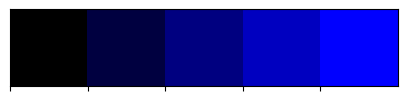

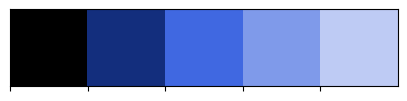

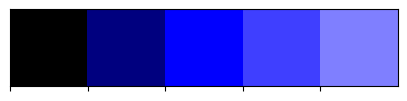

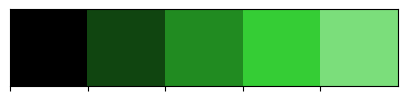

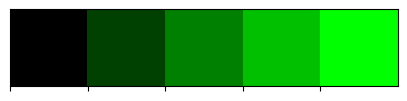

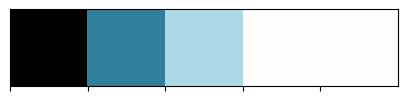

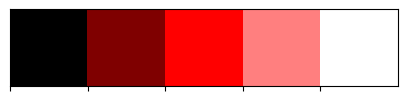

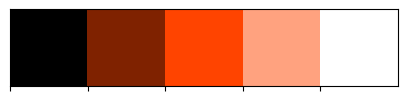

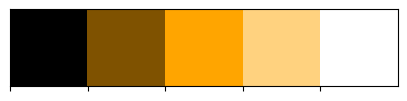

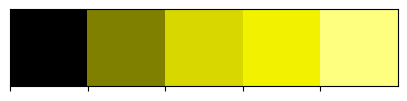

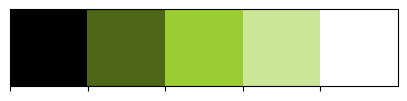

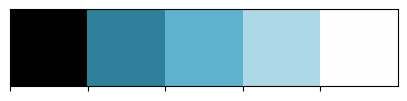

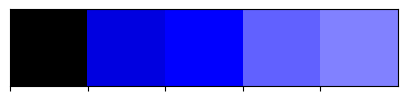

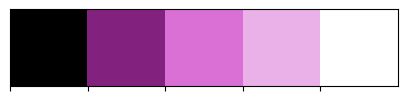

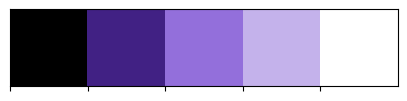

In [66]:
# colorscheme 

import matplotlib
import seaborn as sns
import colorsys

def scale_lightness(rgb, scale_l):
    # convert rgb to hls
    h, l, s = colorsys.rgb_to_hls(*rgb)
    # manipulate h, l, s values and return as rgb
    return colorsys.hls_to_rgb(h, min(1, l * scale_l), s = s)

color = matplotlib.colors.ColorConverter.to_rgb("navy")
rgbs = [scale_lightness(color, scale) for scale in [0, .5, 1, 1.5, 2]]
sns.palplot(rgbs)

color = matplotlib.colors.ColorConverter.to_rgb("royalblue")
rgbs_b2 = [scale_lightness(color, scale) for scale in [0, .5, 1, 1.25, 1.5]]
sns.palplot(rgbs_b2)


color_a = matplotlib.colors.ColorConverter.to_rgb("blue")
rgbs_a = [scale_lightness(color_a, scale) for scale in [0, .5, 1, 1.25, 1.5]]
sns.palplot(rgbs_a)

color_green = matplotlib.colors.ColorConverter.to_rgb("forestgreen")
rgbs_fgreen = [scale_lightness(color_green, scale) for scale in [0, .5, 1, 1.5, 2]]
sns.palplot(rgbs_fgreen)

color_green = matplotlib.colors.ColorConverter.to_rgb("green")
rgbs_green = [scale_lightness(color_green, scale) for scale in [0, .5, 1, 1.5, 2]]
sns.palplot(rgbs_green)

color_lb = matplotlib.colors.ColorConverter.to_rgb("lightblue")
rgbs_lb = [scale_lightness(color_lb, scale) for scale in [0, .5, 1, 1.5, 2]]
sns.palplot(rgbs_lb)

color_r = matplotlib.colors.ColorConverter.to_rgb("red")
rgbs_r = [scale_lightness(color_r, scale) for scale in [0, .5, 1, 1.5, 2]]
sns.palplot(rgbs_r)


color_orr = matplotlib.colors.ColorConverter.to_rgb("orangered")
rgbs_orr = [scale_lightness(color_orr, scale) for scale in [0, .5, 1, 1.5, 2]]
sns.palplot(rgbs_orr)


color_or = matplotlib.colors.ColorConverter.to_rgb("orange")
rgbs_or = [scale_lightness(color_or, scale) for scale in [0, .5, 1, 1.5, 2]]
sns.palplot(rgbs_or)

color_y = matplotlib.colors.ColorConverter.to_rgb("yellow")
rgbs_y = [scale_lightness(color_y, scale) for scale in [0, .5, .85, 0.95, 1.5]]
sns.palplot(rgbs_y)

color_yg = matplotlib.colors.ColorConverter.to_rgb("yellowgreen")
rgbs_yg = [scale_lightness(color_yg, scale) for scale in [0, .5, 1, 1.5, 2]]
sns.palplot(rgbs_yg)

color_lb = matplotlib.colors.ColorConverter.to_rgb("lightblue")
rgbs_lb = [scale_lightness(color_lb, scale) for scale in [0, .5, .75, 1, 2]]
sns.palplot(rgbs_lb)

color_b = matplotlib.colors.ColorConverter.to_rgb("navy")
rgbs_b = [scale_lightness(color_b, scale) for scale in [0, 1.75, 2, 2.75, 3]]
sns.palplot(rgbs_b)

color_m = matplotlib.colors.ColorConverter.to_rgb("orchid")
rgbs_m = [scale_lightness(color_m, scale) for scale in [0, .5, 1, 1.25, 2]]
sns.palplot(rgbs_m)

color_p = matplotlib.colors.ColorConverter.to_rgb("mediumpurple")
rgbs_p = [scale_lightness(color_p, scale) for scale in [0, .5, 1, 1.25, 2]]
sns.palplot(rgbs_p)



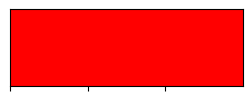

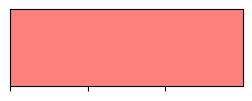

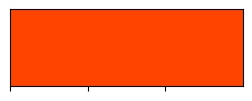

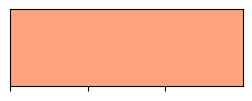

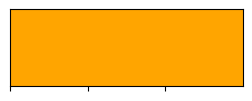

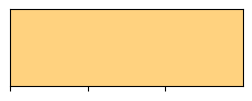

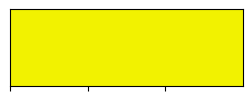

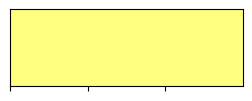

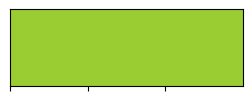

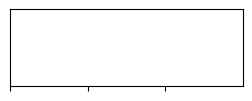

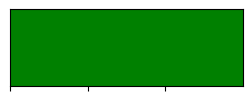

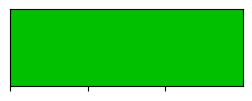

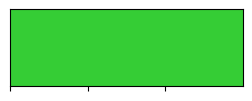

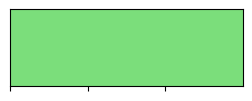

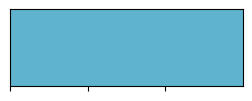

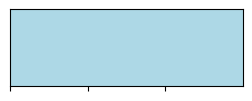

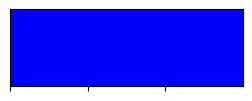

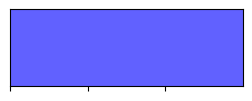

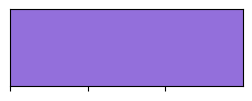

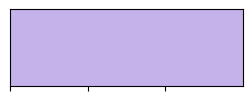

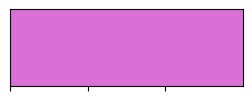

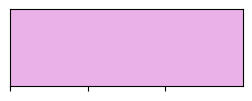

In [67]:
#red
sns.palplot(rgbs_r[2])
sns.palplot(rgbs_r[3])

#orangered
sns.palplot(rgbs_orr[2])
sns.palplot(rgbs_orr[3])

#orange
sns.palplot(rgbs_or[2])
sns.palplot(rgbs_or[3])
#yellow
sns.palplot(rgbs_y[3])
sns.palplot(rgbs_y[4])

#yellowgreen
sns.palplot(rgbs_yg[2])
sns.palplot(rgbs_yg[4])

#darkgreen
sns.palplot(rgbs_green[2])
sns.palplot(rgbs_green[3])

#forestgreen
sns.palplot(rgbs_fgreen[3])
sns.palplot(rgbs_fgreen[4])


#turquoise/lightblue
sns.palplot(rgbs_lb[2])
sns.palplot(rgbs_lb[3])

#dark blue
sns.palplot(rgbs_b[2])
sns.palplot(rgbs_b[3])

#violet
sns.palplot(rgbs_p[2])
sns.palplot(rgbs_p[3])

#magenta
sns.palplot(rgbs_m[2])
sns.palplot(rgbs_m[3])


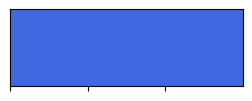

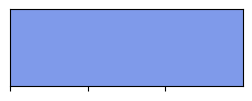

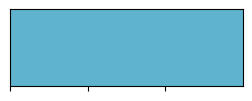

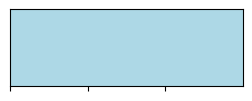

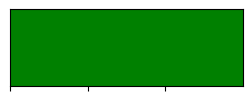

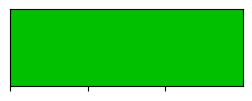

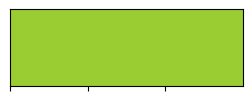

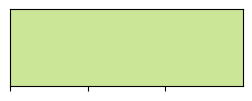

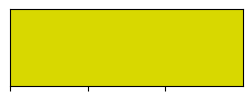

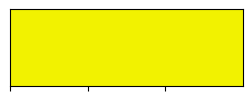

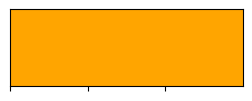

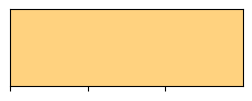

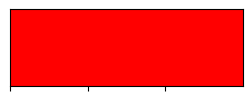

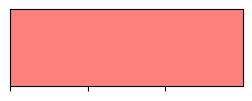

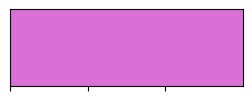

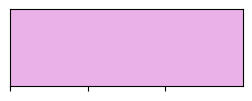

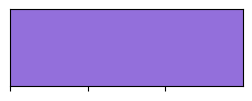

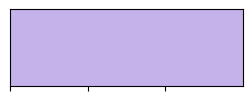

In [68]:



##########

#royal blue
sns.palplot(rgbs_b2[2])
sns.palplot(rgbs_b2[3])

# #dark blue
# sns.palplot(rgbs_a[2])
# sns.palplot(rgbs_a[3])

#turquoise/lightblue
sns.palplot(rgbs_lb[2])
sns.palplot(rgbs_lb[3])


#darkgreen
sns.palplot(rgbs_green[2])
sns.palplot(rgbs_green[3])

#yellowgreen
sns.palplot(rgbs_yg[2])
sns.palplot(rgbs_yg[3])

#yellow
sns.palplot(rgbs_y[2])
sns.palplot(rgbs_y[3])

#orange
sns.palplot(rgbs_or[2])
sns.palplot(rgbs_or[3])

#red
sns.palplot(rgbs_r[2])
sns.palplot(rgbs_r[3])


#magenta
sns.palplot(rgbs_m[2])
sns.palplot(rgbs_m[3])

#violet
sns.palplot(rgbs_p[2])
sns.palplot(rgbs_p[3])


### Preprocessing

Assuming this is done:
    
    1. Estimate the response function
    2. Estimate fiber orientation density (FOD)
    3.1. create meanB0
    3.2. convert meanB0
    4. register t1 to meanB0
    4.1 Reorient t1w scan 
    4.2. Register meanB0 to T1w 
    






# 1. Prepare whole-brain atlas 

    1. masks in MNI => T1w 
    --> only required for cortical atlases 
    2. T1w => b0
    3. masks in MNI => b0 using transformation matrix?


### 1.1. Subcortex: MASSP masks 


MASSP structure and label mapping

- 1  - 'Str-l'  
- 2  - 'Str-r' 
- 3  - 'STN-l' 
- 4  - 'STN-r' 
- 5  - 'SN-l' 
- 6  - 'SN-r' 
- 7  - 'RN-l' 
- 8  - 'RN-r' 
- 9  - 'GPi-l' 
- 10 - 'GPi-r' 
- 11 - 'GPe-l' 
- 12 - 'GPe-r' 
- 13 - 'Tha-l' 
- 14 - 'Tha-r' 
- 15 - 'LV-l' lat. ventricles
- 16 - 'LV-r' 
- 17 - '3V' 
- 18 - '4V' 
- 19 - 'Amg-l' 
- 20 - 'Amg-r' 
- 21 - 'ic-l'    internal capsule
- 22 - 'ic-r' 
- 23 - 'VTA-l' 
- 24 - 'VTA-r' 
- 25 - 'fx'      fornix
- 26 - 'PAG-l'   periaqueductal gray
- 27 - 'PAG-r' 
- 28 - 'PPN-l'   pedunculopontine nucleus
- 29 - 'PPN-r' 
- 30 - 'Cl-l'    claustrum
- 31 - 'Cl-r' 

remove:
    - 15 - 'LV-l' lat. ventricles
    - 16 - 'LV-r' 
    - 17 - '3V' 
    - 18 - '4V' 
    - 21 - 'ic-l'    internal capsule
    - 22 - 'ic-r' 
    - 25 - 'fx'      fornix


In [52]:
massp_dict = {'Str-l':1 , 'Str-r':2 , 'STN-l':3, 'STN-r':4, 'SN-l':5, 'SN-r':6, 'RN-l':7,'RN-r':8,
              'GPi-l':9, 'GPi-r':10,'GPe-l':11,'GPe-r':12,\
              'Tha-l':13,'Tha-r':14,'LV-l':15,'LV-r':16,'3V':17,'4V':18,'Amg-l':19,'Amg-r':20,\
              'ic-l':21,'ic-r':22,'VTA-l':23,'VTA-r':24,'fx':25,'PAG-l':26,'PAG-r':27,\
              'PPN-l':28,'PPN-r':29,'Cl-l':30,'Cl-r':31}


### 1.1.a extract MASSP probability maps

In [ ]:
from nilearn import image
import attrdict
from attrdict import AttrDict
from pathlib import Path


structure = ['Str-l','Str-r','STN-l','STN-r','SN-l','SN-r',\
              'RN-l','RN-r','GPi-l','GPi-r','GPe-l','GPe-r',\
              'Tha-l','Tha-r','LV-l','LV-r','3V','4V','Amg-l','Amg-r',\
              'ic-l','ic-r','VTA-l','VTA-r','fx','PAG-l','PAG-r',\
              'PPN-l','PPN-r','Cl-l','Cl-r']
labels_dict = AttrDict({'Str-l':1 , 'Str-r':2 , 'STN-l':3, 'STN-r':4, 'SN-l':5, 'SN-r':6, 'RN-l':7,'RN-r':8,\
              'GPi-l':9, 'GPi-r':10,'GPe-l':11,'GPe-r':12,\
              'Tha-l':13,'Tha-r':14,'LV-l':15,'LV-r':16,'3V':17,'4V':18,'Amg-l':19,'Amg-r':20,\
              'ic-l':21,'ic-r':22,'VTA-l':23,'VTA-r':24,'fx':25,'PAG-l':26,'PAG-r':27,\
              'PPN-l':28,'PPN-r':29,'Cl-l':30,'Cl-r':31})


def extract_MASSP_probmaps(all_combinations):
    subject, structure = all_combinations
    print('\n'+subject+'\n'+structure+'\n')
    
    mask_dir = f'/home/atrutti1/Desktop/DWI_midbrain/masks/subcortical/MASSP/qmri2fcm_all'
    output_dir = mask_dir +'/'+subject 
    if not os.path.isdir(output_dir):
        os.makedirs(output_dir)
    
    file_name = Path(mask_dir+ '/' +subject+ '_ses-1_tim_massp-label.nii.gz')
    
    if file_name.exists(): 
        source_data = load_masks(mask_dir + '/' +subject+ '_ses-1_tim_massp-label.nii.gz')
        target_data = load_masks(mask_dir + '/' + subject + '_ses-1_tim_massp-proba.nii.gz')
        target_img = nb.load(mask_dir + '/' + subject + '_ses-1_tim_massp-proba.nii.gz')
    
        label = labels_dict[structure]
        img = np.zeros_like(source_data)  #<- makes a new matrix filled with 0s with the same shape of data
        img[source_data == label] = target_data[source_data == label] 
        prob_mask_img = nb.Nifti1Image(img, affine = target_img.affine)
        
        fn =  ''+subject+ '_ses-1_tim_massp-proba-'+structure
    
    else:
        source_data = load_masks(mask_dir + '/' +subject+ '_ses-2_tim_massp-label.nii.gz')
        target_data = load_masks(mask_dir + '/' + subject + '_ses-2_tim_massp-proba.nii.gz')
        target_img = nb.load(mask_dir + '/' + subject + '_ses-2_tim_massp-proba.nii.gz')

        label = labels_dict[structure]
        img = np.zeros_like(source_data)  #<- makes a new matrix filled with 0s with the same shape of data
        img[source_data == label] = target_data[source_data == label] 
        prob_mask_img = nb.Nifti1Image(img, affine = target_img.affine)
        
        fn =  ''+subject+ '_ses-2_tim_massp-proba-'+structure

    
#label file
    print(fn)
#save file  
    prob_mask_img.to_filename(output_dir+'/'+fn+'.nii.gz')
    
    
if __name__ == '__main__':
    pool = Pool(4) 
    all_combinations = itertools.product(subjects, 
                                         ['Str-l','Str-r','STN-l','STN-r','SN-l','SN-r',
                                         'RN-l','RN-r','GPi-l','GPi-r','GPe-l','GPe-r',
                                         'Tha-l','Tha-r','LV-l','LV-r','3V','4V','Amg-l','Amg-r',
                                         'ic-l','ic-r','VTA-l','VTA-r','fx','PAG-l','PAG-r',
                                         'PPN-l','PPN-r','Cl-l','Cl-r'])
    pool.map(extract_MASSP_probmaps, all_combinations) 
    pool.close() 
    

### 1.1.b  Binarise MASSP prob maps

In [ ]:
from nilearn import image
import attrdict
from attrdict import AttrDict
from pathlib import Path

structure = ['Str-l','Str-r','STN-l','STN-r','SN-l','SN-r',\
              'RN-l','RN-r','GPi-l','GPi-r','GPe-l','GPe-r',\
              'Tha-l','Tha-r','LV-l','LV-r','3V','4V','Amg-l','Amg-r',\
              'ic-l','ic-r','VTA-l','VTA-r','fx','PAG-l','PAG-r',\
              'PPN-l','PPN-r','Cl-l','Cl-r']
labels_dict = AttrDict({'Str-l':1 , 'Str-r':2 , 'STN-l':3, 'STN-r':4, 'SN-l':5, 'SN-r':6, 'RN-l':7,'RN-r':8,
              'GPi-l':9, 'GPi-r':10,'GPe-l':11,'GPe-r':12,\
              'Tha-l':13,'Tha-r':14,'LV-l':15,'LV-r':16,'3V':17,'4V':18,'Amg-l':19,'Amg-r':20,\
              'ic-l':21,'ic-r':22,'VTA-l':23,'VTA-r':24,'fx':25,'PAG-l':26,'PAG-r':27,\
              'PPN-l':28,'PPN-r':29,'Cl-l':30,'Cl-r':31})


def binarise_MASSP_probmaps(all_combinations):
    subject, structure = all_combinations
    print('\n'+subject+'\n'+structure+'\n')
    
    mask_dir = f'/home/atrutti1/Desktop/DWI_midbrain/masks/subcortical/MASSP/qmri2fcm_all'
    maps_dir = mask_dir +'/'+subject
 #   thr_dir =  mask_dir +'/'+subject+'/thr'
    bin_dir = mask_dir +'/'+subject+'/bin'
    
#     if (os.path.exists(bin_dir)):
#         print('Binarising : done (delete to recompute)')
#     else:
    if not os.path.isdir(bin_dir):
        os.makedirs(bin_dir)


    file_name = Path(maps_dir+'/'+subject+'_ses-1_tim_massp-proba-'+structure+'.nii.gz')

    if file_name.exists(): 
        print('\n Binarising prob maps')
        prob_maps = maps_dir+'/'+subject+'_ses-1_tim_massp-proba-'+structure+'.nii.gz'

        prob_map_data = load_masks(prob_maps)
        prob_map_img = nb.load(prob_maps)

        prob_map_data[prob_map_data > 0] = 1 
        prob_map = nb.Nifti1Image(prob_map_data, affine = prob_map_img.affine)

        #label file
        fn =  ''+subject+ '_ses-1_tim_massp-proba-bin-'+structure

        #save file  
        prob_map.to_filename(bin_dir+'/'+fn+'.nii.gz')

#             else:
#                 print('\n No maps found. Checking for ses-2 files...')

    else:
        print('\n No maps found. Checking for ses-2 files...')

        prob_maps = maps_dir+'/'+subject+'_ses-2_tim_massp-proba-'+structure+'.nii.gz'
       # if os.path.isfile(prob_maps):
        print('\n Binarising prob maps')

        prob_map_data = load_masks(prob_maps)
        prob_map_img = nb.load(prob_maps)

        prob_map_data[prob_map_data > 0] = 1 
        prob_map = nb.Nifti1Image(prob_map_data, affine = prob_map_img.affine)

        #label file
        fn =  ''+subject+ '_ses-2_tim_massp-proba-bin-'+structure

        #save file  
        prob_map.to_filename(bin_dir+'/'+fn+'.nii.gz')

#                 else:
#                     print('\n No maps found !!!')


            
     
    
if __name__ == '__main__':
    pool = Pool(4) 
    all_combinations = itertools.product(['sub-013', 'sub-015'], 
                                        ['Str-l','Str-r','STN-l','STN-r','SN-l','SN-r',
                                         'RN-l','RN-r','GPi-l','GPi-r','GPe-l','GPe-r',
                                         'Tha-l','Tha-r','LV-l','LV-r','3V','4V','Amg-l','Amg-r',
                                         'ic-l','ic-r','VTA-l','VTA-r','fx','PAG-l','PAG-r',
                                         'PPN-l','PPN-r','Cl-l','Cl-r'])
    pool.map(binarise_MASSP_probmaps, all_combinations) 
    pool.close() 
    
    

## 1.2. Cortex: MARS atlas 

### 1.2.a fix affines (MARS)


saves a new image to file C which has the data of A and the 
header+q/sform of B

In [ ]:
colinMNI = '/home/atrutti1/Desktop/DWI_midbrain/masks/cortical/MARS_cortical_atlas/MarsAtlas-MNI-Colin27/colin27_MNI.nii'
#nb.load(colinMNI).affine.round(3
                               
                               
MARS_in_colinMNI = '/home/atrutti1/Desktop/DWI_midbrain/masks/cortical/MARS_cortical_atlas/MarsAtlas-MNI-Colin27/colin27_MNI_MarsAtlas.nii'
#nb.load(MARS_in_colinMNI).affine.round(3)  
ls 

imgA = nb.load(colinMNI)
imgB = nb.load(MARS_in_colinMNI)

imgC = nb.Nifti1Image(imgA.get_fdata(), imgB.affine, imgB.header)
fileC = '/home/atrutti1/Desktop/DWI_midbrain/masks/cortical/MARS_cortical_atlas/MarsAtlas-MNI-Colin27/fixed_header/colin27_MNI_hd-fix.nii'
nb.save(imgC, fileC)



## 1.2.b extract masks from MARS atlas 

In [ ]:
#left masks


labelImage = MARS_in_colinMNI
maskLabels_left = ['VCcm-l', 'VCl-l', 'VCs-l', 'Cu-l', 'VCrm-l', 'ITCm-l', 'ITCr-l', 'MTCc-l', 'STCc-l', 'STCr-l', 'MTCr-l', 'IPCv-l', 'IPCd-l', 'SPC-l', 'SPCm-l', 'PCm-l', 'Sv-l', 'Sdl-l', 'Sdm-l', 'ICC-l', 'PCC-l', 'MCC-l', 'ACC-l', 'Mv-l', 'Mdl-l', 'Mdm-l', 'PMrv-l', 'PMdl-l', 'PMdm-l', 'PFcdl-l', 'PFcdm-l', 'PFrvl-l', 'Pfrdli-l', 'Pfrdls-l', 'PFrd-l', 'PFrm-l', 'OFCvl-l', 'OFCv-l', 'OFCvm-l', 'PFCvm-l', 'Insula-l']
#maskLabels_right = ['VCcm-r', 'VCl-r', 'VCs-r', 'Cu-r', 'VCrm-r', 'ITCm-r', 'ITCr-r', 'MTCc-r', 'STCc-r', 'STCr-r', 'MTCr-r', 'IPCv-r', 'IPCd-r', 'SPC-r', 'SPCm-r', 'PCm-r', 'Sv-r', 'Sdl-r', 'Sdm-r', 'ICC-r', 'PCC-r', 'MCC-r', 'ACC-r', 'Mv-r', 'Mdl-r', 'Mdm-r', 'PMrv-r', 'PMdl-r', 'PMdm-r', 'PFcdl-r', 'PFcdm-r', 'PFrvl-r', 'Pfrdli-r', 'Pfrdls-r', 'PFrd-r', 'PFrm-r', 'OFCvl-r', 'OFCv-r', 'OFCvm-r', 'PFCvm-r', 'Insula-r']
output_path = '/home/atrutti1/Desktop/DWI_midbrain/masks/cortical/MARS_cortical_atlas/MarsAtlas-MNI-Colin27/masks/'

#print(maskLabels_right)

for value, key in enumerate(maskLabels_left):
   # print(value, key)
    Id = 1+value
    #print(Id, key)
    command = 'fslmaths '+labelImage+' -thr '+str(Id)+' -uthr '+str(Id)+' '+output_path+maskLabels_left[value] 
    print(maskLabels_left[value] )
   # print(maskLabels_right[(101-(i-1))],i, (101-(i-1)))

    try:
        subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
    except subprocess.CalledProcessError as e:
        msg = 'execution failed (error code '+str(e.returncode)+')\n Output: '+str(e.output)
        raise subprocess.CalledProcessError(msg)

In [ ]:
# right masks

labelImage = MARS_in_colinMNI
#maskLabels_left = ['VCcm-l', 'VCl-l', 'VCs-l', 'Cu-l', 'VCrm-l', 'ITCm-l', 'ITCr-l', 'MTCc-l', 'STCc-l', 'STCr-l', 'MTCr-l', 'IPCv-l', 'IPCd-l', 'SPC-l', 'SPCm-l', 'PCm-l', 'Sv-l', 'Sdl-l', 'Sdm-l', 'ICC-l', 'PCC-l', 'MCC-l', 'ACC-l', 'Mv-l', 'Mdl-l', 'Mdm-l', 'PMrv-l', 'PMdl-l', 'PMdm-l', 'PFcdl-l', 'PFcdm-l', 'PFrvl-l', 'Pfrdli-l', 'Pfrdls-l', 'PFrd-l', 'PFrm-l', 'OFCvl-l', 'OFCv-l', 'OFCvm-l', 'PFCvm-l', 'Insula-l']
maskLabels_right = ['VCcm-r', 'VCl-r', 'VCs-r', 'Cu-r', 'VCrm-r', 'ITCm-r', 'ITCr-r', 'MTCc-r', 'STCc-r', 'STCr-r', 'MTCr-r', 'IPCv-r', 'IPCd-r', 'SPC-r', 'SPCm-r', 'PCm-r', 'Sv-r', 'Sdl-r', 'Sdm-r', 'ICC-r', 'PCC-r', 'MCC-r', 'ACC-r', 'Mv-r', 'Mdl-r', 'Mdm-r', 'PMrv-r', 'PMdl-r', 'PMdm-r', 'PFcdl-r', 'PFcdm-r', 'PFrvl-r', 'Pfrdli-r', 'Pfrdls-r', 'PFrd-r', 'PFrm-r', 'OFCvl-r', 'OFCv-r', 'OFCvm-r', 'PFCvm-r', 'Insula-r']
output_path = '/home/atrutti1/Desktop/DWI_midbrain/masks/cortical/MARS_cortical_atlas/MarsAtlas-MNI-Colin27/masks/'

#print(maskLabels_right)

for value, key in enumerate(maskLabels_right):
   # print(value, key)
    Id = 101+value
    print(Id, key)
    command = 'fslmaths '+labelImage+' -thr '+str(Id)+' -uthr '+str(Id)+' '+output_path+maskLabels_right[value] 
    #print(maskLabels_right[value] )
   # print(maskLabels_right[(101-(i-1))],i, (101-(i-1)))

    try:
        subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
    except subprocess.CalledProcessError as e:
        msg = 'execution failed (error code '+str(e.returncode)+')\n Output: '+str(e.output)
        raise subprocess.CalledProcessError(msg)

## 1.3. Register masks to diffusion space


#### some registrations ..... 

In [ ]:
#1. convert brain mask to nifti format 

def convert_dwi_brainMask2nifti(all_combinations):
    subject = all_combinations
    print('\n'+subject)
    
    work_dir = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject
    anat_dir = work_dir+'/anat'
    preprocessedDataFolder = '/home/public/HumanAtlas_BIDS/'+subject
    preprocessed_dir = '/ses-3/dwi'
    brainMask = preprocessedDataFolder+preprocessed_dir+'/'+subject+'_ses-3_dwi_mask.mif.gz'
    

# 1b) Convert the mean B0 mif to a nifti 
    command = 'mrconvert '+brainMask+' '+anat_dir+'/mean_b0_brain-mask.nii.gz -force'
    print(command+'\n')
    try:
         subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
    except subprocess.CalledProcessError as e:
        msg = 'execution failed (error code '+str(e.returncode)+')\n Output: '+str(e.output)
        raise subprocess.CalledProcessError(msg)    

        
if __name__ == '__main__':
    pool = Pool(4) # 3x4 threads as tckgen already uses multithreading
    all_combinations = subjects
    pool.map(convert_dwi_brainMask2nifti, all_combinations) 
    pool.close() 

In [ ]:
# preprocessedDataFolder = '/home/public/HumanAtlas_BIDS/'
# brainMask = preprocessed_dir+'/'+subject+'_ses-3_dwi_mask.mif.gz'

#2. skull strip meanB0

def strip_skull_meanB0(subject):
    
    
    work_dir = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject
    anat_dir = work_dir+'/anat'
    
    brainMask = anat_dir+'/mean_b0_brain-mask.nii.gz'
    
    meanB0Image = anat_dir+'/mean_b0.nii.gz'

   # t1_ = '/Users/annetrutti/surfdrive/for_witty/nm_data/4min_vs_6min/Imsta_pilot002^L^^^_3DT1_2_1.nii'
    out_dir = anat_dir+'/bet'
    meanB0_bet = 'mean_b0_bet.nii.gz'
    
    if not os.path.exists(out_dir):
        os.makedirs(out_dir,exist_ok=True)
        
        
    print('\n removing skull of ' +meanB0Image+ ' using '+brainMask)
    
    #since we already have a brain mask we can mask it instead of performing the skull striping on the meanB0, which is apparently tricky 
    
     #load mask image
    mask_data = get_data(brainMask)
    mask_img = nb.load(brainMask)
    
    
    source_img = nb.load(meanB0Image)
    source_data = get_data(meanB0Image)
    
    masked_img = np.zeros_like(mask_data) 
    #print(masked_img.shape)
    masked_img[mask_data == 1 ] = source_data[mask_data == 1 ]
    masked_nii = nb.Nifti1Image(masked_img, affine= mask_img.affine)


    #save file
    nb.save(masked_nii, out_dir +'/'+meanB0_bet )

    
    
    #command = 'bet2 '+meanB0Image+' '+out_dir+'/'+meanB0_bet+'_bet.nii.gz'

#     print(command)
#     try:
#         subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
#     except subprocess.CalledProcessError as e:
#         msg = 'execution failed (error code '+str(e.returncode)+')\n Output: '+str(e.output)
#         raise subprocess.CalledProcessError(msg)
        
if __name__ == '__main__':
    pool = Pool(1) 
    pool.map(strip_skull_meanB0, subjects) 
    pool.close() 
            


In [ ]:
# 3. co-register MNI colin to t1


from pathlib import Path


def TwoStep_registration_t12MNI(all_combinations):
    subject = all_combinations
    print('\n'+subject+'\n')
    
    work_dir = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject
    anat_dir = work_dir+'/anat'
   # mask_dir = '/usr/local/fsl/data/standard/'

    standard_brain_dir = '/home/atrutti1/Desktop/DWI_midbrain/masks/cortical/MARS_cortical_atlas/MarsAtlas-MNI-Colin27/bet'
    bet_standard_MNI = standard_brain_dir+ '/colin27_MNI_hd-fix_bet.nii.gz'
    #standard_MNI = mask_dir+ '/MNI152_T1_1mm_brain.nii.gz'
    t1wImage = anat_dir+'/reoriented/t1w_reoriented.nii.gz'
    MNI2b0_outpath = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/anat/MNI2b0_non-linear/'
    t12MNI_outdir = MNI2b0_outpath+'t12MNI'
   
    if not os.path.exists(MNI2b0_outpath):
        os.makedirs(MNI2b0_outpath,exist_ok=True)

    #register (reoriented) t1 to (reoriented, bet) colin MNI 
    if (os.path.exists(t12MNI_outdir)):
        print('\n Registration t12MNI : done (delete to recompute)')
    else:
        print('\n Registrating t1 --> MNI...')
        os.makedirs(t12MNI_outdir,exist_ok=True)
 
    nighres.registration.embedded_antsreg(source_image=t1wImage, target_image=bet_standard_MNI, save_data=True, 
                                          output_dir=t12MNI_outdir,run_rigid=False, run_syn=True, run_affine=True, regularization = 'High', overwrite=False)
   
        
if __name__ == '__main__':
    pool = Pool(1) 
    #subjects = ['sub-001','sub-006', 'sub-008']
    all_combinations = subjects
    pool.map(TwoStep_registration_t12MNI, all_combinations) 
    pool.close()



In [ ]:
#4. apply tranformation matrix from MNI2T1 BET to MARS atlas


from pathlib import Path


def transform_MARS2t1(all_combinations):
    subject = all_combinations
    print('\n'+subject+'\n')
    
    work_dir = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject
    anat_dir = work_dir+'/anat'
   # mask_dir = '/usr/local/fsl/data/standard/'

    standard_brain_dir = '/home/atrutti1/Desktop/DWI_midbrain/masks/cortical/MARS_cortical_atlas/MarsAtlas-MNI-Colin27/fixed_header'
    standard_MNI = standard_brain_dir+ '/colin27_MNI_hd-fix.nii'
    MARS_in_colinMNI = '/home/atrutti1/Desktop/DWI_midbrain/masks/cortical/MARS_cortical_atlas/MarsAtlas-MNI-Colin27/colin27_MNI_MarsAtlas.nii'  
    
    t12MNI_outpath = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/anat/MNI2b0_non-linear/t12MNI'
    mapping = t12MNI_outpath +'/t1w_reoriented_ants-invmap.nii.gz'
    
    outputImageName = 'MARS2t1'
    out_dir = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/anat/atlas_coreg/MARS/MARS2t1'
    
    #register meanb0 to (reoriented) colin MNI 
    if (os.path.exists(out_dir)):
        print('\n Registration MARS2t1 : done (delete to recompute)')
    else:
        print('\n Registrating MARS --> T1...')
        os.makedirs(out_dir,exist_ok=True)

    deformed_output = nighres.registration.apply_coordinate_mappings(
            image = MARS_in_colinMNI, #atl_img, 
            mapping1 = mapping, #ants_output['inverse'],
            save_data = True,
            file_name = outputImageName,
            output_dir=out_dir,overwrite=False)
    
        
if __name__ == '__main__':
    pool = Pool(1) 
   #subjects = ['sub-001','sub-006', 'sub-008']
    all_combinations = subjects
    pool.map(transform_MARS2t1, all_combinations) 
    pool.close()


        
        

#### ... now coregister *whole-brain MARS atlas in t1* to meanB0 space

In [ ]:
#apply inverse tranformation matrix from t1 2 b0 to MARS atlas

from pathlib import Path


def transform_MARSint1_2B0(all_combinations):
    subject = all_combinations
    print('\n'+subject+'\n')
    
    work_dir = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject
    anat_dir = work_dir+'/anat'
    MARS_in_t1 = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/anat/atlas_coreg/MARS/MARS2t1/MARS2t1_def-img.nii.gz'

    
   # t12MNI_outpath = '/home/atrutti1/Documents/DWI_midbrain/data/dwi/'+subject+'/anat/'
    mapping = anat_dir +'/b02t1w_coreg/mean_b0_ants-invmap.nii.gz'
    
    outputImageName = 'MARS2b0'
    out_dir = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/anat/atlas_coreg/MARS/'
    
    #register meanb0 to (reoriented) colin MNI 
    if (os.path.exists(out_dir)):
        print('\n Registration MARS2b0 : done (delete to recompute)')
    else:
        print('\n Registrating MARS --> B0...')
        os.makedirs(out_dir,exist_ok=True)

    deformed_output = nighres.registration.apply_coordinate_mappings(
            image = MARS_in_t1, #atl_img, 
            mapping1 = mapping, #ants_output['inverse'],
            save_data = True,
            file_name = outputImageName,
            output_dir=out_dir,overwrite=False)
    
        
if __name__ == '__main__':
    pool = Pool(1) 
    #subjects = ['sub-001','sub-006', 'sub-008']
    all_combinations = subjects
    pool.map(transform_MARSint1_2B0, all_combinations) 
    pool.close()


        
        

In [ ]:
MARS_structures = ['VCcm', 'VCl', 'VCs', 'Cu', 'VCrm', 'ITCm', 'ITCr', 'MTCc', 'STCc', 'STCr', 'MTCr', 'IPCv',
                   'IPCd', 'SPC', 'SPCm', 'PCm', 'Sv', 'Sdl', 'Sdm', 'ICC', 'PCC', 'MCC', 'ACC', 'Mv', 'Mdl', 
                   'Mdm', 'PMrv', 'PMdl', 'PMdm', 'PFcdl', 'PFcdm', 'PFrvl', 'Pfrdli', 'Pfrdls', 'PFrd', 'PFrm', 
                   'OFCvl', 'OFCv', 'OFCvm', 'PFCvm', 'Insula']
hem = ['r', 'l']

## 1.3. Register masks to diffusion space
### 1.3.a transform individual MARS structures to t1


In [ ]:
from pathlib import Path

preprocessedDataFolder = '/home/public/HumanAtlas_BIDS/'
dwiDataFolder = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'


def transform_MARSatlas_2_t1(all_combinations):
    subject, structure, hem = all_combinations
    print('\n'+subject+'\n'+structure+'\n'+hem+'\n')
    
    work_dir = dwiDataFolder+subject
    anat_dir = work_dir+'/anat'
    mask_dir = '/home/atrutti1/Desktop/DWI_midbrain/masks/cortical/MARS_cortical_atlas/MarsAtlas-MNI-Colin27/masks'
    out_dir = anat_dir+'/atlas_coreg/MARS/MARS2t1/'
    
#     if (os.path.exists(out_dir)):
#         print('Registration to b0 : done (delete to recompute)')
#     else:
#         os.makedirs(out_dir,exist_ok=True)

    if not os.path.exists(out_dir):
        os.makedirs(out_dir,exist_ok=True)
        
        
    file_name = Path(mask_dir+'/'+structure+'-'+hem+'.nii.gz')

    if file_name.exists():
        
        atlasImage = mask_dir+'/'+structure+'-'+hem+'.nii.gz'
        outputImageName = ''+subject+'_'+structure+'-'+hem+'_coreg_2t1.nii.gz'

        mapping = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/anat/MNI2b0_non-linear/t12MNI/t1w_reoriented_ants-invmap.nii.gz'

        print('\n2. Transformig MARS ' +structure+'-'+hem+' to t1\n')

        deformed_output = nighres.registration.apply_coordinate_mappings(
            image = atlasImage, #atl_img, 
            mapping1 = mapping, #ants_output['inverse'],
            save_data = True,
            file_name = outputImageName,
            output_dir=out_dir,overwrite=False)
        
    else:
        print(+file_name+ ' not found')
#         atlasImage = mask_dir+'/'+subject+'/bin/'+subject+'_ses-2_tim_massp-proba-bin-'+structure+'.nii.gz'
#         outputImageName = ''+subject+'_tim_proba-bin-'+structure+'_coreg.nii.gz'

#         mapping = '/home/atrutti1/Documents/DWI_midbrain/data/dwi/'+subject+'/anat/b02t1w_coreg/mean_b0_ants-invmap.nii.gz'

#         print('\n8.3. Registering MASSP ' +structure+' (ses-2) to meanB0\n')

#         deformed_output = nighres.registration.apply_coordinate_mappings(
#             image = atlasImage, #atl_img, 
#             mapping1 = mapping, #ants_output['inverse'],
#             save_data = True,
#             file_name = outputImageName,
#             output_dir=out_dir,overwrite=True)

if __name__ == '__main__':
    pool = Pool(3) 
    all_combinations = itertools.product(subjects, 
                                         MARS_structures, hem)
    pool.map(transform_MARSatlas_2_t1, all_combinations) 
    pool.close() 
    

In [ ]:
## 5.3. Register masks to diffusion space

## 1.3.b transform MARS to meanB0 space

In [ ]:
#### from pathlib import Path

preprocessedDataFolder = '/home/public/HumanAtlas_BIDS/'
dwiDataFolder = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'


def transform_MARSatlas_2_b0(all_combinations):
    subject, structure, hem = all_combinations
    print('\n'+subject+'\n'+structure+'\n'+hem+'\n')
    
    work_dir = dwiDataFolder+subject
    anat_dir = work_dir+'/anat'
    mask_dir = anat_dir+'/atlas_coreg/MARS/MARS2t1'
    out_dir = anat_dir+'/atlas_coreg/MARS'
    
#     if (os.path.exists(out_dir)):
#         print('Registration to b0 : done (delete to recompute)')
#     else:
#         os.makedirs(out_dir,exist_ok=True)

    if not os.path.exists(out_dir):
        os.makedirs(out_dir,exist_ok=True)
        
        
    file_name = Path(mask_dir+'/'+subject+'_'+structure+'-'+hem+'_coreg_2t1_def-img.nii.gz')

    if file_name.exists():
        
        atlasImage = mask_dir+'/'+subject+'_'+structure+'-'+hem+'_coreg_2t1_def-img.nii.gz'
        outputImageName = ''+subject+'_'+structure+'-'+hem+'_coreg.nii.gz'

        mapping = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/anat/b02t1w_coreg/mean_b0_ants-invmap.nii.gz'

        print('\n2. Registering MARS ' +structure+'-'+hem+' to b0\n')

        deformed_output = nighres.registration.apply_coordinate_mappings(
            image = atlasImage, #atl_img, 
            mapping1 = mapping, #ants_output['inverse'],
            save_data = True,
            file_name = outputImageName,
            output_dir=out_dir,overwrite=False)
        
    else:
        print(+file_name+ ' not found')
#         atlasImage = mask_dir+'/'+subject+'/bin/'+subject+'_ses-2_tim_massp-proba-bin-'+structure+'.nii.gz'
#         outputImageName = ''+subject+'_tim_proba-bin-'+structure+'_coreg.nii.gz'

#         mapping = '/home/atrutti1/Documents/DWI_midbrain/data/dwi/'+subject+'/anat/b02t1w_coreg/mean_b0_ants-invmap.nii.gz'

#         print('\n8.3. Registering MASSP ' +structure+' (ses-2) to meanB0\n')

#         deformed_output = nighres.registration.apply_coordinate_mappings(
#             image = atlasImage, #atl_img, 
#             mapping1 = mapping, #ants_output['inverse'],
#             save_data = True,
#             file_name = outputImageName,
#             output_dir=out_dir,overwrite=True)

if __name__ == '__main__':
    pool = Pool(3) 
    all_combinations = itertools.product(subjects, 
                                         MARS_structures, hem)
    pool.map(transform_MARSatlas_2_b0, all_combinations) 
    pool.close() 
    

## 1.3.c. transform MASSP to meanB0 space
    unthresholded, binarised masks

In [ ]:
from pathlib import Path

preprocessedDataFolder = '/home/public/HumanAtlas_BIDS/'
dwiDataFolder = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'


def transform_MASSP_atlases(all_combinations):
    subject, structure = all_combinations
    print('\n'+subject+'\n'+structure+'\n')
    
    work_dir = dwiDataFolder+subject
    anat_dir = work_dir+'/anat'
    mask_dir = '/home/atrutti1/Desktop/DWI_midbrain/masks/subcortical/MASSP/qmri2fcm_all/'
    out_dir = anat_dir+'/atlas_coreg/MASSP/'
    
#     if (os.path.exists(out_dir)):
#         print('Registration to b0 : done (delete to recompute)')
#     else:
#         os.makedirs(out_dir,exist_ok=True)

    if not os.path.exists(out_dir):
        os.makedirs(out_dir,exist_ok=True)
        
        
    file_name = Path(mask_dir+'/'+subject+'/bin/'+subject+'_ses-1_tim_massp-proba-bin-'+structure+'.nii.gz')

    if file_name.exists():

        atlasImage = mask_dir+'/'+subject+'/bin/'+subject+'_ses-1_tim_massp-proba-bin-'+structure+'.nii.gz'
        outputImageName = ''+subject+'_'+structure+'_coreg'

        mapping = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/anat/b02t1w_coreg/mean_b0_ants-invmap.nii.gz'

        print('\n8.3. Registering MASSP ' +structure+' to meanB0\n')

        deformed_output = nighres.registration.apply_coordinate_mappings(
            image = atlasImage, #atl_img, 
            mapping1 = mapping, #ants_output['inverse'],
            save_data = True,
            file_name = outputImageName,
            output_dir=out_dir,overwrite=True)
        
    else:
        atlasImage = mask_dir+'/'+subject+'/bin/'+subject+'_ses-2_tim_massp-proba-bin-'+structure+'.nii.gz'
        outputImageName = ''+subject+'_'+structure+'_coreg'

        mapping = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/anat/b02t1w_coreg/mean_b0_ants-invmap.nii.gz'

        print('\n8.3. Registering MASSP ' +structure+' (ses-2) to meanB0\n')

        deformed_output = nighres.registration.apply_coordinate_mappings(
            image = atlasImage, #atl_img, 
            mapping1 = mapping, #ants_output['inverse'],
            save_data = True,
            file_name = outputImageName,
            output_dir=out_dir,overwrite=True)

if __name__ == '__main__':
    pool = Pool(1) 
    all_combinations = itertools.product(subjects, 
                                         ['Str-l','Str-r','STN-l','STN-r','SN-l','SN-r',
                                         'RN-l','RN-r','GPi-l','GPi-r','GPe-l','GPe-r',
                                         'Tha-l','Tha-r','LV-l','LV-r','3V','4V','Amg-l','Amg-r',
                                         'ic-l','ic-r','VTA-l','VTA-r','fx','PAG-l','PAG-r',
                                         'PPN-l','PPN-r','Cl-l','Cl-r'])
    pool.map(transform_MASSP_atlases, all_combinations) 
    pool.close() 
    

#### Convert MASSP masks to mrtrix format


In [ ]:
dwiDataFolder = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'


def convert_MASSP2mif(all_combinations):
    subject, structure = all_combinations
    print('\n'+subject+'\n'+structure+'\n')
    
    work_dir = dwiDataFolder+subject
   # preprocessed_dir = work_dir+'/preprocessed'
    anat_dir = work_dir+'/anat' 
    MASSP_dir = work_dir+'/anat/atlas_coreg/MASSP'

# 1b) Convert the mean B0 mif to a nifti 
    command = 'mrconvert '+MASSP_dir+'/'+subject+'_'+structure+'_coreg_def-img.nii.gz '+MASSP_dir+'/'+subject+'_'+structure+'_bin_coreg.mif'
    print(command+'\n')
    try:
         subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
    except subprocess.CalledProcessError as e:
        msg = 'execution failed (error code '+str(e.returncode)+')\n Output: '+str(e.output)
        raise subprocess.CalledProcessError(msg)    

        
if __name__ == '__main__':
    pool = Pool(4) # 3x4 threads as tckgen already uses multithreading
    all_combinations = itertools.product(subjects, 
                                         ['Str-l','Str-r','STN-l','STN-r','SN-l','SN-r',
                                         'RN-l','RN-r','GPi-l','GPi-r','GPe-l','GPe-r',
                                         'Tha-l','Tha-r','LV-l','LV-r','3V','4V','Amg-l','Amg-r',
                                         'ic-l','ic-r','VTA-l','VTA-r','fx','PAG-l','PAG-r',
                                         'PPN-l','PPN-r','Cl-l','Cl-r'])
    pool.map(convert_MASSP2mif, all_combinations) 
    pool.close() 

not sure why, but there are some 'edited' masks 

In [ ]:
dwiDataFolder = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'


def convert_edited_MASSP2mif(all_combinations):
    subject, structure = all_combinations
    print('\n'+subject+'\n'+structure+'\n')
    
    work_dir = dwiDataFolder+subject
    #preprocessed_dir = work_dir+'/preprocessed'
    anat_dir = work_dir+'/anat' 
    MASSP_dir = work_dir+'/anat/atlas_coreg/MASSP'
    
    file_name = Path(MASSP_dir+ '/'+subject+'_'+structure+'_coreg_def-img_edited.nii.gz')
    
    if file_name.exists(): 
    # 1b) Convert the mean B0 mif to a nifti 
        command = 'mrconvert '+MASSP_dir+'/'+subject+'_'+structure+'_coreg_def-img_edited.nii.gz '+MASSP_dir+'/'+subject+'_'+structure+'_bin_coreg_edited.mif'
        print(command+'\n')
        try:
             subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
        except subprocess.CalledProcessError as e:
            msg = 'execution failed (error code '+str(e.returncode)+')\n Output: '+str(e.output)
            raise subprocess.CalledProcessError(msg)    
    
    else:
    
        print('No edited mask found \n')
        
if __name__ == '__main__':
    pool = Pool(1) # 3x4 threads as tckgen already uses multithreading
    all_combinations = itertools.product(['sub-001'], 
                                         ['Str-l','Str-r','STN-l','STN-r','SN-l','SN-r',
                                         'RN-l','RN-r','GPi-l','GPi-r','GPe-l','GPe-r',
                                         'Tha-l','Tha-r','LV-l','LV-r','3V','4V','Amg-l','Amg-r',
                                         'ic-l','ic-r','VTA-l','VTA-r','fx','PAG-l','PAG-r',
                                         'PPN-l','PPN-r','Cl-l','Cl-r'])
    pool.map(convert_edited_MASSP2mif, all_combinations) 
    pool.close() 

In [ ]:
import os
import shutil

# source_dir = r'/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/anat/atlas_coreg/all_masks/'
# destination_dir =  r'/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/anat/atlas_coreg/mask_list/'

def extract_files(all_combinations):
    subject = all_combinations
    exclude_labels = [ 'fx', 'ic']

    source_dir = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/anat/atlas_coreg/all_masks/'
    destination_dir =  '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/anat/atlas_coreg/mask_list/'

    # Create the destination directory if it doesn't exist
    if not os.path.exists(destination_dir):
        os.makedirs(destination_dir)

    # Get a list of all files in the source directory
    files = os.listdir(source_dir)
    print(files)

    # Iterate over each file and copy to the destination directory if it doesn't contain excluded labels
    for file_name in files:
        excluded = any(label in file_name for label in exclude_labels)
        if not excluded:
            source_path = os.path.join(source_dir, file_name)
            destination_path = os.path.join(destination_dir, file_name)
            shutil.copy2(source_path, destination_path)

# Example usage:
# source_directory = '/path/to/source_directory'
# destination_directory = '/path/to/destination_directory'
# exclude_labels = ['LV', 'fx', 'ic', '3V', '4V']


# extract_files(subjects, exclude_labels)


if __name__ == '__main__':
    pool = Pool(1) 
    all_combinations = subjects
    pool.map(extract_files, all_combinations) 
    
    

# 2. Combine all masks to a single whole-brain atlas

## 2.1. copy coregistered masks to all_masks/ 

In [ ]:
import shutil
import glob

def copy_coreg_masks(all_combinations):
    subject = all_combinations
    original_MARS = r'/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/anat/atlas_coreg/MARS/'
#     list_original_MARS = os.listdir('/home/atrutti1/Documents/DWI_midbrain/data/dwi/'+subject+'/anat/atlas_coreg/MARS_nonlinear/')
#     print(str(len(np.unique(list_original_MARS)))+'\n')
    original_MASSP = r'/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/anat/atlas_coreg/MASSP/'
    list_original_MASSP = glob.glob(original_MASSP+'/*.nii.gz') #('/home/atrutti1/Documents/DWI_midbrain/data/dwi/'+subject+'/anat/atlas_coreg/MASSP/')
    print(str(len(np.unique(list_original_MASSP)))+'\n')
    target = r'/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/anat/atlas_coreg/all_masks/'
    if not os.path.exists(target):
        os.makedirs(target,exist_ok=True)
        
        
  #  shutil.copyfile(original_MARS, target)
    
    for file in glob.glob(original_MARS+'/'+subject+'_*.nii.gz'):
        #print(file +'\n')
        shutil.copy(file, target)
    
    for file in glob.glob(original_MASSP+'/*.nii.gz'):
        #print(file +'\n')
        shutil.copy(file, target)
    
    list_all_masks = os.listdir('/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/anat/atlas_coreg/all_masks/')

    print(str(subject)+': '+str(len(np.unique(list_all_masks)))+' files moved. \n')

if __name__ == '__main__':
    pool = Pool(1) 
    all_combinations = subjects
    pool.map(copy_coreg_masks, all_combinations) 
    
    
    
    
    

#### make atlas dict

In [ ]:
MARSLabels_right = ['VCcm-r', 'VCl-r', 'VCs-r', 'Cu-r', 'VCrm-r', 'ITCm-r', 'ITCr-r', 'MTCc-r', 'STCc-r', 'STCr-r', 'MTCr-r', 'IPCv-r', 'IPCd-r', 'SPC-r', 'SPCm-r', 'PCm-r', 'Sv-r', 'Sdl-r', 'Sdm-r', 'ICC-r', 'PCC-r', 'MCC-r', 'ACC-r', 'Mv-r', 'Mdl-r', 'Mdm-r', 'PMrv-r', 'PMdl-r', 'PMdm-r', 'PFcdl-r', 'PFcdm-r', 'PFrvl-r', 'Pfrdli-r', 'Pfrdls-r', 'PFrd-r', 'PFrm-r', 'OFCvl-r', 'OFCv-r', 'OFCvm-r', 'PFCvm-r', 'Insula-r']
MARSLabels_left = ['VCcm-l', 'VCl-l', 'VCs-l', 'Cu-l', 'VCrm-l', 'ITCm-l', 'ITCr-l', 'MTCc-l', 'STCc-l', 'STCr-l', 'MTCr-l', 'IPCv-l', 'IPCd-l', 'SPC-l', 'SPCm-l', 'PCm-l', 'Sv-l', 'Sdl-l', 'Sdm-l', 'ICC-l', 'PCC-l', 'MCC-l', 'ACC-l', 'Mv-l', 'Mdl-l', 'Mdm-l', 'PMrv-l', 'PMdl-l', 'PMdm-l', 'PFcdl-l', 'PFcdm-l', 'PFrvl-l', 'Pfrdli-l', 'Pfrdls-l', 'PFrd-l', 'PFrm-l', 'OFCvl-l', 'OFCv-l', 'OFCvm-l', 'PFCvm-l', 'Insula-l']
# MASSPLabels = ['Str-l','Str-r','STN-l','STN-r','GPi-l','GPi-r','GPe-l','GPe-r','Tha-l','Tha-r','Amg-l','Amg-r', 'ic-l','ic-r','VTA-l','VTA-r','SN-l','SN-r','RN-l','RN-r','PAG-l','PAG-r','PPN-l','PPN-r','Cl-l','Cl-r','fx','LV-l','LV-r','3V','4V']
MASSPLabels = ['Str-l','Str-r','STN-l','STN-r','GPi-l','GPi-r','GPe-l','GPe-r','Tha-l','Tha-r','Amg-l','Amg-r','VTA-l','VTA-r','SN-l','SN-r','RN-l','RN-r','PAG-l','PAG-r','PPN-l','PPN-r','Cl-l','Cl-r','LV-l','LV-r','3V','4V']

all_structures = MARSLabels_right + MARSLabels_left +MASSPLabels

labels_keys_A = list(range(2,83,2))
labels_keys_B = list(range(1,83,2))
labels_keys_C = list(range(83,111))

all_labels = labels_keys_A + labels_keys_B +labels_keys_C
print(all_labels)

zip_iterator = zip(all_structures, all_labels)
atlas_dict =  dict(zip_iterator)
print(atlas_dict)

atlas_dict = dict(sorted(atlas_dict.items(), key=lambda item: item[1]))
atlas_dict.keys()

In [37]:
atlas_dict.items()

dict_items([('VCcm-l', 1), ('VCcm-r', 2), ('VCl-l', 3), ('VCl-r', 4), ('VCs-l', 5), ('VCs-r', 6), ('Cu-l', 7), ('Cu-r', 8), ('VCrm-l', 9), ('VCrm-r', 10), ('ITCm-l', 11), ('ITCm-r', 12), ('ITCr-l', 13), ('ITCr-r', 14), ('MTCc-l', 15), ('MTCc-r', 16), ('STCc-l', 17), ('STCc-r', 18), ('STCr-l', 19), ('STCr-r', 20), ('MTCr-l', 21), ('MTCr-r', 22), ('IPCv-l', 23), ('IPCv-r', 24), ('IPCd-l', 25), ('IPCd-r', 26), ('SPC-l', 27), ('SPC-r', 28), ('SPCm-l', 29), ('SPCm-r', 30), ('PCm-l', 31), ('PCm-r', 32), ('Sv-l', 33), ('Sv-r', 34), ('Sdl-l', 35), ('Sdl-r', 36), ('Sdm-l', 37), ('Sdm-r', 38), ('ICC-l', 39), ('ICC-r', 40), ('PCC-l', 41), ('PCC-r', 42), ('MCC-l', 43), ('MCC-r', 44), ('ACC-l', 45), ('ACC-r', 46), ('Mv-l', 47), ('Mv-r', 48), ('Mdl-l', 49), ('Mdl-r', 50), ('Mdm-l', 51), ('Mdm-r', 52), ('PMrv-l', 53), ('PMrv-r', 54), ('PMdl-l', 55), ('PMdl-r', 56), ('PMdm-l', 57), ('PMdm-r', 58), ('PFcdl-l', 59), ('PFcdl-r', 60), ('PFcdm-l', 61), ('PFcdm-r', 62), ('PFrvl-l', 63), ('PFrvl-r', 64), ('P

## 2.2. binarize mask files and add labels for LUT


In [39]:
### binarize and add labels for LUT
import nibabel as nb
#test with dict

def bin_and_labelLUT(all_combinations):
    subject = all_combinations
    
   # print('\n'+subject+'\n Computing LUT...')
    
    
    mask_dir = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/anat/atlas_coreg/mask_list/'
    out_dir = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/anat/wb_map/'
    if not os.path.exists(out_dir):
        os.makedirs(out_dir,exist_ok=True)
        
    a = open('/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/anat/wb_map/LUT.txt', "w+")
    List_files = os.listdir('/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/anat/atlas_coreg/mask_list/')
    #atlas_dict 
    
    
    b0masks = []

    for value, key in atlas_dict.items():
       # print(str(value)+ ' label: '+str(key))

        structure = value

        for filename in List_files:
            if str('_'+structure+'_') in filename:  
              #  print(filename)

                a.write(str(key)+ ' '+str(structure)+' ' + os.linesep) #creates a text file (LUT)
                command = 'fslmaths '+mask_dir+filename+' -bin -mul '+str(key)+' '+mask_dir+filename
                try:
                    subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
                except subprocess.CalledProcessError as e:
                    msg = 'execution failed (error code '+str(e.returncode)+')\n Output: '+str(e.output)
                    raise subprocess.CalledProcessError(msg)

                file = mask_dir+filename
            
                mask_data = get_data(file)
               # print('atlas max. intensity: '+str(mask_data.max()))
                
                b0masks.append(file)

    return b0masks
    print('done')
    print(b0masks)

# if __name__ == '__main__':
#     pool = Pool(1) 
#   #  all_combinations = subjects
#     pool.map(bin_and_labelLUT, all_combinations) 
    
    
    

## 6.2. combine all masks into a 3D nifti file
 and create look-up table

In [38]:
subjects = [
            'sub-001', 
            'sub-006', 'sub-008', 'sub-009', 'sub-010', 'sub-011', 'sub-012', 
            'sub-013', 'sub-014', 'sub-015', 'sub-016', 'sub-017', 'sub-018',  'sub-020',
            'sub-022', 'sub-023', 'sub-025', 'sub-031', 'sub-032', 'sub-033', 'sub-040', 'sub-041', 
            'sub-044', 'sub-047', 'sub-048', 'sub-053', 'sub-054', 'sub-056', 'sub-058', 'sub-059',
            'sub-060', 'sub-063', 'sub-064', 'sub-065', 'sub-069',  'sub-071', #'sub-070',
            'sub-074', 'sub-078', 'sub-082', 'sub-083', 'sub-084'
            ]



pilots = [ 'sub-001', 'sub-006', 'sub-008']

In [ ]:


import nilearn.image

def combine_masks_and_create_LUT(all_combinations):
    subject = all_combinations
    print(subject)

    combinedAtlas_dir = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/anat/wb_map'
    
#     if (os.path.exists(combinedAtlas_dir)):
#         print('Atlas already computed. Delete to recompute')
#     else:
    print('\n Combining structures and computing atlas file...')
    os.makedirs(combinedAtlas_dir,exist_ok=True)

    mask_dir = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/anat/atlas_coreg/mask_list/'


    combinedAtlas_filename = combinedAtlas_dir+'/'+subject+'_B0_corticalSubcorticalROI.nii.gz'
    inputConnectome_filename  = combinedAtlas_dir+'/'+subject+'_B0_corticalSubcorticalROI.mif'



    file_path = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/anat/atlas_coreg/mask_list/'
   # print(file_path)
    files_list = []

    b0masks = bin_and_labelLUT(subject)
    #b0masks = list_mask_files(subject)

    print('Adding masks to atlas...')

#         for b0mask in b0masks:
#             image_file = nb.load(b0mask)
#             files_list.append(image_file)


    for i,j in enumerate(b0masks):
        print(j)


        mask_data = get_data(b0masks[i])
        print(mask_data.max())


        if j == b0masks[0]:
            base_img = b0masks[0]
            print('base image selected: ' +base_img)

        elif j == b0masks[1]:
            command = 'fslmaths '+b0masks[0]+' -add '+b0masks[1]+' '+combinedAtlas_filename
            print('adding second image: '+b0masks[1] )

            try:
                subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
            except subprocess.CalledProcessError as e:
                msg = 'execution failed (error code '+str(e.returncode)+')\n Output: '+str(e.output)
                raise subprocess.CalledProcessError(msg)

            combinedAtlas_data = get_data(combinedAtlas_filename)
            print('atlas max: '+str(combinedAtlas_data.max()))

            if combinedAtlas_data.max() > get_data(b0masks[1]).max():
            #if combinedAtlas_data.max() >= get_data(b0masks[0]).max()+ get_data(b0masks[1]).max():

                print('looks like we got some overlapping voxels!')
                combinedAtlas_data[combinedAtlas_data >= mask_data.max()] = mask_data.max()

                combinedAtlas = nb.load(combinedAtlas_filename)
                combinedAtlas_new = nb.Nifti1Image(combinedAtlas_data, affine= combinedAtlas.affine )
                nb.save(combinedAtlas_new, combinedAtlas_filename )
                print('corrected maximum intensity ' +str(combinedAtlas_data.max()))




        elif i >=2:
#             print('adding : '+b0masks[i])
            base_img = combinedAtlas_filename
            command = 'fslmaths '+base_img+' -add '+b0masks[i]+' '+combinedAtlas_filename


            try:
                subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
            except subprocess.CalledProcessError as e:
                msg = 'execution failed (error code '+str(e.returncode)+')\n Output: '+str(e.output)
                raise subprocess.CalledProcessError(msg)

            combinedAtlas_data = get_data(combinedAtlas_filename)
#             print('atlas max: '+str(combinedAtlas_data.max()))

            if combinedAtlas_data.max() > get_data(b0masks[i]).max():
#                 print('looks like we got some overlapping voxels!')
            #if combinedAtlas_data.max() >= get_data(base_img).max()+ get_data(b0masks[i]).max():
                combinedAtlas_data[combinedAtlas_data >= mask_data.max()] = mask_data.max()
                combinedAtlas = nb.load(combinedAtlas_filename)
                combinedAtlas_new = nb.Nifti1Image(combinedAtlas_data, affine= combinedAtlas.affine )
                nb.save(combinedAtlas_new, combinedAtlas_filename )


                combinedAtlas_data_check = get_data(combinedAtlas_filename)
#                 print('corrected maximum intensity ' +str(combinedAtlas_data_check.max()))


                    
#         print('\n converting nifti file to mrtrix3 mif file...' )


#         command = 'mrconvert -datatype uint32 '+combinedAtlas_filename+' '+inputConnectome_filename+' -force'
#         try:
#              subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
#         except subprocess.CalledProcessError as e:
#             msg = 'execution failed (error code '+str(e.returncode)+')\n Output: '+str(e.output)
#             raise subprocess.CalledProcessError(msg)
#         print('\n done.' )


if __name__ == '__main__':
    pool = Pool(1) 
   # all_combinations = subjects
    pool.map(combine_masks_and_create_LUT, subjects) 
    pool.close() 
    


In [ ]:
def convert_atlas2mif(all_combinations):
    subject = all_combinations
    print(subject)

    combinedAtlas_dir = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/anat/wb_map'
    
    
    print('\n convert atlas file...')
    #os.makedirs(combinedAtlas_dir,exist_ok=True)

    mask_dir = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/anat/atlas_coreg/mask_list/'


    combinedAtlas_filename = combinedAtlas_dir+'/'+subject+'_B0_corticalSubcorticalROI.nii.gz'
    inputConnectome_filename  = combinedAtlas_dir+'/'+subject+'_B0_corticalSubcorticalROI.mif'



    file_path = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/anat/atlas_coreg/mask_list/'


    print('\n converting nifti file to mrtrix3 mif file...' )

    command = '/home/pilou/Software/Miniconda/bin/mrconvert -datatype uint32 '+combinedAtlas_filename+' '+inputConnectome_filename+' -force'
    try:
         subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
    except subprocess.CalledProcessError as e:
        msg = 'execution failed (error code '+str(e.returncode)+')\n Output: '+str(e.output)
        raise subprocess.CalledProcessError(msg)
    print('\n done.' )

if __name__ == '__main__':
    pool = Pool(1) 
   # all_combinations = subjects
    pool.map(convert_atlas2mif, subjects) 
    pool.close() 
    

# 3. Generate connectome

based on whole-brain streamline files computed by Sarah and Pilou


### current set-up

    -vector REMOVED
         output a vector representing connectivities from a given seed point to
         target nodes, rather than a matrix of node-node connectivities
         
     -scale_invnodevol
         scale each contribution to the connectome edge by the inverse of the two
         node volumes
         
         --> scale by volume
         --> The purpose of this scaling is to adjust for the fact that larger nodes tend to have more connections than smaller nodes, and therefore their contributions to the connectome should be weighted differently. By scaling each contribution based on the size of the nodes it connects, the resulting connectome model will be more accurate and reflective of the underlying neural network.
         
         
      -zero_diagonal
      
      
# NOTE: 
    recompute combinedAtlas files - running

In [56]:
Sarahs_dir = '/home/public/StoppingAge-DWI-Ahead/Data/Dwi/'

In [ ]:

#################################################################################
## 7) Generate the connectome 
#################################################################################
#. Here we want to extract the number of streamlines between the ROI's that are
#. weighted based on the SIFT2 and normalized for node volume. Specifically 
#. the contribution to the connectome edge is scaled by the inverse of the two
#. node volumes. 
#. 
# 
# Do you want to overwrite the previous results? If yes, then True

# edited:
# read-out of individual structure's connectome easier when including '-symmetric ' in *tck2connectome

overwrite = True

def genConnectome(subject):
    print(subject+'\n')
    
    # Local path settings
    work_dir = mainProjectFolder+dwiDataFolder+subject
   # preprocessed_dir = work_dir+'/preprocessed'
    #dwiresponse_dir = work_dir+'/dwi2response'
    wholebrainStreamline_dir = Sarahs_dir+subject+'/tckgen'
    sift2_dir =  Sarahs_dir+subject+'/SIFT2-tckgen'
    connectome_dir = work_dir+'/tck2connectome'
    
    # ROI 
    connectomeNodes_dir = work_dir+'/anat/wb_map'
    
    # Create the output folder
    if ((os.path.exists(connectome_dir)) & (overwrite == False)):
        print('\n4. Generate connectome: done (set overwrite to True to recompute)')
    else:
        print('\n4. Generate connectome')
        os.makedirs(connectome_dir,exist_ok=True)
        
        command = '/home/pilou/Software/Miniconda/bin/tck2connectome '+wholebrainStreamline_dir+'/tracks_combined.tck '+connectomeNodes_dir+'/'+subject+'_B0_corticalSubcorticalROI.mif '+connectome_dir+'/connectome.csv -tck_weights_in '+sift2_dir+'/sift.txt -out_assignments '+connectome_dir+'/assignments.txt -scale_invnodevol -zero_diagonal -symmetric -force'
        
        print(command+'\n')
        try:
             subprocess.check_output(command, shell=True, stderr=subprocess.STDOUT)
        except subprocess.CalledProcessError as e:
            msg = 'execution failed (error code '+str(e.returncode)+')\n Output: '+str(e.output)
            raise subprocess.CalledProcessError(msg)
            
# Run the actual function   
if __name__ == '__main__':
    pool = Pool(6) 
    pool.map(genConnectome, subjects) 
    pool.close()         

In [ ]:
#starting with left structures

MARSLabels_right = ['VCcm-r', 'VCl-r', 'VCs-r', 'Cu-r', 'VCrm-r', 'ITCm-r', 'ITCr-r', 'MTCc-r', 'STCc-r', 'STCr-r', 'MTCr-r', 'IPCv-r', 'IPCd-r', 'SPC-r', 'SPCm-r', 'PCm-r', 'Sv-r', 'Sdl-r', 'Sdm-r', 'ICC-r', 'PCC-r', 'MCC-r', 'ACC-r', 'Mv-r', 'Mdl-r', 'Mdm-r', 'PMrv-r', 'PMdl-r', 'PMdm-r', 'PFcdl-r', 'PFcdm-r', 'PFrvl-r', 'Pfrdli-r', 'Pfrdls-r', 'PFrd-r', 'PFrm-r', 'OFCvl-r', 'OFCv-r', 'OFCvm-r', 'PFCvm-r', 'Insula-r']
MARSLabels_left = ['VCcm-l', 'VCl-l', 'VCs-l', 'Cu-l', 'VCrm-l', 'ITCm-l', 'ITCr-l', 'MTCc-l', 'STCc-l', 'STCr-l', 'MTCr-l', 'IPCv-l', 'IPCd-l', 'SPC-l', 'SPCm-l', 'PCm-l', 'Sv-l', 'Sdl-l', 'Sdm-l', 'ICC-l', 'PCC-l', 'MCC-l', 'ACC-l', 'Mv-l', 'Mdl-l', 'Mdm-l', 'PMrv-l', 'PMdl-l', 'PMdm-l', 'PFcdl-l', 'PFcdm-l', 'PFrvl-l', 'Pfrdli-l', 'Pfrdls-l', 'PFrd-l', 'PFrm-l', 'OFCvl-l', 'OFCv-l', 'OFCvm-l', 'PFCvm-l', 'Insula-l']
MASSPLabels = ['Str-l','Str-r','STN-l','STN-r','GPi-l','GPi-r','GPe-l','GPe-r','Tha-l','Tha-r','Amg-l','Amg-r', 'ic-l','ic-r','VTA-l','VTA-r','SN-l','SN-r','RN-l','RN-r','PAG-l','PAG-r','PPN-l','PPN-r','Cl-l','Cl-r','fx','LV-l','LV-r','3V','4V']
all_structures = MARSLabels_right + MARSLabels_left +MASSPLabels

labels_keys_A = list(range(2,83,2))
labels_keys_B = list(range(1,83,2))
labels_keys_C = list(range(83,114))

all_labels = labels_keys_A + labels_keys_B +labels_keys_C
print(all_labels)

zip_iterator = zip(all_structures, all_labels)
atlas_dict =  dict(zip_iterator)
print(atlas_dict)

atlas_dict = dict(sorted(atlas_dict.items(), key=lambda item: item[1]))
atlas_dict.keys()

## compute dataframe for whole brain connectome


#### edited to start with left hemisphere structures! 

In [ ]:
import matplotlib.pyplot as plt

def compute_connectome_dataframe(subject):

#     subject, structure = all_combinations
#     print(subject+'\n' +structure+'\n')
    print(subject+'\n')
    
    connectome_csv = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+ '/tck2connectome/connectome.csv'
    
    
    out_dir = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/connectome'
    plots_dir = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/plots'
    
    os.makedirs(out_dir,exist_ok=True)
    os.makedirs(plots_dir,exist_ok=True)

    
    #MAKE ATLAS DICT and get KEYS
    #starting with left structures

    MARSLabels_right = ['VCcm-r', 'VCl-r', 'VCs-r', 'Cu-r', 'VCrm-r', 'ITCm-r', 'ITCr-r', 'MTCc-r', 'STCc-r', 'STCr-r', 'MTCr-r', 'IPCv-r', 'IPCd-r', 'SPC-r', 'SPCm-r', 'PCm-r', 'Sv-r', 'Sdl-r', 'Sdm-r', 'ICC-r', 'PCC-r', 'MCC-r', 'ACC-r', 'Mv-r', 'Mdl-r', 'Mdm-r', 'PMrv-r', 'PMdl-r', 'PMdm-r', 'PFcdl-r', 'PFcdm-r', 'PFrvl-r', 'Pfrdli-r', 'Pfrdls-r', 'PFrd-r', 'PFrm-r', 'OFCvl-r', 'OFCv-r', 'OFCvm-r', 'PFCvm-r', 'Insula-r']
    MARSLabels_left = ['VCcm-l', 'VCl-l', 'VCs-l', 'Cu-l', 'VCrm-l', 'ITCm-l', 'ITCr-l', 'MTCc-l', 'STCc-l', 'STCr-l', 'MTCr-l', 'IPCv-l', 'IPCd-l', 'SPC-l', 'SPCm-l', 'PCm-l', 'Sv-l', 'Sdl-l', 'Sdm-l', 'ICC-l', 'PCC-l', 'MCC-l', 'ACC-l', 'Mv-l', 'Mdl-l', 'Mdm-l', 'PMrv-l', 'PMdl-l', 'PMdm-l', 'PFcdl-l', 'PFcdm-l', 'PFrvl-l', 'Pfrdli-l', 'Pfrdls-l', 'PFrd-l', 'PFrm-l', 'OFCvl-l', 'OFCv-l', 'OFCvm-l', 'PFCvm-l', 'Insula-l']
#     MASSPLabels = ['Str-l','Str-r','STN-l','STN-r','GPi-l','GPi-r','GPe-l','GPe-r','Tha-l','Tha-r','Amg-l','Amg-r', 'ic-l','ic-r','VTA-l','VTA-r','SN-l','SN-r','RN-l','RN-r','PAG-l','PAG-r','PPN-l','PPN-r','Cl-l','Cl-r','fx','LV-l','LV-r','3V','4V']
    MASSPLabels = ['Str-l','Str-r','STN-l','STN-r','GPi-l','GPi-r','GPe-l','GPe-r','Tha-l','Tha-r','Amg-l','Amg-r', 'VTA-l','VTA-r','SN-l','SN-r','RN-l','RN-r','PAG-l','PAG-r','PPN-l','PPN-r','Cl-l','Cl-r','LV-l','LV-r','3V','4V']
    all_structures = MARSLabels_right + MARSLabels_left +MASSPLabels

    labels_keys_A = list(range(2,83,2))
    labels_keys_B = list(range(1,83,2))
    labels_keys_C = list(range(83,111))

    all_labels = labels_keys_A + labels_keys_B +labels_keys_C

    zip_iterator = zip(all_structures, all_labels)
    atlas_dict =  dict(zip_iterator)

    atlas_dict = dict(sorted(atlas_dict.items(), key=lambda item: item[1]))
    atlas_dict.keys()
#     print(atlas_dict.keys())
    #make data frame
    streamlines_densities = np.loadtxt(connectome_csv, delimiter=",")
    values=streamlines_densities
   # print(values)
    labels=list(atlas_dict.keys())
   # print(labels)
    data = pd.DataFrame(values, index=labels, columns=labels)
    print(data.head())
    #save data frame
    data.to_csv(out_dir+'/'+subject+'_connectome.csv', header=True, index=True)
    
    #plot data 
#     f = plt.figure(figsize=(40, 20))
#     plt.bar(labels, values)
#     plt.xticks(fontsize= 20, rotation=90)
#     plt.savefig(plots_dir+'/'+subject+'_connectome_streamline_densities.png',dpi=400)




    
if __name__ == '__main__':
    pool = Pool(1) 
#     all_combinations = itertools.product(subjects, 
#                                          ['VTA-l', 'VTA-r', 'SN-r', 'SN-l'])
    pool.map(compute_connectome_dataframe, subjects) 
    pool.close() 
    




- extract row or column for each ROI
- plot data 

In [ ]:
def make_midbrain_connectome_dataframe(subject):
    
    print(subject+'\n')
    
    out_dir = '/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/connectome/'
    os.makedirs(out_dir,exist_ok=True)

    data = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/connectome/'+subject+'_connectome.csv')
    data = data[94:98]
#     print(data.head())

    d = {'subject': [subject]}
    d = pd.DataFrame(d)

    df = pd.concat([d, data], axis=1)
    values = {"subject": subject}
    df = df.fillna(value=values)
    df = df[1:5]
    df.rename(columns={'Unnamed: 0': 'structure'}, inplace= True)
    print(df.head())
    #save
    df.to_csv(out_dir+'/'+subject+'_midbrain-connectome.csv', header=True, index=True)


if __name__ == '__main__':
    pool = Pool(1) 
#     all_combinations = itertools.product(subjects, 
#                                          ['VTA-l', 'VTA-r', 'SN-r', 'SN-l'])
    pool.map(make_midbrain_connectome_dataframe, subjects) 
    pool.close() 

In [51]:
def concatenate_connectome_dataframes(subject):
    print(subject+'\n')
    
    N = 46 
        
    out_dir = '/home/atrutti1/Desktop/DWI_midbrain/dataframes/'
    os.makedirs(out_dir,exist_ok=True)

    dataframe = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/connectome/'+subject+'_midbrain-connectome.csv',  index_col= 0)
    
    all_subs_df = Path(out_dir+'/N'+str(N)+'_midbrain-connectome.csv')
  
    if all_subs_df.exists(): 
        all_subs_df = pd.read_csv(all_subs_df)
        new_all_subs_df = pd.concat([all_subs_df, dataframe], axis=0)
        print(new_all_subs_df.tail())
        
        new_all_subs_df.to_csv(out_dir+'/N'+str(N)+'_midbrain-connectome.csv', header=True, index=False)

    else:
        print('no existing dataframe found - making new dataframe')
        
        dataframe.to_csv(out_dir+'/N'+str(N)+'_midbrain-connectome.csv', header=True, index=False)
   

if __name__ == '__main__':
    pool = Pool(1) 
    pool.map(concatenate_connectome_dataframes, subjects) 
    pool.close() 
    
    
    

sub-001

no existing dataframe found - making new dataframe
sub-006

    subject structure    VCcm-l    VCcm-r     VCl-l     VCl-r     VCs-l   
3   sub-001      SN-r  0.014254  0.060098  0.001640  0.023737  0.000214  \
94  sub-006     VTA-l  0.026779  0.006403  0.012318  0.000991  0.017847   
95  sub-006     VTA-r  0.006357  0.053458  0.003535  0.005660  0.004057   
96  sub-006      SN-l  0.140642  0.006087  0.052140  0.001045  0.072963   
97  sub-006      SN-r  0.003982  0.115359  0.001703  0.012431  0.001596   

       VCs-r      Cu-l      Cu-r  ...     PAG-l     PAG-r     PPN-l     PPN-r   
3   0.051087  0.006195  0.027849  ...  0.602860  0.922151  1.083762  2.397023  \
94  0.000000  0.021320  0.016170  ...  3.130815  1.607124  2.367421  2.043679   
95  0.003513  0.004889  0.154665  ...  2.744745  2.996008  2.600535  4.144199   
96  0.001817  0.103900  0.025348  ...  4.042556  0.854068  2.424986  1.148321   
97  0.024985  0.005876  0.331677  ...  0.798967  1.236409  0.657113  2.1666

[5 rows x 112 columns]
sub-013

    subject structure    VCcm-l    VCcm-r     VCl-l     VCl-r     VCs-l   
27  sub-012      SN-r  0.019308  0.168021  0.001565  0.057318  0.002658  \
94  sub-013     VTA-l  0.056226  0.007055  0.027981  0.000421  0.026255   
95  sub-013     VTA-r  0.015799  0.015362  0.008988  0.002525  0.002883   
96  sub-013      SN-l  0.280051  0.012863  0.127957  0.000163  0.095988   
97  sub-013      SN-r  0.017932  0.074139  0.009623  0.012010  0.003611   

       VCs-r      Cu-l      Cu-r  ...     PAG-l     PAG-r     PPN-l     PPN-r   
27  0.091440  0.021156  0.146282  ...  0.969403  2.580362  1.136325  3.054169  \
94  0.001924  0.040745  0.010994  ...  1.282611  1.242977  3.071143  1.830576   
95  0.007261  0.011370  0.029242  ...  0.898164  2.720101  3.538644  3.680305   
96  0.005194  0.183147  0.037182  ...  2.892771  1.471001  4.413946  1.548662   
97  0.043508  0.009757  0.094386  ...  0.502669  2.076157  1.091461  3.079286   

        Cl-l      Cl-r      LV


    subject structure    VCcm-l    VCcm-r     VCl-l     VCl-r     VCs-l   
51  sub-018      SN-r  0.011593  0.181238  0.003401  0.062269  0.003614  \
94  sub-020     VTA-l  0.067683  0.007507  0.045744  0.000159  0.015151   
95  sub-020     VTA-r  0.018783  0.016033  0.008497  0.004037  0.001876   
96  sub-020      SN-l  0.249946  0.003740  0.106642  0.000101  0.063498   
97  sub-020      SN-r  0.019060  0.094312  0.011215  0.044912  0.000446   

       VCs-r      Cu-l      Cu-r  ...     PAG-l     PAG-r     PPN-l     PPN-r   
51  0.089988  0.032664  0.314203  ...  1.162727  3.612451  0.882332  3.352936  \
94  0.000528  0.025670  0.006454  ...  1.957697  2.858508  2.978234  2.010569   
95  0.005966  0.004713  0.026252  ...  1.716718  5.092204  2.218241  3.961259   
96  0.000000  0.094682  0.014854  ...  1.960911  1.904869  4.174878  1.062311   
97  0.037888  0.013887  0.132335  ...  0.969540  3.029996  1.220138  3.808139   

        Cl-l      Cl-r      LV-l      LV-r        3V        4

[5 rows x 112 columns]
sub-040

    subject structure    VCcm-l    VCcm-r     VCl-l     VCl-r     VCs-l   
79  sub-033      SN-r  0.012083  0.129214  0.003358  0.067234  0.000899  \
94  sub-040     VTA-l  0.054042  0.002425  0.024528  0.000234  0.042415   
95  sub-040     VTA-r  0.024608  0.031486  0.009278  0.006795  0.004726   
96  sub-040      SN-l  0.261060  0.004470  0.078396  0.000000  0.142232   
97  sub-040      SN-r  0.006622  0.197402  0.001570  0.042642  0.002856   

       VCs-r      Cu-l      Cu-r  ...     PAG-l     PAG-r     PPN-l     PPN-r   
79  0.050051  0.015728  0.161132  ...  1.157573  4.068362  0.958586  2.881548  \
94  0.001194  0.070024  0.001460  ...  2.978730  1.305800  2.675605  1.277249   
95  0.009013  0.014961  0.023648  ...  4.392247  3.536930  1.842155  3.788190   
96  0.001103  0.309690  0.007698  ...  3.160149  1.141094  4.386629  0.772742   
97  0.066639  0.008047  0.182371  ...  1.463899  1.986906  0.498540  2.693038   

        Cl-l      Cl-r      LV


     subject structure    VCcm-l    VCcm-r     VCl-l     VCl-r     VCs-l   
103  sub-053      SN-r  0.005414  0.116571  0.003840  0.031740  0.000000  \
94   sub-054     VTA-l  0.033512  0.008317  0.018802  0.003845  0.019073   
95   sub-054     VTA-r  0.013940  0.024616  0.002879  0.005996  0.000250   
96   sub-054      SN-l  0.236875  0.012928  0.098569  0.004861  0.103377   
97   sub-054      SN-r  0.014380  0.131730  0.003445  0.043552  0.003693   

        VCs-r      Cu-l      Cu-r  ...     PAG-l     PAG-r     PPN-l   
103  0.045877  0.003425  0.261526  ...  0.526534  2.201687  0.865244  \
94   0.003332  0.015796  0.014095  ...  2.343880  1.594118  4.391985   
95   0.017000  0.001192  0.021637  ...  1.469144  1.915896  2.511923   
96   0.004520  0.103267  0.010081  ...  2.617625  1.250723  5.135260   
97   0.094800  0.015424  0.107559  ...  1.663670  2.297098  1.826478   

        PPN-r      Cl-l      Cl-r      LV-l      LV-r        3V        4V  
103  3.050842  0.033226  0.421184

[5 rows x 112 columns]
sub-064

     subject structure    VCcm-l    VCcm-r     VCl-l     VCl-r     VCs-l   
127  sub-063      SN-r  0.008606  0.146934  0.006051  0.039670  0.008223  \
94   sub-064     VTA-l  0.015174  0.004396  0.006844  0.001646  0.015721   
95   sub-064     VTA-r  0.005467  0.012187  0.002789  0.011210  0.005139   
96   sub-064      SN-l  0.054630  0.003145  0.033946  0.001940  0.106135   
97   sub-064      SN-r  0.011806  0.169169  0.001893  0.114604  0.006073   

        VCs-r      Cu-l      Cu-r  ...     PAG-l     PAG-r     PPN-l   
127  0.093839  0.025012  0.280546  ...  0.817097  1.216576  1.222544  \
94   0.000748  0.014181  0.001258  ...  1.535199  0.787994  2.455964   
95   0.015667  0.008182  0.010851  ...  1.176932  1.379022  1.996790   
96   0.001441  0.089933  0.002591  ...  2.400578  0.807037  3.452203   
97   0.226524  0.011883  0.131906  ...  1.228304  1.759628  1.872457   

        PPN-r      Cl-l      Cl-r      LV-l      LV-r        3V        4V  
12

[5 rows x 112 columns]
sub-082

     subject structure    VCcm-l    VCcm-r     VCl-l     VCl-r     VCs-l   
151  sub-078      SN-r  0.006010  0.061578  0.003038  0.030829  0.002925  \
94   sub-082     VTA-l  0.014624  0.001710  0.004577  0.001487  0.003287   
95   sub-082     VTA-r  0.011267  0.018226  0.000904  0.018825  0.000000   
96   sub-082      SN-l  0.084627  0.001216  0.031250  0.002806  0.028434   
97   sub-082      SN-r  0.007375  0.198931  0.001288  0.105609  0.001607   

        VCs-r      Cu-l      Cu-r  ...     PAG-l     PAG-r     PPN-l   
151  0.257711  0.005753  0.157212  ...  0.587329  1.530961  0.463079  \
94   0.001900  0.006579  0.001279  ...  2.119193  1.941083  2.003053   
95   0.037976  0.002847  0.016988  ...  2.655996  4.304710  2.702876   
96   0.001484  0.045458  0.000110  ...  3.801174  1.686977  3.340410   
97   0.225434  0.004353  0.174268  ...  1.162576  2.563656  0.800923   

        PPN-r      Cl-l      Cl-r      LV-l      LV-r        3V        4V  
15

[5 rows x 112 columns]
sub-091

     subject structure    VCcm-l    VCcm-r     VCl-l     VCl-r     VCs-l   
175  sub-090      SN-r  0.005564  0.099953  0.000567  0.016262  0.000000  \
94   sub-091     VTA-l  0.039393  0.002315  0.015567  0.000976  0.019792   
95   sub-091     VTA-r  0.013752  0.021110  0.003451  0.009636  0.001370   
96   sub-091      SN-l  0.181558  0.005625  0.062310  0.000284  0.125316   
97   sub-091      SN-r  0.010044  0.123690  0.001429  0.058260  0.001743   

        VCs-r      Cu-l      Cu-r  ...     PAG-l     PAG-r     PPN-l   
175  0.057352  0.007403  0.135861  ...  1.029672  1.836893  0.509309  \
94   0.000228  0.024422  0.001367  ...  2.229626  1.493057  3.872256   
95   0.008077  0.003656  0.021847  ...  1.650267  1.899606  2.836735   
96   0.002955  0.126103  0.004644  ...  2.300833  1.174258  4.009681   
97   0.071500  0.003482  0.195431  ...  0.917734  1.687526  1.642459   

        PPN-r      Cl-l      Cl-r      LV-l      LV-r        3V        4V  
17

In [ ]:
def make_connectome_4largerAreas(subject):
    print(subject+'\n')
    
    N = 46
        
    out_dir = '/home/atrutti1/Desktop/DWI_midbrain/dataframes/'
    os.makedirs(out_dir,exist_ok=True)

    dataframe = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/connectome/'+subject+'_midbrain-connectome.csv' )

    dataframe = dataframe.drop(['Unnamed: 0'], axis=1)#     all_subs_df = Path(out_dir+'/N'+str(N)+'_midbrain-connectome.csv')
#     print(dataframe.head())
    dataframe['left-occipital'] = dataframe.iloc[:, 2:12:2].mean(axis=1)
    dataframe['right-occipital'] = dataframe.iloc[:, 3:12:2].mean(axis=1)
    dataframe['left-temporal'] = dataframe.iloc[:, 12:24:2].mean(axis=1)
    dataframe['right-temporal'] = dataframe.iloc[:, 13:24:2].mean(axis=1)
    dataframe['left-parietal'] = dataframe.iloc[:, 24:40:2].mean(axis=1)
    dataframe['right-parietal'] = dataframe.iloc[:, 25:40:2].mean(axis=1)
    dataframe['left-cingular'] = dataframe.iloc[:, 40:48:2].mean(axis=1)
    dataframe['right-cingular'] = dataframe.iloc[:, 41:48:2].mean(axis=1)
    dataframe['left-motor'] = dataframe.iloc[:, 48:60:2].mean(axis=1)
    dataframe['right-motor'] = dataframe.iloc[:, 49:60:2].mean(axis=1)
    dataframe['left-pfc'] = dataframe.iloc[:, 60:74:2].mean(axis=1)
    dataframe['right-pfc'] = dataframe.iloc[:, 61:74:2].mean(axis=1)
    dataframe['left-ofc'] = dataframe.iloc[:, 74:82:2].mean(axis=1)
    dataframe['right-ofc'] = dataframe.iloc[:, 75:82:2].mean(axis=1)
    dataframe['left-insular'] = dataframe.iloc[:, 82:84:2].mean(axis=1)
    dataframe['right-insular'] = dataframe.iloc[:, 83:84:2].mean(axis=1)
    dataframe['left-subctx'] = dataframe.iloc[:, 84:111:2].mean(axis=1)
    dataframe['right-subctx'] = dataframe.iloc[:, 85:111:2].mean(axis=1)

    names = list(dataframe.columns[:2])
    names.extend(dataframe.columns[112:])

    # compute difference between left SN and left VTA (row 3 and 0)
    df = dataframe.loc[:, names]
        
#     print(df)

   
    all_subs_df = Path(out_dir+'/N'+str(N)+'_midbrain-connectome-largerRegions.csv')
  
    if all_subs_df.exists(): 
        all_subs_df = pd.read_csv(all_subs_df)
        new_all_subs_df = pd.concat([all_subs_df, df], axis=0)
        print(new_all_subs_df.tail())
        
        new_all_subs_df.to_csv(out_dir+'/N'+str(N)+'_midbrain-connectome-largerRegions.csv', header=True, index=False)

    else:
        print('no existing dataframe found - making new dataframe')
        
        df.to_csv(out_dir+'/N'+str(N)+'_midbrain-connectome-largerRegions.csv', header=True, index=False)
   

if __name__ == '__main__':
    pool = Pool(1) 
    pool.map(make_connectome_4largerAreas, subjects) 
    pool.close() 
    
    
    

### get descriptives

In [101]:
data = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_midbrain-connectome.csv')
data.head()

subject structure    VCcm-l    VCcm-r     VCl-l     VCl-r     VCs-l   
0  sub-001     VTA-l  0.010745  0.007795  0.004088  0.000270  0.001661  \
1  sub-001     VTA-r  0.005917  0.017075  0.001416  0.002669  0.000903   
2  sub-001      SN-l  0.103827  0.010995  0.053583  0.000650  0.066104   
3  sub-001      SN-r  0.014254  0.060098  0.001640  0.023737  0.000214   
4  sub-006     VTA-l  0.026779  0.006403  0.012318  0.000991  0.017847   

      VCs-r      Cu-l      Cu-r    VCrm-l    VCrm-r    ITCm-l    ITCm-r   
0  0.000925  0.004745  0.001104  0.059466  0.034266  0.204156  0.064307  \
1  0.006270  0.002859  0.006669  0.052315  0.102276  0.144111  0.283487   
2  0.001581  0.032119  0.002460  0.264907  0.059200  2.578687  0.101388   
3  0.051087  0.006195  0.027849  0.065167  0.282574  0.165883  1.877308   
4  0.000000  0.021320  0.016170  0.109309  0.052735  0.407385  0.046175   

     ITCr-l    ITCr-r    MTCc-l    MTCc-r    STCc-l    STCc-r    STCr-l   
0  0.042433  0.022196  0.001642  0.000725  0.002977  0.001466  0.005528  \
1  0.021553  0.083138  0.000629  0.006855  0.001547  0.008116  0.000302   
2  0.583995  0.025445  0.048232  0.000934  0.061716  0.000825  0.037710   
3  0.011030  0.428046  0.000229  0.055098  0.001369  0.034543  0.000682   
4  0.112476  0.005920  0.009547  0.002626  0.068776  0.017006  0.095012   

     STCr-r    MTCr-l    MTCr-r    IPCv-l    IPCv-r    IPCd-l    IPCd-r   
0  0.001848  0.009239  0.009550  0.121327  0.032912  0.004880  0.000559  \
1  0.010834  0.004043  0.035130  0.136016  0.061030  0.001638  0.007126   
2  0.001971  0.124619  0.007192  0.790556  0.041824  0.062189  0.001889   
3  0.061789  0.001026  0.188718  0.148091  0.242815  0.002201  0.036886   
4  0.008515  0.079840  0.005529  0.343971  0.098216  0.145992  0.015876   

      SPC-l     SPC-r    SPCm-l    SPCm-r     PCm-l     PCm-r      Sv-l   
0  0.004977  0.001045  0.008087  0.001079  0.007959  0.000568  0.013290  \
1  0.001797  0.004668  0.001985  0.019297  0.002591  0.011485  0.005737   
2  0.084677  0.000890  0.052228  0.005083  0.076278  0.003618  0.087030   
3  0.001090  0.021808  0.009476  0.082251  0.005455  0.073892  0.029524   
4  0.051424  0.001819  0.048848  0.023114  0.143410  0.003643  0.222148   

       Sv-r     Sdl-l     Sdl-r     Sdm-l     Sdm-r     ICC-l     ICC-r   
0  0.002372  0.014895  0.010244  0.001816  0.000351  0.021449  0.002368  \
1  0.015054  0.014040  0.013507  0.001443  0.006102  0.005855  0.008739   
2  0.005077  0.029137  0.020194  0.038405  0.003298  0.188938  0.003520   
3  0.066304  0.073583  0.031755  0.000000  0.045840  0.014184  0.067193   
4  0.044544  0.146462  0.062614  0.062962  0.000557  0.252349  0.015023   

      PCC-l     PCC-r     MCC-l     MCC-r     ACC-l     ACC-r      Mv-l   
0  0.084849  0.016402  0.018060  0.001555  0.073735  0.002649  0.114522  \
1  0.032249  0.099431  0.002865  0.030250  0.015706  0.018907  0.043415   
2  0.621026  0.022152  0.093348  0.006621  0.558007  0.009574  0.935633   
3  0.076141  0.412375  0.002529  0.122956  0.039270  0.079544  0.139965   
4  0.232899  0.084365  0.029780  0.002500  0.103872  0.004775  0.213472   

       Mv-r     Mdl-l     Mdl-r     Mdm-l     Mdm-r    PMrv-l    PMrv-r   
0  0.032995  0.028798  0.004318  0.065173  0.005218  0.082975  0.017241  \
1  0.157451  0.006198  0.063533  0.013273  0.045160  0.023843  0.129835   
2  0.053372  0.311094  0.008953  0.394397  0.005283  0.553538  0.039768   
3  0.659117  0.010783  0.207315  0.063766  0.112760  0.132786  0.439675   
4  0.033484  0.142817  0.010644  0.086475  0.024845  0.096509  0.025939   

     PMdl-l    PMdl-r    PMdm-l    PMdm-r   PFcdl-l   PFcdl-r   PFcdm-l   
0  0.024206  0.006585  0.070658  0.019825  0.013418  0.007216  0.041151  \
1  0.003681  0.051002  0.021927  0.092465  0.011467  0.019492  0.007822   
2  0.131463  0.012313  0.374170  0.032578  0.043724  0.010815  0.267403   
3  0.012552  0.149128  0.048710  0.259333  0.058016  0.086604  0.012144   
4  0.193700  0.027474  0.1

In [106]:
check= data.groupby('structure').describe()
check

VCcm-l                                                               
           count      mean       std       min       25%       50%       75%   
structure                                                                      
SN-l        92.0  0.182276  0.072066  0.015192  0.131191  0.189023  0.225184  \
SN-r        92.0  0.010947  0.005404  0.000066  0.006207  0.009855  0.015434   
VTA-l       92.0  0.031230  0.013407  0.002959  0.022693  0.030856  0.038446   
VTA-r       92.0  0.011681  0.005432  0.002375  0.007433  0.011650  0.014187   

                    VCcm-r                                                     
                max  count      mean       std       min       25%       50%   
structure                                                                      
SN-l       0.375802   92.0  0.006068  0.004109  0.000000  0.003145  0.005194  \
SN-r       0.022365   92.0  0.124334  0.047830  0.038555  0.084684  0.123322   
VTA-l      0.067683   92.0  0.005262  0.004777  0.000000  0.002995  0.004511   
VTA-r      0.025738   92.0  0.023129  0.011249  0.003215  0.015776  0.021386   

                              VCl-l                                           
                75%       max count      mean       std       min       25%   
structure                                                                     
SN-l       0.006992  0.020273  92.0  0.079601  0.073809  0.005154  0.043734  \
SN-r       0.147369  0.275864  92.0  0.004076  0.005660  0.000000  0.001496   
VTA-l      0.006439  0.032426  92.0  0.015662  0.011813  0.003324  0.008086   
VTA-r      0.026966  0.060074  92.0  0.004551  0.003149  0.000570  0.002103   

                                        VCl-r                                 
                50%       75%       max count      mean       std       min   
structure                                                                     
SN-l       0.060002  0.093652  0.493531  92.0  0.001293  0.001280  0.000000  \
SN-r       0.002290  0.004508  0.036176  92.0  0.050413  0.033407  0.004043   
VTA-l      0.012371  0.018297  0.068898  92.0  0.001307  0.001247  0.000000   
VTA-r      0.003285  0.007738  0.013448  92.0  0.008593  0.006531  0.000142   

                                                  VCs-l                       
                25%       50%       75%       max count      mean       std   
structure                                                                     
SN-l       0.000284  0.000738  0.002301  0.004928  92.0  0.097597  0.065715  \
SN-r       0.026780  0.043285  0.062269  0.166521  92.0  0.001773  0.001913   
VTA-l      0.000324  0.000968  0.001646  0.004301  92.0  0.017857  0.013680   
VTA-r      0.004037  0.006906  0.011210  0.027651  92.0  0.002812  0.003327   

                                                            VCs-r             
                min       25%       50%       75%       max count      mean   
structure                                                                     
SN-l       0.004737  0.054696  0.094013  0.138390  0.376763  92.0  0.002399  \
SN-r       0.000000  0.000214  0.001016  0.002881  0.008223  92.0  0.093301   
VTA-l      0.001031  0.006295  0.017891  0.022877  0.068439  92.0  0.002049   
VTA-r      0.000000  0.000652  0.001787  0.004057  0.015665  92.0  0.018503   

                                                                       Cu-l   
                std       min       25%       50%       75%       max count   
structure                                                                     
SN-l       0.004203  0.000000  0.000000  0.001463  0.003178  0.026855  92.0  \
SN-r       0.067793  0.002154  0.045442  0.084405  0.122212  0.270359  92.0   
VTA-l      0.002065  0.000000  0.000374  0.001344  0.003251  0.008159  92.0   
VTA-r      0.018660  0.000587  0.007572  0.014161  0.020934  0.086495  92.0   

                                                                        
               mean       std       min      

In [78]:
list_structures = list(data['structure'].unique())
list_structures

['VTA-l', 'VTA-r', 'SN-l', 'SN-r']

structure
SN-l     Axes(0.125,0.11;0.775x0.77)
SN-r     Axes(0.125,0.11;0.775x0.77)
VTA-l    Axes(0.125,0.11;0.775x0.77)
VTA-r    Axes(0.125,0.11;0.775x0.77)
dtype: object

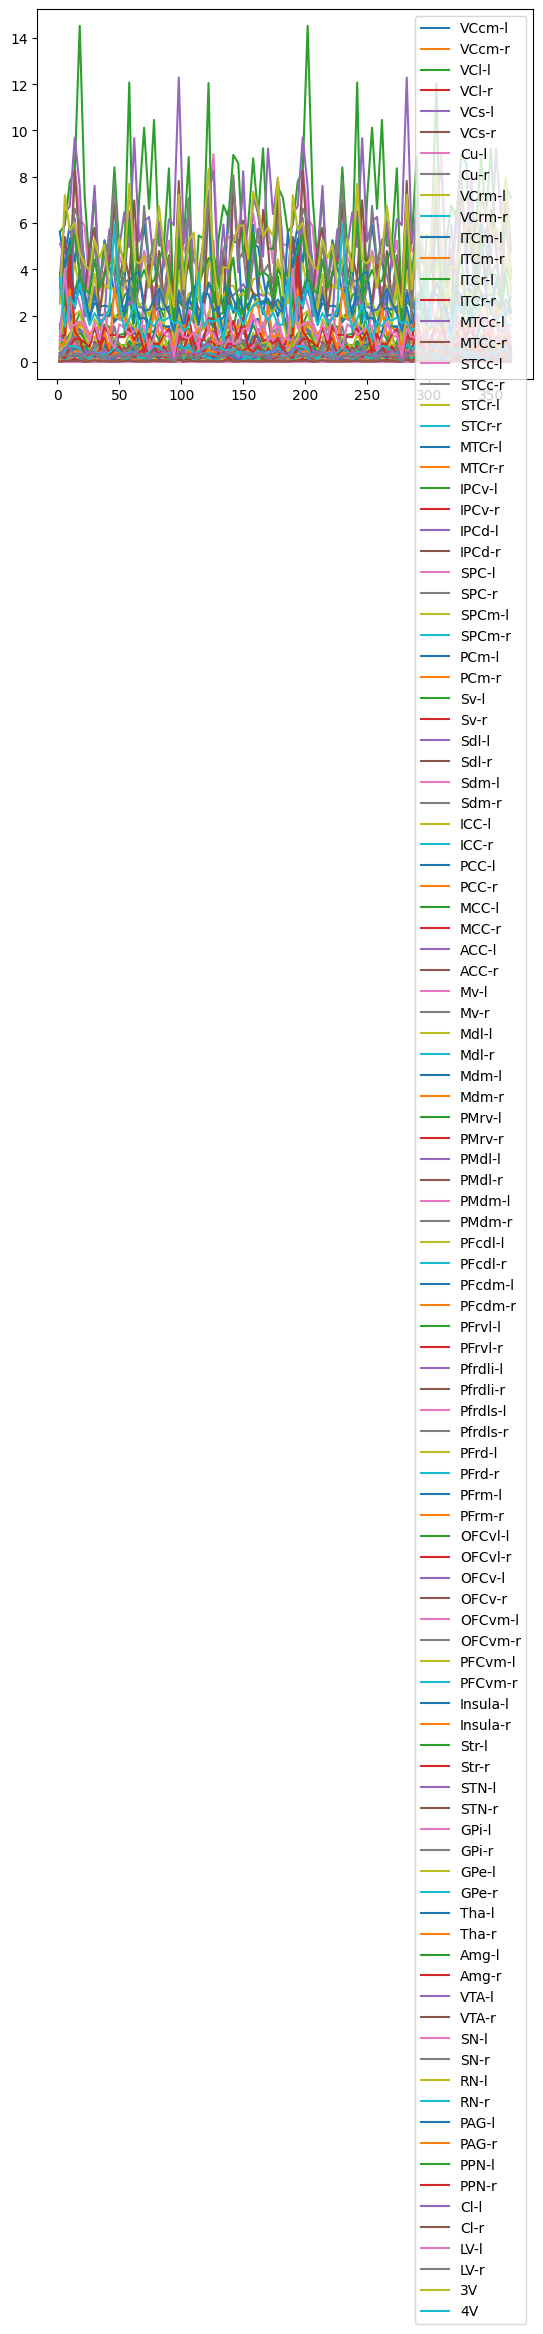

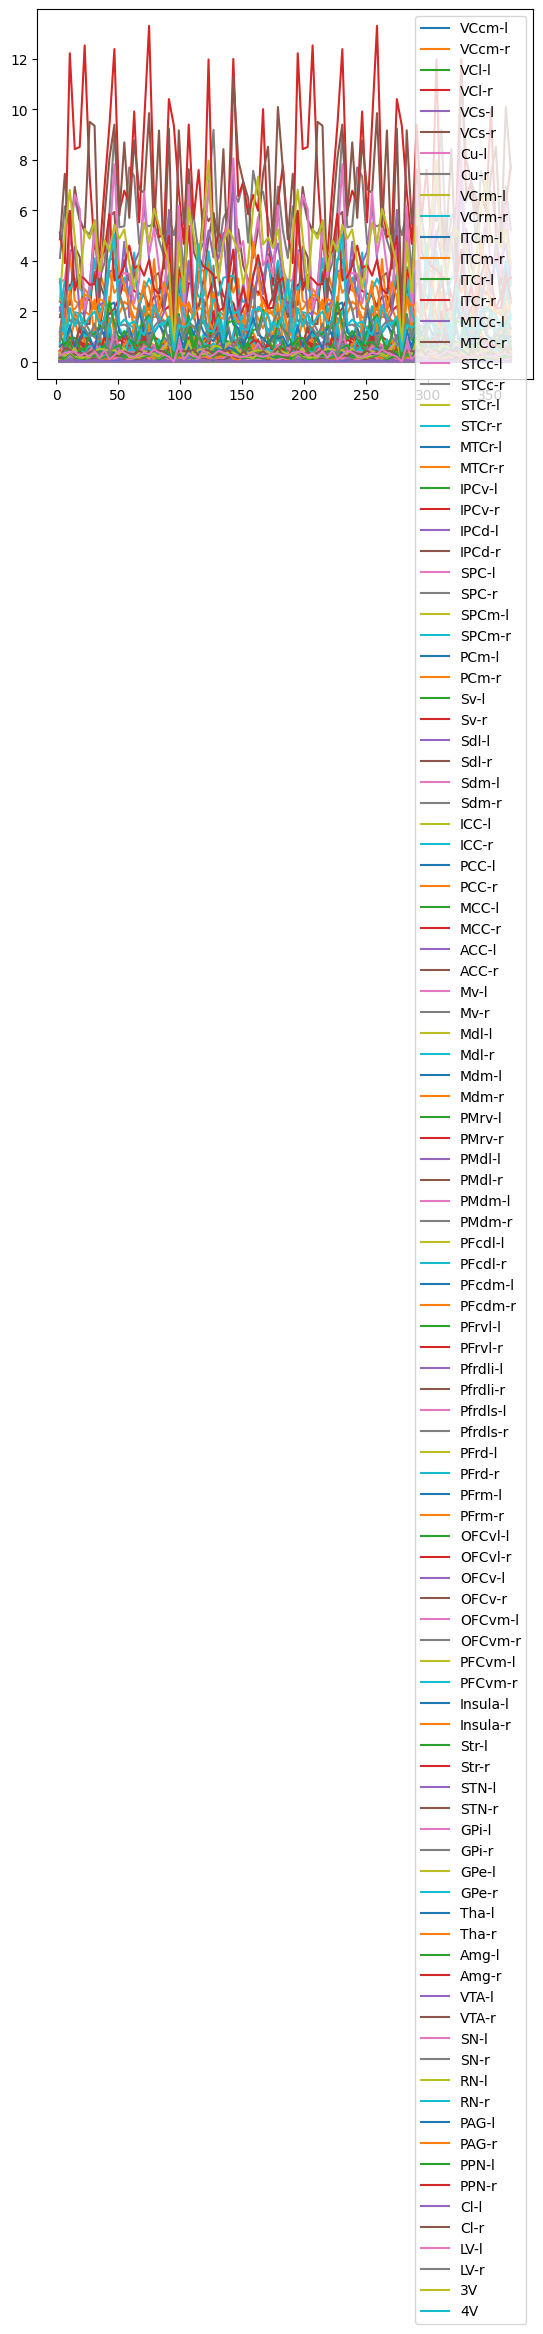

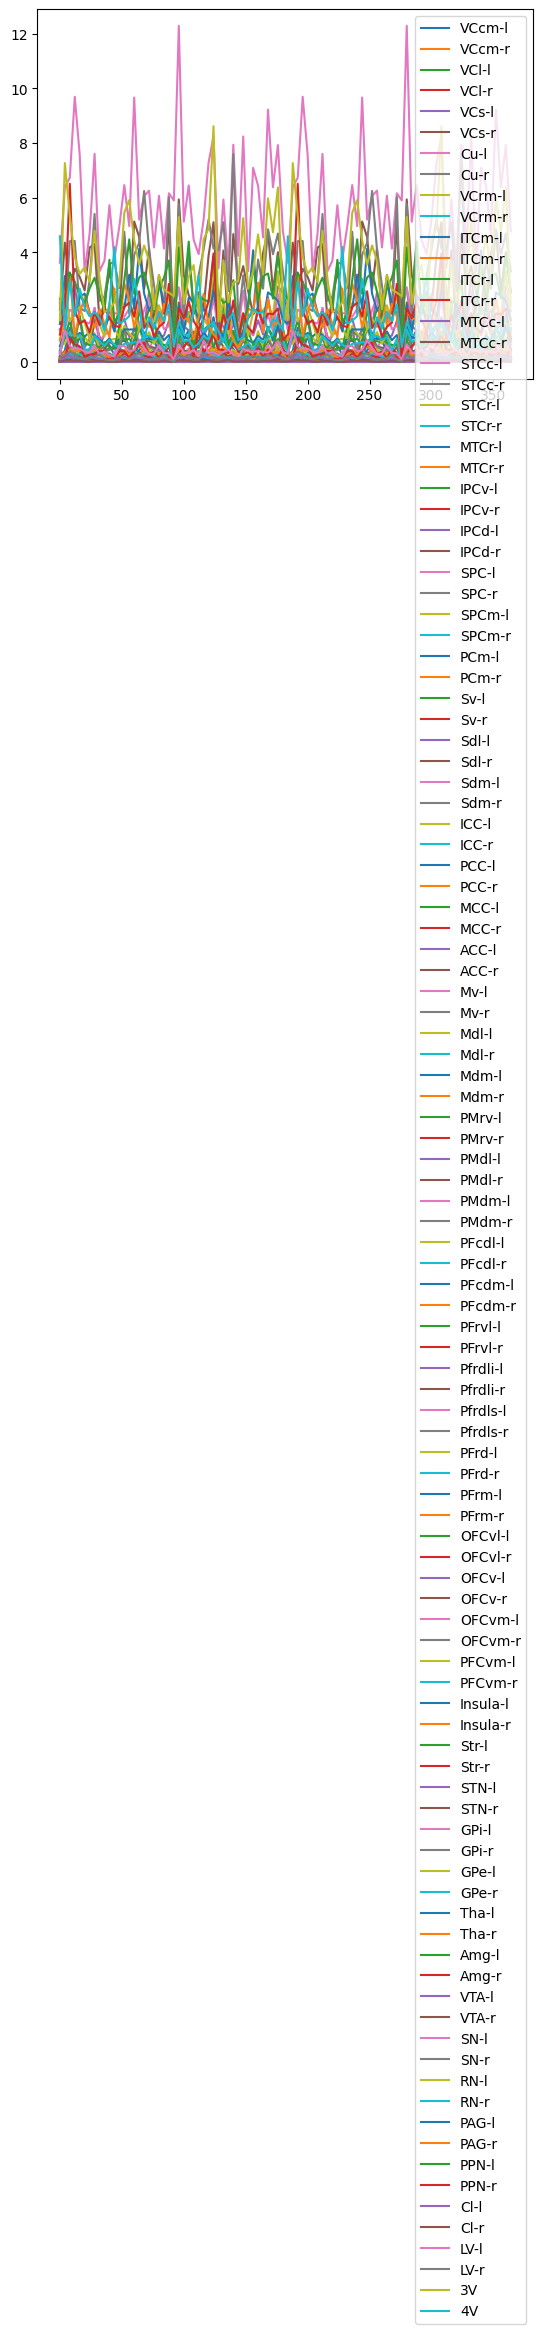

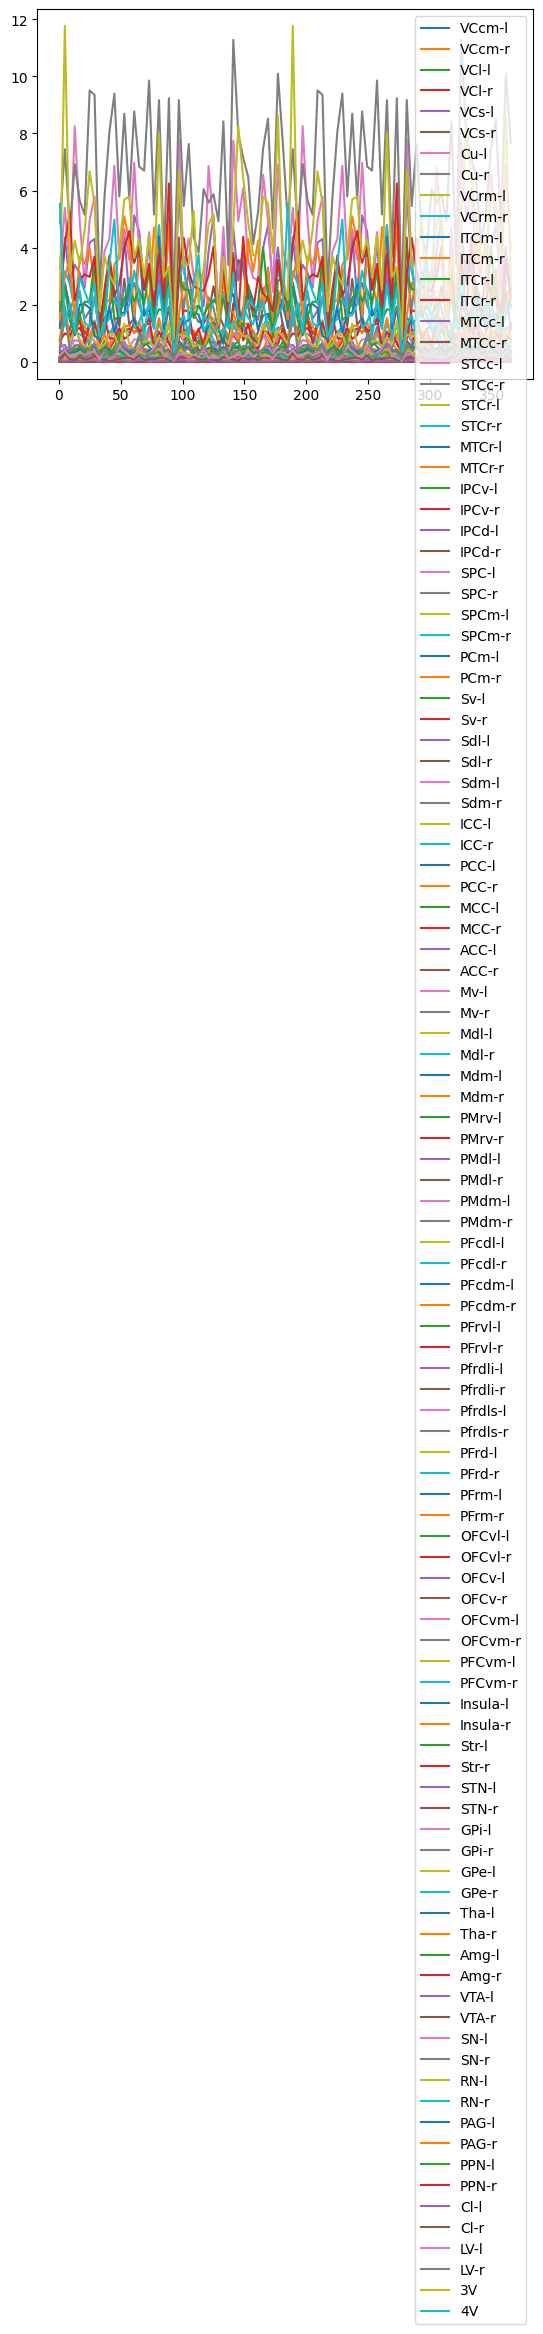

In [108]:
data.groupby('structure').plot()

In [324]:
df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_midbrain-connectome.csv')

# Assuming 'df' is your DataFrame
# df['ipsilateral'] = (df['structure'].str.split('-').str[1] == df['node'].str.split('-').str[1]).astype(int)

# Display the updated DataFrame
print(df)


     subject structure    VCcm-l    VCcm-r     VCl-l     VCl-r     VCs-l   
0    sub-001     VTA-l  0.010745  0.007795  0.004088  0.000270  0.001661  \
1    sub-001     VTA-r  0.005917  0.017075  0.001416  0.002669  0.000903   
2    sub-001      SN-l  0.103827  0.010995  0.053583  0.000650  0.066104   
3    sub-001      SN-r  0.014254  0.060098  0.001640  0.023737  0.000214   
4    sub-006     VTA-l  0.026779  0.006403  0.012318  0.000991  0.017847   
5    sub-006     VTA-r  0.006357  0.053458  0.003535  0.005660  0.004057   
6    sub-006      SN-l  0.140642  0.006087  0.052140  0.001045  0.072963   
7    sub-006      SN-r  0.003982  0.115359  0.001703  0.012431  0.001596   
8    sub-008     VTA-l  0.054258  0.032426  0.025817  0.004301  0.015215   
9    sub-008     VTA-r  0.009311  0.060074  0.004397  0.014498  0.001912   
10   sub-008      SN-l  0.207839  0.020273  0.093652  0.000603  0.086214   
11   sub-008      SN-r  0.022154  0.175051  0.007014  0.045968  0.001010   
12   sub-009

In [326]:
df = pd.read_csv('../dataframes/N46_midbrain-connectome-largerRegions.csv')
df.head()

subject structure  left-occipital  right-occipital  left-temporal   
0  sub-001     VTA-l        0.016141         0.008872       0.044329  \
1  sub-001     VTA-r        0.012682         0.026992       0.028697   
2  sub-001      SN-l        0.104108         0.014977       0.572493   
3  sub-001      SN-r        0.017494         0.089069       0.030036   
4  sub-006     VTA-l        0.037515         0.015260       0.128839   

   right-temporal  left-parietal  right-parietal  left-cingular   
0        0.016682       0.022154        0.006141       0.049523  \
1        0.071260       0.020656        0.017284       0.014169   
2        0.022959       0.152562        0.010234       0.365330   
3        0.440917       0.033678        0.075194       0.033031   
4        0.014295       0.145652        0.031298       0.154725   

   right-cingular  left-motor  right-motor  left-pfc  right-pfc  left-ofc   
0        0.005743    0.064389     0.014364  0.052682   0.019878  0.080362  \
1        0.039332    0.018723     0.089908  0.010976   0.092452  0.057242   
2        0.010467    0.450049     0.025378  0.246253   0.014738  0.368433   
3        0.170517    0.068094     0.304555  0.017094   0.261226  0.086318   
4        0.026666    0.140922     0.028879  0.052111   0.014740  0.109611   

   right-ofc  left-insular  right-insular  left-subctx  right-subctx  
0   0.048742      0.015854       0.003270     1.130501      0.576682  
1   0.127541      0.004378       0.032253     0.964548      1.174778  
2   0.090486      0.172153       0.004954     2.518211      0.741920  
3   0.284333      0.004681       0.107740     0.845043      1.946869  
4   0.051198      0.080198       0.016736     2.070970      0.928472

In [110]:
out_dir = '/home/atrutti1/Desktop/DWI_midbrain/dataframes/'
data = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_midbrain-connectome.csv')

data =data.drop(['subject'], axis=1)
means= data.groupby('structure').mean()
means['stat']='mean'
sd = data.groupby('structure').std()
sd['stat']='SD'

# means.to_csv(out_dir+'/N46_midbrain-connectome-descriptives.csv', header=True, index=False)
dscr = [means, sd]
df = pd.concat(dscr)

df=df.pivot_table(columns=['stat', 'structure'], sort= False )
df.to_csv(out_dir+'/N46_midbrain-connectome-descriptives.csv', header=True, index=True)
df
# sd

stat           mean                                      SD             
structure      SN-l      SN-r     VTA-l     VTA-r      SN-l      SN-r   
VCcm-l     0.182276  0.010947  0.031230  0.011681  0.072066  0.005404  \
VCcm-r     0.006068  0.124334  0.005262  0.023129  0.004109  0.047830   
VCl-l      0.079601  0.004076  0.015662  0.004551  0.073809  0.005660   
VCl-r      0.001293  0.050413  0.001307  0.008593  0.001280  0.033407   
VCs-l      0.097597  0.001773  0.017857  0.002812  0.065715  0.001913   
...             ...       ...       ...       ...       ...       ...   
Cl-r       0.025405  0.338581  0.022363  0.109319  0.018313  0.114697   
LV-l       1.348285  0.290555  0.419553  0.269923  0.614009  0.118988   
LV-r       0.272378  1.380027  0.171517  0.467704  0.105047  0.600981   
3V         4.955002  4.662206  3.679414  4.366693  1.495317  1.295993   
4V         2.086773  1.795989  1.704645  1.958763  0.826778  0.886996   

stat                           
structure     VTA-l     VTA-r  
VCcm-l     0.013407  0.005432  
VCcm-r     0.004777  0.011249  
VCl-l      0.011813  0.003149  
VCl-r      0.001247  0.006531  
VCs-l      0.013680  0.003327  
...             ...       ...  
Cl-r       0.016253  0.055199  
LV-l       0.194734  0.134655  
LV-r       0.078444  0.261700  
3V         1.579724  2.067755  
4V         0.814000  1.044564  

[110 rows x 8 columns]

In [323]:
out_dir = '/home/atrutti1/Desktop/DWI_midbrain/dataframes/'
data = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_midbrain-connectome-largerRegions.csv')

data =data.drop(['subject'], axis=1)
means= data.groupby('structure').mean()
means['stat']='mean'
sd = data.groupby('structure').std()
sd['stat']='SD'

# means.to_csv(out_dir+'/N46_midbrain-connectome-descriptives.csv', header=True, index=False)
dscr = [means, sd]
df = pd.concat(dscr)

df=df.pivot_table(columns=['stat', 'structure'], sort= False )
df.to_csv(out_dir+'/N46_midbrain-connectome-descriptives-largerRegions.csv', header=True, index=True)
df
# sd

stat                 mean                                      SD             
structure            SN-l      SN-r     VTA-l     VTA-r      SN-l      SN-r   
left-occipital   0.174045  0.013436  0.032626  0.011908  0.065281  0.006290  \
right-occipital  0.015958  0.164660  0.010071  0.034817  0.008044  0.057726   
left-temporal    0.884509  0.096665  0.145976  0.075689  0.315410  0.063463   
right-temporal   0.049544  0.637672  0.033444  0.098330  0.028599  0.158214   
left-parietal    0.459925  0.067018  0.115256  0.052961  0.150245  0.029837   
right-parietal   0.065074  0.439926  0.032554  0.121314  0.031416  0.147985   
left-cingular    0.648099  0.057184  0.147868  0.042166  0.268051  0.034065   
right-cingular   0.061878  0.796476  0.035910  0.201961  0.031533  0.255742   
left-motor       0.551092  0.078824  0.141541  0.060637  0.233959  0.050348   
right-motor      0.058461  0.546099  0.034475  0.149779  0.040071  0.222455   
left-pfc         0.273032  0.040557  0.091133  0.039153  0.098798  0.027711   
right-pfc        0.035598  0.287317  0.025071  0.093138  0.016393  0.108509   
left-ofc         0.438182  0.135262  0.154905  0.117934  0.174435  0.055698   
right-ofc        0.121961  0.274417  0.075277  0.127723  0.051161  0.107997   
left-insular     0.257297  0.017408  0.060778  0.019790  0.093581  0.009501   
right-insular    0.013449  0.215671  0.009402  0.052548  0.010728  0.086787   
left-subctx      3.105402  1.263921  1.635117  1.398505  0.614217  0.360264   
right-subctx     1.118156  3.041771  1.027348  1.728643  0.330127  0.514334   

stat                                 
structure           VTA-l     VTA-r  
left-occipital   0.014023  0.006660  
right-occipital  0.006408  0.016531  
left-temporal    0.065556  0.037689  
right-temporal   0.018983  0.027633  
left-parietal    0.045105  0.024148  
right-parietal   0.016360  0.051574  
left-cingular    0.067479  0.023410  
right-cingular   0.022759  0.081524  
left-motor       0.060959  0.037323  
right-motor      0.026687  0.067546  
left-pfc         0.038749  0.021573  
right-pfc        0.013619  0.034015  
left-ofc         0.057719  0.047064  
right-ofc        0.029415  0.050203  
left-insular     0.028362  0.012943  
right-insular    0.005813  0.032820  
left-subctx      0.399990  0.416790  
right-subctx     0.331628  0.443031

In [3]:
data = pd.read_csv('../dataframes/N46_midbrain-connectome.csv')
# melted_df = pd.melt(data, id_vars=['subject', 'structure'], value_vars=['VCcm-l', 'VCcm-r'], var_name='node', value_name='density')
melted_df = pd.melt(data, id_vars=['subject', 'structure'], value_vars=data.iloc[:,2:111], var_name='node', value_name='density')
melted_df['hem'] = melted_df['node'].apply(lambda x: 'r' if '-r' in x else 'l')
melted_df['ipsilateral'] = (melted_df['structure'].str.split('-').str[1] == melted_df['node'].str.split('-').str[1]).astype(int)
melted_df['node'] = melted_df['node'].str.replace('-l', '').str.replace('-r', '')

mean_density_df = melted_df.groupby(['structure', 'node', 'ipsilateral'])['density'].mean().reset_index()
std_density_df = melted_df.groupby(['structure', 'node', 'ipsilateral'])['density'].std().reset_index()
merged_df = pd.merge(mean_density_df, std_density_df, on=['structure', 'node', 'ipsilateral'])
merged_df.rename(columns={'density_x': 'mean','density_y': 'std'}, inplace=True)
merged_df.to_csv('../dataframes/mean_density_nodes.csv', index=False)
merged_df

structure  node  ipsilateral      mean       std
0        SN-l    3V            0  4.955002  1.495317
1        SN-l   ACC            0  0.046272  0.029376
2        SN-l   ACC            1  0.615740  0.309208
3        SN-l   Amg            0  0.502584  0.285071
4        SN-l   Amg            1  6.526220  2.714609
..        ...   ...          ...       ...       ...
431     VTA-r  VCrm            1  0.087994  0.045524
432     VTA-r   VCs            0  0.002812  0.003327
433     VTA-r   VCs            1  0.018503  0.018660
434     VTA-r   VTA            0  3.110255  1.216139
435     VTA-r   VTA            1  0.000000  0.000000

[436 rows x 5 columns]

In [6]:
melted_df['seed_no_hem'] = melted_df['structure'].str.replace('-l', '').str.replace('-r', '')
melted_df
mean_density_lobes = melted_df.groupby(['seed_no_hem', 'node', 'ipsilateral'])['density'].mean().reset_index()
std_density_lobes = melted_df.groupby(['seed_no_hem', 'node', 'ipsilateral'])['density'].std().reset_index()
merged_df = pd.merge(mean_density_lobes, std_density_lobes, on=['seed_no_hem', 'node', 'ipsilateral'])
merged_df.rename(columns={'density_x': 'mean','density_y': 'std'}, inplace=True)
merged_df
merged_df.to_csv('../dataframes/mean_density-nodes_no-hem.csv', index=False)

In [ ]:
def make_connectome_difference_dataframes(subject):
    print(subject+'\n')
    
    N = 46
        
    out_dir = '/home/atrutti1/Desktop/DWI_midbrain/dataframes/'
    os.makedirs(out_dir,exist_ok=True)

    dataframe = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/connectome/'+subject+'_midbrain-connectome.csv', )

    dataframe = dataframe.drop(['Unnamed: 0'], axis=1)#     all_subs_df = Path(out_dir+'/N'+str(N)+'_midbrain-connectome.csv')
#     print(dataframe.head())
    names = list(dataframe.columns)
    df = dataframe.iloc[0:3:2, 2:].diff()
    #left
    df['structure']= 'left'
    df['subject'] = subject
    df = df.reindex(columns= names)
    df = df.loc[[2]]
    #right
    df2 = dataframe.iloc[1:4:2, 2:].diff()
    df2['structure']= 'right'
    df2['subject'] = subject
    df2 = df2.reindex(columns= names)
    df2 = df2.loc[[3]]
    #concatenate 
    df_list = [df, df2]
    df = pd.concat(df_list)
#     print(df)

    all_subs_df = Path(out_dir+'/N'+str(N)+'_midbrain-connectome-diff.csv')
  
    if all_subs_df.exists(): 
        all_subs_df = pd.read_csv(all_subs_df)
        new_all_subs_df = pd.concat([all_subs_df, df], axis=0)
        print(new_all_subs_df.tail())
        
        new_all_subs_df.to_csv(out_dir+'/N'+str(N)+'_midbrain-connectome-diff.csv', header=True, index=False)

    else:
        print('no existing dataframe found - making new dataframe')
        
        df.to_csv(out_dir+'/N'+str(N)+'_midbrain-connectome-diff.csv', header=True, index=False)
   

if __name__ == '__main__':
    pool = Pool(1) 
    pool.map(make_connectome_difference_dataframes, subjects) 
    pool.close() 
    
    
    

In [116]:
pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_midbrain-connectome-diff.csv')

subject structure    VCcm-l    VCcm-r     VCl-l     VCl-r     VCs-l   
0   sub-001      left  0.093081  0.003200  0.049496  0.000380  0.064442  \
1   sub-001     right  0.008337  0.043023  0.000224  0.021069 -0.000689   
2   sub-006      left  0.113863 -0.000315  0.039822  0.000054  0.055116   
3   sub-006     right -0.002375  0.061901 -0.001831  0.006770 -0.002461   
4   sub-008      left  0.153581 -0.012153  0.067835 -0.003697  0.070999   
..      ...       ...       ...       ...       ...       ...       ...   
87  sub-090     right  0.002617  0.083581 -0.001179  0.013204 -0.000191   
88  sub-091      left  0.142166  0.003310  0.046743 -0.000692  0.105524   
89  sub-091     right -0.003709  0.102580 -0.002023  0.048624  0.000372   
90  sub-095      left  0.131736 -0.000543  0.050028 -0.000383  0.069297   
91  sub-095     right -0.004599  0.123907 -0.001155  0.054056 -0.002542   

       VCs-r      Cu-l      Cu-r    VCrm-l    VCrm-r    ITCm-l    ITCm-r   
0   0.000657  0.027374  0.001356  0.205441  0.024934  2.374531  0.037081  \
1   0.044816  0.003335  0.021180  0.012852  0.180297  0.021772  1.593820   
2   0.001817  0.082580  0.009178  0.439613  0.060019  4.283136  0.064310   
3   0.021472  0.000987  0.177012 -0.005008  0.150537 -0.219759  1.459772   
4  -0.004576  0.100158 -0.002706  0.280618  0.052946  4.632885 -0.100719   
..       ...       ...       ...       ...       ...       ...       ...   
87  0.041276  0.004850  0.107045  0.032846  0.342601  0.111344  1.645319   
88  0.002726  0.101682  0.003277  0.209497  0.033738  1.534412  0.055264   
89  0.063423 -0.000175  0.173584  0.001456  0.314545  0.097299  2.235871   
90 -0.001055  0.141758  0.015279  0.157239  0.016839  2.375598  0.046833   
91  0.099514  0.013999  0.135310  0.002106  0.415282  0.127994  2.845409   

      ITCr-l    ITCr-r    MTCc-l    MTCc-r    STCc-l    STCc-r    STCr-l   
0   0.541562  0.003249  0.046591  0.000209  0.058739 -0.000641  0.032183  \
1  -0.010523  0.344908 -0.000400  0.048243 -0.000178  0.026426  0.000380   
2   0.641475  0.010622  0.036595  0.001352  0.231883  0.022187  0.278577   
3  -0.027015  0.100858 -0.000456  0.049293 -0.001317  0.132145 -0.013844   
4   0.967135 -0.025594  0.036185 -0.005506  0.053771 -0.003618  0.095105   
..       ...       ...       ...       ...       ...       ...       ...   
87  0.004733  0.453113  0.000086  0.030984  0.000775  0.168040  0.001273   
88  0.414604  0.018759  0.045135 -0.000104  0.266458  0.006636  0.182392   
89 -0.002885  0.367323 -0.001658  0.041346 -0.000449  0.184285 -0.015604   
90  0.294136  0.023663  0.047409  0.000248  0.136090  0.008517  0.153312   
91  0.045626  0.423432 -0.001764  0.044825 -0.007318  0.079886 -0.010034   

      STCr-r    MTCr-l    MTCr-r    IPCv-l    IPCv-r    IPCd-l    IPCd-r   
0   0.000122  0.115380 -0.002358  0.669229  0.008912  0.057309  0.001330  \
1   0.050955 -0.003018  0.153588  0.012076  0.181786  0.000563  0.029760   
2  -0.000569  0.215245  0.001120  1.296254  0.153544  0.495015  0.014989   
3   0.059067 -0.019838  0.039899 -0.038830  0.371557 -0.005102  0.188404   
4  -0.002893  0.630733 -0.009639  1.290466 -0.037168  0.054460 -0.000028   
..       ...       ...       ...       ...       ...       ...       ...   
87  0.092206 -0.001766  0.125612  0.099545  0.590507  0.006647  0.135993   
88  0.002940  0.276691 -0.000953  0.885515  0.093816  0.212932  0.002540   
89  0.102259 -0.021219  0.105256 -0.060187  0.873535 -0.001003  0.188350   
90 -0.004878  0.133351  0.001195  0.671994  0.188136  0.150583  0.001734   
91  0.197137 -0.005059  0.116793 -0.014212  0.330283 -0.005937  0.086711   

       SPC-l     SPC-r    SPCm-l    SPCm-r     PCm-l     PCm-r      Sv-l   
0   0.079700 -0.000155  0.044141  0.004004  0.068318  0.003049  0.073740  \
1  -0.000707  0.017140  0.007491  0.062953  0.002865  0.062406  0.023786   
2   0.183028  0.007732  0.151065  0.010873  0.518373  0.003085  0.734475   
3  -0.000929  0.117018 -0.003569  0.583291 -0.008220  0.2594

In [ ]:
def make_connectome_difference_df_4largerAreas(subject):
    print(subject+'\n')
    
    N = 46
        
    out_dir = '/home/atrutti1/Desktop/DWI_midbrain/dataframes/'
    os.makedirs(out_dir,exist_ok=True)

    dataframe = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/connectome/'+subject+'_midbrain-connectome.csv' )

    dataframe = dataframe.drop(['Unnamed: 0'], axis=1)#     all_subs_df = Path(out_dir+'/N'+str(N)+'_midbrain-connectome.csv')
#     print(dataframe.head())
#     print(dataframe.iloc[:, 2:12:2].mean(axis=1))
    dataframe['left-occipital'] = dataframe.iloc[:, 2:12:2].mean(axis=1)
    dataframe['right-occipital'] = dataframe.iloc[:, 3:12:2].mean(axis=1)
    dataframe['left-temporal'] = dataframe.iloc[:, 12:24:2].mean(axis=1)
    dataframe['right-temporal'] = dataframe.iloc[:, 13:24:2].mean(axis=1)
    dataframe['left-parietal'] = dataframe.iloc[:, 24:40:2].mean(axis=1)
    dataframe['right-parietal'] = dataframe.iloc[:, 25:40:2].mean(axis=1)
    dataframe['left-cingular'] = dataframe.iloc[:, 40:48:2].mean(axis=1)
    dataframe['right-cingular'] = dataframe.iloc[:, 41:48:2].mean(axis=1)
    dataframe['left-motor'] = dataframe.iloc[:, 48:60:2].mean(axis=1)
    dataframe['right-motor'] = dataframe.iloc[:, 49:60:2].mean(axis=1)
    dataframe['left-pfc'] = dataframe.iloc[:, 60:74:2].mean(axis=1)
    dataframe['right-pfc'] = dataframe.iloc[:, 61:74:2].mean(axis=1)
    dataframe['left-ofc'] = dataframe.iloc[:, 74:82:2].mean(axis=1)
    dataframe['right-ofc'] = dataframe.iloc[:, 75:82:2].mean(axis=1)
    dataframe['left-insular'] = dataframe.iloc[:, 82:84:2].mean(axis=1)
    dataframe['right-insular'] = dataframe.iloc[:, 83:84:2].mean(axis=1)
    dataframe['left-subctx'] = dataframe.iloc[:, 84:111:2].mean(axis=1)
    dataframe['right-subctx'] = dataframe.iloc[:, 85:111:2].mean(axis=1)
#     print(dataframe.head())
    names = list(dataframe.columns[:2])
    names.extend(dataframe.columns[112:])
#     print(names)
    
#     # compute difference between left SN and left VTA (row 3 and 0)
    df = dataframe.iloc[0:3:2, 112:].diff()
#     print(df.head())
    #left
    df['structure']= 'left'
    df['subject'] = subject
    df = df.reindex(columns= names)
    df = df.loc[[2]]
#     print(df.head())
# #     #right
    df2 = dataframe.iloc[1:4:2, 2:].diff()
    df2['structure']= 'right'
    df2['subject'] = subject
    df2 = df2.reindex(columns= names)
    df2 = df2.loc[[3]]
    #concatenate 
    df_list = [df, df2]
    df = pd.concat(df_list)
#     print(df2)

    all_subs_df = Path(out_dir+'/N'+str(N)+'_midbrain-connectome-diff-largerRegions.csv')
  
    if all_subs_df.exists(): 
        all_subs_df = pd.read_csv(all_subs_df)
        new_all_subs_df = pd.concat([all_subs_df, df], axis=0)
        print(new_all_subs_df.tail())
        
        new_all_subs_df.to_csv(out_dir+'/N'+str(N)+'_midbrain-connectome-diff-largerRegions.csv', header=True, index=False)

    else:
        print('no existing dataframe found - making new dataframe')
        
        df.to_csv(out_dir+'/N'+str(N)+'_midbrain-connectome-diff-largerRegions.csv', header=True, index=False)
   

if __name__ == '__main__':
    pool = Pool(1) 
    pool.map(make_connectome_difference_df_4largerAreas, subjects) 
    pool.close() 
    
    
    

## Plot connectome: bar plot

In [137]:
ROIs =  [ 'VTA-l','VTA-r', 'SN-l', 'SN-r']
# subjects = ['sub-001', 'sub-006', 'sub-008']


# t-test

In [142]:
# test assumption of normality
hem = ['left', 'right']
N =46

In [149]:
#get non-parametric data 
from scipy import stats
def get_non_parametric_data(hem):
    print('\n\n\n'+hem+'\n')


    df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N'+str(N)+'_midbrain-connectome.csv')
    out_dir = '/home/atrutti1/Desktop/DWI_midbrain/dataframes'
    
    if hem == 'left':
        df['VTA-l'] = 0
        df['SN-l'] =0
        df_sn_l = df.loc[df['structure'] == 'SN-l']
        df_vta_l = df.loc[df['structure'] == 'VTA-l']

    else:
        df['VTA-r'] = 0
        df['SN-r'] =0
        df_sn_l = df.loc[df['structure'] == 'SN-r']
        df_vta_l = df.loc[df['structure'] == 'VTA-r']

    non_para = []

    for i in np.arange(2,111):
        data = df_sn_l.iloc[:, [i]].values - df_vta_l.iloc[:, [i]].values
        data = np.squeeze(data)
        k2, p =  stats.normaltest(data)
        alpha = 1e-3
#         print("p = {:g}".format(p))
        if p < alpha:  # null hypothesis: x comes from a normal distribution
#             print("The null hypothesis can be rejected")
            non_para.append(i)

#         else:
#             print("data comes from a normal distribution")
#     print('\n'+hem)
#     print(non_para) 
    return(non_para)
    


In [ ]:
df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N'+str(N)+'_midbrain-connectome.csv')
df.head()

In [159]:
df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_midbrain-connectome-largerRegions.csv')
df

subject structure  left-occipital  right-occipital  left-temporal   
0    sub-001     VTA-l        0.016141         0.008872       0.044329  \
1    sub-001     VTA-r        0.012682         0.026992       0.028697   
2    sub-001      SN-l        0.104108         0.014977       0.572493   
3    sub-001      SN-r        0.017494         0.089069       0.030036   
4    sub-006     VTA-l        0.037515         0.015260       0.128839   
..       ...       ...             ...              ...            ...   
179  sub-091      SN-r        0.009999         0.163605       0.065995   
180  sub-095     VTA-l        0.026662         0.005220       0.112238   
181  sub-095     VTA-r        0.013076         0.035893       0.077762   
182  sub-095      SN-l        0.136673         0.011247       0.635554   
183  sub-095      SN-r        0.014637         0.201507       0.102669   

     right-temporal  left-parietal  right-parietal  left-cingular   
0          0.016682       0.022154        0.006141       0.049523  \
1          0.071260       0.020656        0.017284       0.014169   
2          0.022959       0.152562        0.010234       0.365330   
3          0.440917       0.033678        0.075194       0.033031   
4          0.014295       0.145652        0.031298       0.154725   
..              ...            ...             ...            ...   
179        0.580794       0.027779        0.455648       0.046790   
180        0.028813       0.075792        0.020079       0.142079   
181        0.092904       0.044197        0.087633       0.045273   
182        0.041410       0.306367        0.084033       0.506019   
183        0.710818       0.038731        0.278121       0.033399   

     right-cingular  left-motor  right-motor  left-pfc  right-pfc  left-ofc   
0          0.005743    0.064389     0.014364  0.052682   0.019878  0.080362  \
1          0.039332    0.018723     0.089908  0.010976   0.092452  0.057242   
2          0.010467    0.450049     0.025378  0.246253   0.014738  0.368433   
3          0.170517    0.068094     0.304555  0.017094   0.261226  0.086318   
4          0.026666    0.140922     0.028879  0.052111   0.014740  0.109611   
..              ...         ...          ...       ...        ...       ...   
179        1.302024    0.070372     0.594817  0.020346   0.327594  0.108009   
180        0.015220    0.099574     0.026437  0.083705   0.016182  0.095745   
181        0.139895    0.063833     0.107031  0.032548   0.084884  0.082235   
182        0.049828    0.355824     0.065360  0.205309   0.035970  0.291486   
183        0.466883    0.044987     0.352445  0.017040   0.223635  0.119194   

     right-ofc  left-insular  right-insular  left-subctx  right-subctx  
0     0.048742      0.015854       0.003270     1.130501      0.576682  
1     0.127541      0.004378       0.032253     0.964548      1.174778  
2     0.090486      0.172153       0.004954     2.518211      0.741920  
3     0.284333      0.004681       0.107740     0.845043      1.946869  
4     0.051198      0.080198       0.016736     2.070970      0.928472  
..         ...           ...            ...          ...           ...  
179   0.314477      0.018692       0.229381     1.562747      3.669692  
180   0.047507      0.056801       0.007313     1.494751      0.829398  
181   0.078578      0.013818       0.041186     1.435932      1.784530  
182   0.084409      0.199591       0.005874     2.861107      0.945211  
183   0.198531      0.013761       0.200118     1.217797      3.064582  

[184 rows x 20 columns]

In [138]:
N =46 

In [277]:
from scipy.stats import ttest_1samp
from statsmodels.stats import multitest

df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N'+str(N)+'_midbrain-connectome.csv')
out_dir = '/home/atrutti1/Desktop/DWI_midbrain/dataframes'

df['VTA-l'] = 0
df['SN-l'] = 0 
column_names = list(df.columns.values)


df_sn_l = df[df['structure'] == 'SN-l']
df_vta_l = df[df['structure'] == 'VTA-l']

data = pd.DataFrame(df_sn_l.iloc[:, 2:].values - df_vta_l.iloc[:, 2:].values, columns=df_sn_l.columns[2:])
data['subject'] = list(df_sn_l['subject'])
data.set_index('subject', inplace=True)

data = data.melt(var_name='ROI', value_name='left difference', ignore_index=False)
# print(data.head())
tmp = data.groupby('ROI')['left difference'].apply(lambda x: ttest_1samp(x, 0))
# print(tmp)
stat_df = pd.DataFrame.from_dict(dict(zip(tmp.index, tmp.values)), orient='index', columns=['t', 'p'])

result = multitest.multipletests(stat_df['p'], alpha=0.05, method='b', is_sorted=False, returnsorted=False)
significant, p_corrected = result[0], result[1]
stat_df['significant'] = significant
stat_df['p_corrected'] = np.round(p_corrected, 4)

stat_df['significance'] = ''
# stat_df.loc[stat_df['p_corrected']<0.1,'significance']='†'
stat_df.loc[stat_df['p_corrected']<0.05,'significance']='*'
stat_df.loc[stat_df['p_corrected']<0.01,'significance']='**'
stat_df.loc[stat_df['p_corrected']<0.001,'significance']='***'

# stat_df['significance'] = stat_df['p_corrected'].map(significance_levels)
# print(stat_df)
desired_order = column_names[2:]

# df_sorted = stat_df.sort_values(by='ROI')
# df_sorted = stat_df.sort_index()
df_sorted = stat_df.loc[desired_order]

df_sorted.index.name = 'node'
print(df_sorted)

df_flattened = df_sorted.reset_index()



df = df_flattened
# df
df.to_csv(out_dir + '/N' + str(N) + '_left-ROIs_stats.csv', header=True, index=True)


                  t             p  significant  p_corrected significance
node                                                                    
VCcm-l    21.679960  1.038968e-37         True       0.0000          ***
VCcm-r     2.192773  3.087379e-02        False       1.0000             
VCl-l      9.515407  2.633492e-15         True       0.0000          ***
VCl-r     -0.109703  9.128864e-01        False       1.0000             
VCs-l     13.510682  1.814683e-23         True       0.0000          ***
VCs-r      0.757300  4.508268e-01        False       1.0000             
Cu-l      18.570557  1.039191e-32         True       0.0000          ***
Cu-r       6.053590  3.121451e-08         True       0.0000          ***
VCrm-l    21.038064  1.020780e-36         True       0.0000          ***
VCrm-r    10.140423  1.299423e-16         True       0.0000          ***
ITCm-l    22.308543  1.158823e-38         True       0.0000          ***
ITCm-r     6.443962  5.437567e-09         True     

In [276]:
from scipy.stats import ttest_1samp
from statsmodels.stats import multitest

df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N'+str(N)+'_midbrain-connectome.csv')
out_dir = '/home/atrutti1/Desktop/DWI_midbrain/dataframes'

df['VTA-r'] = 0
df['SN-r'] = 0 
column_names = list(df.columns.values)

df_sn_l = df[df['structure'] == 'SN-r']
df_vta_l = df[df['structure'] == 'VTA-r']

data = pd.DataFrame(df_sn_l.iloc[:, 2:].values - df_vta_l.iloc[:, 2:].values, columns=df_sn_l.columns[2:])
data['subject'] = list(df_sn_l['subject'])
data.set_index('subject', inplace=True)

data = data.melt(var_name='ROI', value_name='right difference', ignore_index=False)
# print(data.head())
tmp = data.groupby('ROI')['right difference'].apply(lambda x: ttest_1samp(x, 0))
# print(tmp)
stat_df = pd.DataFrame.from_dict(dict(zip(tmp.index, tmp.values)), orient='index', columns=['t', 'p'])

result = multitest.multipletests(stat_df['p'], alpha=0.05, method='b', is_sorted=False, returnsorted=False)
significant, p_corrected = result[0], result[1]
stat_df['significant'] = significant
stat_df['p_corrected'] = np.round(p_corrected, 4)

stat_df['significance'] = ''
# stat_df.loc[stat_df['p_corrected']<0.1,'significance']='†'
stat_df.loc[stat_df['p_corrected']<0.05,'significance']='*'
stat_df.loc[stat_df['p_corrected']<0.01,'significance']='**'
stat_df.loc[stat_df['p_corrected']<0.001,'significance']='***'
# desired_order = column_names[2:]

desired_order = column_names[2:]

# df_sorted = stat_df.sort_values(by='ROI')
# df_sorted = stat_df.sort_index()
df_sorted = stat_df.loc[desired_order]

df_sorted.index.name = 'node'
print(df_sorted)

df_flattened = df_sorted.reset_index()



df = df_flattened

df.to_csv(out_dir + '/N' + str(N) + '_right-ROIs_stats.csv', header=True, index=True)


                  t             p  significant  p_corrected significance
node                                                                    
VCcm-l    -1.139743  2.573846e-01        False       1.0000             
VCcm-r    22.078091  2.576829e-38         True       0.0000          ***
VCl-l     -1.027958  3.066944e-01        False       1.0000             
VCl-r     14.194307  8.495568e-25         True       0.0000          ***
VCs-l     -3.219967  1.778110e-03        False       0.1956             
VCs-r     13.424636  2.678190e-23         True       0.0000          ***
Cu-l       4.097051  9.066072e-05         True       0.0100            *
Cu-r      19.830247  8.541425e-35         True       0.0000          ***
VCrm-l     3.601600  5.149503e-04        False       0.0566             
VCrm-r    20.046433  3.819284e-35         True       0.0000          ***
ITCm-l     4.260495  4.964049e-05         True       0.0055           **
ITCm-r    29.274865  4.304072e-48         True     

### same for larger regions

In [203]:
hem = ['left', 'right']    
N = 46


In [244]:
import scipy

from scipy import stats
import statsmodels

print(hem)


dat = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N'+str(N)+'_midbrain-connectome.csv')
out_dir = '/home/atrutti1/Desktop/DWI_midbrain/dataframes'

columns = ['subject', 'structure', 'left-occipital', 'right-occipital', 'left-temporal', 'right-temporal', 'left-parietal', 'right-parietal', 'left-cingular', 'right-cingular', 'left-motor', 'right-motor', 'left-pfc', 'right-pfc', 'left-ofc', 'right-ofc', 'left-insular', 'right-insular', 'left-subctx', 'right-subctx']
df = pd.DataFrame(columns=columns)

for subject in dat['subject'].unique():
#     print(subject)


    dataframe = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/connectome/'+subject+'_midbrain-connectome.csv' )

    dataframe = dataframe.drop(['Unnamed: 0'], axis=1)#     all_subs_df = Path(out_dir+'/N'+str(N)+'_midbrain-connectome.csv')
    #     print(dataframe.head())
    dataframe['left-occipital'] = dataframe.iloc[:, 2:12:2].mean(axis=1)
    dataframe['right-occipital'] = dataframe.iloc[:, 3:12:2].mean(axis=1)
    dataframe['left-temporal'] = dataframe.iloc[:, 12:24:2].mean(axis=1)
    dataframe['right-temporal'] = dataframe.iloc[:, 13:24:2].mean(axis=1)
    dataframe['left-parietal'] = dataframe.iloc[:, 24:40:2].mean(axis=1)
    dataframe['right-parietal'] = dataframe.iloc[:, 25:40:2].mean(axis=1)
    dataframe['left-cingular'] = dataframe.iloc[:, 40:48:2].mean(axis=1)
    dataframe['right-cingular'] = dataframe.iloc[:, 41:48:2].mean(axis=1)
    dataframe['left-motor'] = dataframe.iloc[:, 48:60:2].mean(axis=1)
    dataframe['right-motor'] = dataframe.iloc[:, 49:60:2].mean(axis=1)
    dataframe['left-pfc'] = dataframe.iloc[:, 60:74:2].mean(axis=1)
    dataframe['right-pfc'] = dataframe.iloc[:, 61:74:2].mean(axis=1)
    dataframe['left-ofc'] = dataframe.iloc[:, 74:82:2].mean(axis=1)
    dataframe['right-ofc'] = dataframe.iloc[:, 75:82:2].mean(axis=1)
    dataframe['left-insular'] = dataframe.iloc[:, 82:84:2].mean(axis=1)
    dataframe['right-insular'] = dataframe.iloc[:, 83:84:2].mean(axis=1)
    dataframe['left-subctx'] = dataframe.iloc[:, 84:111:2].mean(axis=1)
    dataframe['right-subctx'] = dataframe.iloc[:, 85:111:2].mean(axis=1)

    names = list(dataframe.columns[:2])
    names.extend(dataframe.columns[111:])
    #     print(names)

    new_df = dataframe[dataframe.columns.intersection(names)]
    #     print(new_df.head())
    df = pd.concat([df, new_df], ignore_index=True)
# df.iloc[0:3,95:]

df_sn_l = df.loc[df['structure'] == 'SN-r']
df_vta_l = df.loc[df['structure'] == 'VTA-r']
column_names = list(df.columns.values)

data = pd.DataFrame(df_sn_l.iloc[:,2:].values - df_vta_l.iloc[:,2:].values, columns=df_sn_l.columns[2:])#, 
data['subject'] = list(df_sn_l['subject'])
subject_column = data.pop('subject')
data.insert(0, 'subject', subject_column)
data.set_index('subject', inplace=True)

data = data.melt(var_name='ROI', value_name='right difference', ignore_index=False)
tmp = data.groupby('ROI')['right difference'].apply(lambda x: scipy.stats.ttest_1samp(x, 0))
stat_df = pd.DataFrame.from_dict(dict(zip(tmp.index, tmp.values)), orient='index', columns=['t', 'p'])
stat_df


result=statsmodels.stats.multitest.multipletests(stat_df['p'], alpha=0.05, method='b',  is_sorted=False, returnsorted=False)
significant, p_corrected = result[0], result[1]
significant
stat_df['significant']= significant
stat_df['p_corrected']= np.round(p_corrected,4)
stat_df
stat_df['significance'] = ''
stat_df['significance'] = ''
# stat_df.loc[stat_df['p_corrected']<0.1,'significance']='†'
stat_df.loc[stat_df['p_corrected']<0.05,'significance']='*'
stat_df.loc[stat_df['p_corrected']<0.01,'significance']='**'
stat_df.loc[stat_df['p_corrected']<0.001,'significance']='***'
desired_order = column_names[2:]

# Sorting the DataFrame based on the desired order
df_sorted = stat_df.loc[desired_order]
df_sorted.index.name = 'node'
df_flattened = df_sorted.reset_index()



df = df_flattened
print(df)
df.to_csv(out_dir+'/N'+str(N)+'_right-lobes_stats.csv', header=True, index=True)


['left', 'right']
               node          t             p  significant  p_corrected   
0    left-occipital   1.755253  8.602200e-02        False       1.0000  \
1   right-occipital  17.365760  1.424785e-21         True       0.0000   
2     left-temporal   2.536264  1.474419e-02        False       0.2801   
3    right-temporal  23.842255  3.638618e-27         True       0.0000   
4     left-parietal   2.932215  5.275591e-03        False       0.1002   
5    right-parietal  18.543504  1.060035e-22         True       0.0000   
6     left-cingular   3.368643  1.557015e-03         True       0.0296   
7    right-cingular  19.196709  2.648976e-23         True       0.0000   
8        left-motor   3.403006  1.409464e-03         True       0.0268   
9       right-motor  15.239121  2.202707e-19         True       0.0000   
10         left-pfc   0.449574  6.551754e-01        False       1.0000   
11        right-pfc  15.056527  3.473162e-19         True       0.0000   
12         left-ofc 

In [322]:
import scipy

from scipy import stats
import statsmodels

print(hem)


dat = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N'+str(N)+'_midbrain-connectome.csv')
out_dir = '/home/atrutti1/Desktop/DWI_midbrain/dataframes'

columns = ['subject', 'structure', 'left-occipital', 'right-occipital', 'left-temporal', 'right-temporal', 'left-parietal', 'right-parietal', 'left-cingular', 'right-cingular', 'left-motor', 'right-motor', 'left-pfc', 'right-pfc', 'left-ofc', 'right-ofc', 'left-insular', 'right-insular', 'left-subctx', 'right-subctx']
df = pd.DataFrame(columns=columns)

for subject in dat['subject'].unique():
#     print(subject)


    dataframe = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/connectome/'+subject+'_midbrain-connectome.csv' )

    dataframe = dataframe.drop(['Unnamed: 0'], axis=1)#     all_subs_df = Path(out_dir+'/N'+str(N)+'_midbrain-connectome.csv')
    #     print(dataframe.head())
    dataframe['left-occipital'] = dataframe.iloc[:, 2:12:2].mean(axis=1)
    dataframe['right-occipital'] = dataframe.iloc[:, 3:12:2].mean(axis=1)
    dataframe['left-temporal'] = dataframe.iloc[:, 12:24:2].mean(axis=1)
    dataframe['right-temporal'] = dataframe.iloc[:, 13:24:2].mean(axis=1)
    dataframe['left-parietal'] = dataframe.iloc[:, 24:40:2].mean(axis=1)
    dataframe['right-parietal'] = dataframe.iloc[:, 25:40:2].mean(axis=1)
    dataframe['left-cingular'] = dataframe.iloc[:, 40:48:2].mean(axis=1)
    dataframe['right-cingular'] = dataframe.iloc[:, 41:48:2].mean(axis=1)
    dataframe['left-motor'] = dataframe.iloc[:, 48:60:2].mean(axis=1)
    dataframe['right-motor'] = dataframe.iloc[:, 49:60:2].mean(axis=1)
    dataframe['left-pfc'] = dataframe.iloc[:, 60:74:2].mean(axis=1)
    dataframe['right-pfc'] = dataframe.iloc[:, 61:74:2].mean(axis=1)
    dataframe['left-ofc'] = dataframe.iloc[:, 74:82:2].mean(axis=1)
    dataframe['right-ofc'] = dataframe.iloc[:, 75:82:2].mean(axis=1)
    dataframe['left-insular'] = dataframe.iloc[:, 82:84:2].mean(axis=1)
    dataframe['right-insular'] = dataframe.iloc[:, 83:84:2].mean(axis=1)
    dataframe['left-subctx'] = dataframe.iloc[:, 84:111:2].mean(axis=1)
    dataframe['right-subctx'] = dataframe.iloc[:, 85:111:2].mean(axis=1)

    names = list(dataframe.columns[:2])
    names.extend(dataframe.columns[111:])
    #     print(names)

    new_df = dataframe[dataframe.columns.intersection(names)]
    #     print(new_df.head())
    df = pd.concat([df, new_df], ignore_index=True)
# df.iloc[0:3,95:]

df_sn_l = df.loc[df['structure'] == 'SN-l']
df_vta_l = df.loc[df['structure'] == 'VTA-l']
column_names = list(df.columns.values)

data = pd.DataFrame(df_sn_l.iloc[:,2:].values - df_vta_l.iloc[:,2:].values, columns=df_sn_l.columns[2:])#, 
data['subject'] = list(df_sn_l['subject'])
subject_column = data.pop('subject')
data.insert(0, 'subject', subject_column)
data.set_index('subject', inplace=True)

data = data.melt(var_name='ROI', value_name='left difference', ignore_index=False)
tmp = data.groupby('ROI')['left difference'].apply(lambda x: scipy.stats.ttest_1samp(x, 0))
stat_df = pd.DataFrame.from_dict(dict(zip(tmp.index, tmp.values)), orient='index', columns=['t', 'p'])
stat_df


result=statsmodels.stats.multitest.multipletests(stat_df['p'], alpha=0.05, method='b',  is_sorted=False, returnsorted=False)
significant, p_corrected = result[0], result[1]
significant
stat_df['significant']= significant
stat_df['p_corrected']= np.round(p_corrected,4)
stat_df
stat_df['significance'] = ''
stat_df['significance'] = ''
# stat_df.loc[stat_df['p_corrected']<0.1,'significance']='†'
stat_df.loc[stat_df['p_corrected']<0.05,'significance']='*'
stat_df.loc[stat_df['p_corrected']<0.01,'significance']='**'
stat_df.loc[stat_df['p_corrected']<0.001,'significance']='***'
desired_order = column_names[2:]

# Sorting the DataFrame based on the desired order
df_sorted = stat_df.loc[desired_order]
df_sorted.index.name = 'node'
df_flattened = df_sorted.reset_index()



df = df_flattened
print(df)
df.to_csv(out_dir+'/N'+str(N)+'_left-lobes_stats.csv', header=True, index=True)


['left', 'right']
               node          t             p  significant  p_corrected   
0    left-occipital  16.372083  1.416473e-20         True       0.0000  \
1   right-occipital   6.847533  1.715647e-08         True       0.0000   
2     left-temporal  17.220710  1.980095e-21         True       0.0000   
3    right-temporal   4.898496  1.288819e-05         True       0.0002   
4     left-parietal  18.381648  1.503461e-22         True       0.0000   
5    right-parietal   7.449588  2.205750e-09         True       0.0000   
6     left-cingular  15.203304  2.407814e-19         True       0.0000   
7    right-cingular   6.058856  2.553247e-07         True       0.0000   
8        left-motor  14.849814  5.842309e-19         True       0.0000   
9       right-motor   6.498730  5.662144e-08         True       0.0000   
10         left-pfc  16.210181  2.079066e-20         True       0.0000   
11        right-pfc   5.968234  3.480422e-07         True       0.0000   
12         left-ofc 

In [ ]:


from scipy import stats

def bonferroni_corrected_teststats_largerRegions(hem):
#     
    print(hem)


    dat = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N'+str(N)+'_midbrain-connectome.csv')
    out_dir = '/home/atrutti1/Desktop/DWI_midbrain/dataframes'

    columns = ['subject', 'structure', 'left-occipital', 'right-occipital', 'left-temporal', 'right-temporal', 'left-parietal', 'right-parietal', 'left-cingular', 'right-cingular', 'left-motor', 'right-motor', 'left-pfc', 'right-pfc', 'left-ofc', 'right-ofc', 'left-insular', 'right-insular', 'left-subctx', 'right-subctx']
    df = pd.DataFrame(columns=columns)

    for subject in dat['subject'].unique():
    #     print(subject)


        dataframe = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/data/dwi/'+subject+'/connectome/'+subject+'_midbrain-connectome.csv' )

        dataframe = dataframe.drop(['Unnamed: 0'], axis=1)#     all_subs_df = Path(out_dir+'/N'+str(N)+'_midbrain-connectome.csv')
    #     print(dataframe.head())
        dataframe['left-occipital'] = dataframe.iloc[:, 2:12:2].mean(axis=1)
        dataframe['right-occipital'] = dataframe.iloc[:, 3:12:2].mean(axis=1)
        dataframe['left-temporal'] = dataframe.iloc[:, 12:24:2].mean(axis=1)
        dataframe['right-temporal'] = dataframe.iloc[:, 13:24:2].mean(axis=1)
        dataframe['left-parietal'] = dataframe.iloc[:, 24:40:2].mean(axis=1)
        dataframe['right-parietal'] = dataframe.iloc[:, 25:40:2].mean(axis=1)
        dataframe['left-cingular'] = dataframe.iloc[:, 40:48:2].mean(axis=1)
        dataframe['right-cingular'] = dataframe.iloc[:, 41:48:2].mean(axis=1)
        dataframe['left-motor'] = dataframe.iloc[:, 48:60:2].mean(axis=1)
        dataframe['right-motor'] = dataframe.iloc[:, 49:60:2].mean(axis=1)
        dataframe['left-pfc'] = dataframe.iloc[:, 60:74:2].mean(axis=1)
        dataframe['right-pfc'] = dataframe.iloc[:, 61:74:2].mean(axis=1)
        dataframe['left-ofc'] = dataframe.iloc[:, 74:82:2].mean(axis=1)
        dataframe['right-ofc'] = dataframe.iloc[:, 75:82:2].mean(axis=1)
        dataframe['left-insular'] = dataframe.iloc[:, 82:84:2].mean(axis=1)
        dataframe['right-insular'] = dataframe.iloc[:, 83:84:2].mean(axis=1)
        dataframe['left-subctx'] = dataframe.iloc[:, 84:111:2].mean(axis=1)
        dataframe['right-subctx'] = dataframe.iloc[:, 85:111:2].mean(axis=1)

        names = list(dataframe.columns[:2])
        names.extend(dataframe.columns[111:])
    #     print(names)

        new_df = dataframe[dataframe.columns.intersection(names)]
    #     print(new_df.head())
        df = pd.concat([df, new_df], ignore_index=True)

    # print(df)



    if hem == 'left':
    #         df['VTA-l'] = 0
    #         df['SN-l'] =0
        df_sn = df.loc[df['structure'] == 'SN-l']
        df_vta = df.loc[df['structure'] == 'VTA-l']
    else:
    #         df['VTA-r'] = 0
    #         df['SN-r'] =0
        df_sn = df.loc[df['structure'] == 'SN-r']
        df_vta = df.loc[df['structure'] == 'VTA-r']

    df_sn = df_sn.drop('subject', axis =1)
    df_sn = df_sn.drop('structure', axis =1)
    #     print(df_sn)
    df_vta = df_vta.drop('subject', axis =1)
    df_vta = df_vta.drop('structure', axis =1)


    column_names = list(df_sn.columns.values)
#     print(column_names)
    data = [[np.nan, np.nan, np.nan]]
    new_df = pd.DataFrame(data, columns=['node', 't-value', 'p-value'])

    #     # setting bonferroni corrected alpha
    alpha_bonf = 0.05/(len(np.arange(1,19)))
#     print(alpha_bonf)
    for i in np.arange(0,18):
#         print(i)
        print('\n', column_names[i])
        data = df_sn.iloc[:, [i]].values - df_vta.iloc[:, [i]].values
        data = np.squeeze(data)
        data_series = pd.Series(data) 
    #     data_series
        t, p = stats.ttest_1samp(data_series, 0)
        if p < 0.00001:
            ast = '***'
        elif p < 0.0001:
            ast = '**'
        elif p < alpha_bonf:
            ast = '*' 
        else:
            ast = ''

        print('streamline difference of '+hem+' hemisphere SN vs. VTA   t =', np.round(t, 2), ' p =', np.round(p, 4),'  ', ast)

        dat = [[str(column_names[i]), t, p]]
        dat = pd.DataFrame(dat, columns=['node', 't-value', 'p-value'])
        frames =  [new_df, dat]
        new_df = pd.concat(frames)

    df = new_df[1:]
    df.to_csv(out_dir+'/N'+str(N)+'_diff-scores_ttest-bonf-corrected_largerRegions_'+hem+'.csv', header=True, index=True)
    return(df)
#
if __name__ == '__main__':
    pool = Pool(1) 
#     all_combinations = itertools.product(subjects, 
#                                          ['VTA-l', 'VTA-r', 'SN-l', 'SN-r'])
    pool.map(bonferroni_corrected_teststats_largerRegions, hem) 
    pool.close() 


# manuscript figures

#### a) Difference scores larger regions

### with adjusted scaling 

<Figure size 1000x750 with 0 Axes>

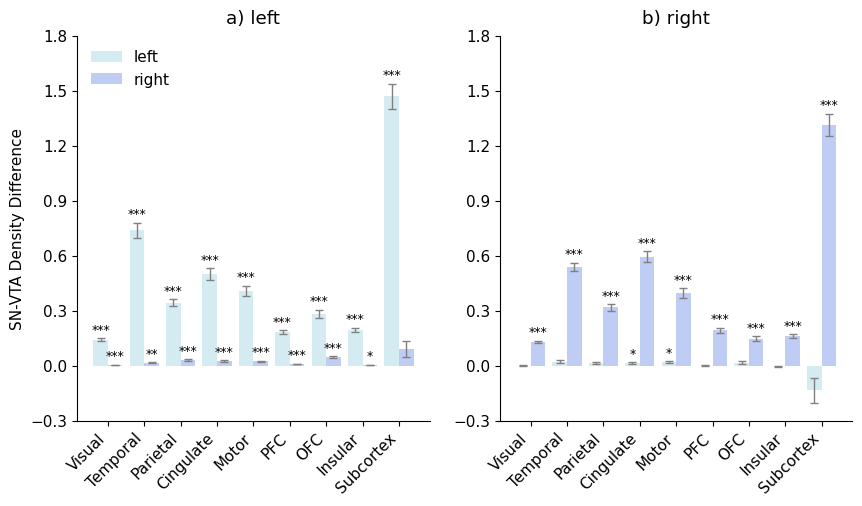

In [246]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

font = {'size'   : 11}
lines = {'linewidth': 1}
import matplotlib
matplotlib.rc('font', **font)
matplotlib.rc('lines', **lines)

# cm_to_inches = 1 / 2.54

# Create a figure with a width of 12 centimeters
# figure_width_cm = 12
# figure_width_inches = figure_width_cm * cm_to_inches
# f = plt.figure(figsize=(figure_width_inches, 15))  # 6 inches height

f = plt.figure(figsize=(10,7.5))


# def plot_sign_difference4largerRegions_by_hem(hem):
#     #seed_structure = seed_structures
#     print(hem+'\n')
    

df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_midbrain-connectome-diff-largerRegions.csv')
out_dir = '/home/atrutti1/Desktop/DWI_midbrain/plots/manuscript'

stats_df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_diff-scores_ttest-bonf-corrected_largerRegions_left.csv')

os.makedirs(out_dir,exist_ok=True)
# df.set_index('structure')
structures = df['structure']
structures = structures.unique()
structures = structures.tolist()

df = df.drop('subject', axis =1)
df = df.loc[df['structure'] == 'left']
df = df.drop('structure', axis =1)

df_mean = df.mean()
df_sem = df.sem()

# compute df's for broader brain region
data = pd.DataFrame(df_mean)
std_dat = pd.DataFrame(df_sem)
#     print(data.tail())
#occipital cortex
occ_dat_r = data.iloc[1]
occ_dat_l = data.iloc[0]
occ_std_dat_r = std_dat.iloc[1]
occ_std_dat_l = std_dat.iloc[0]
#     #temporal cortex
temp_dat_r = data.iloc[3]
temp_dat_l = data.iloc[2]
temp_std_dat_r = std_dat.iloc[3]
temp_std_dat_l = std_dat.iloc[2]
#     #parietal cortex
par_dat_r = data.iloc[5]
par_dat_l = data.iloc[4]
par_std_dat_r = std_dat.iloc[5]
par_std_dat_l = std_dat.iloc[4]
#     #cingular cortex
cin_dat_r = data.iloc[7]
cin_dat_l = data.iloc[6]
cin_std_dat_r = std_dat.iloc[7]
cin_std_dat_l = std_dat.iloc[6]

#motor cortex
m_dat_r = data.iloc[9]
m_dat_l = data.iloc[8]
m_std_dat_r =std_dat.iloc[9]
m_std_dat_l = std_dat.iloc[8]
#prefrontal cortex
pfc_dat_r = data.iloc[11]
pfc_dat_l = data.iloc[10]
pfc_std_dat_r = std_dat.iloc[11]
pfc_std_dat_l = std_dat.iloc[10]
#orbito-frontal cortex
of_dat_r = data.iloc[13]
of_dat_l = data.iloc[12]
of_std_dat_r = std_dat.iloc[13]
of_std_dat_l = std_dat.iloc[12]
#insular cortex
ins_dat_r = data.iloc[15]
ins_dat_l = data.iloc[14]
ins_std_dat_r = std_dat.iloc[15]
ins_std_dat_l = std_dat.iloc[14]
# subcortex
bg_dat_r = data.iloc[17]
bg_dat_l = data.iloc[16]
bg_std_dat_r = std_dat.iloc[17]
bg_std_dat_l = std_dat.iloc[16]

#     # Build the plot
plt.rcParams['figure.figsize'] = [10, 5]
nodes = list(df)
#     print(nodes)
#     nodes.remove('subject')
#     nodes.remove('structure')
x_pos = np.arange(len(nodes))#number of structures
# print(len(x_pos))
#     fig, ax = plt.subplots()
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2)

m1 = ax1.bar(x_pos[0]+0.1, occ_dat_l.squeeze(), yerr=occ_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=3, alpha=0.5, color= rgbs_lb[3], label = 'left occipital cortex')
m2 = ax1.bar(x_pos[1]-0.1, occ_dat_r.squeeze(), yerr=occ_std_dat_r.squeeze(), align='center', ecolor='grey', capsize=3, alpha=0.5, color=rgbs_b2[3], label = 'right occipital cortex')
m3 = ax1.bar(x_pos[2]+0.1, temp_dat_l.squeeze(), yerr=temp_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color=rgbs_lb[3],label = 'left temporal cortex')
m4 = ax1.bar(x_pos[3]-0.1, temp_dat_r.squeeze(), yerr=temp_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=3, alpha=0.5,color=rgbs_b2[3], label = 'right temporal cortex')
m5 = ax1.bar(x_pos[4]+0.1, par_dat_l.squeeze(), yerr=par_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color= rgbs_lb[3],label = 'left parietal cortex')#lighten_color('navy', 0.4))
m6 = ax1.bar(x_pos[5]-0.1, par_dat_r.squeeze(), yerr=par_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color=rgbs_b2[3],label = 'right parietal cortex')
m7 = ax1.bar(x_pos[6]+0.1, cin_dat_l.squeeze(), yerr=cin_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color= rgbs_lb[3],label = 'left cingular cortex')#lighten_color('navy', 0.4))
m8 = ax1.bar(x_pos[7]-0.1, cin_dat_r.squeeze(), yerr=cin_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color=rgbs_b2[3],label = 'right cingular cortex')
m9 = ax1.bar(x_pos[8]+0.1, m_dat_l.squeeze(), yerr=m_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color= rgbs_lb[3],label = 'left motor cortex')#lighten_color('navy', 0.4))
m10 = ax1.bar(x_pos[9]-0.1, m_dat_r.squeeze(), yerr=m_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color=rgbs_b2[3],label = 'right motor cortex')
m11 = ax1.bar(x_pos[10]+0.1, pfc_dat_l.squeeze(), yerr=pfc_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color= rgbs_lb[3],label = 'left prefrontal cortex')#lighten_color('navy', 0.4))
m12 = ax1.bar(x_pos[11]-0.1, pfc_dat_r.squeeze(), yerr=pfc_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color=rgbs_b2[3],label = 'right prefrontal cortex')
m13 = ax1.bar(x_pos[12]+0.1, of_dat_l.squeeze(), yerr=of_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color= rgbs_lb[3],label = 'left orbito-frontal cortex')#lighten_color('navy', 0.4))
m14 = ax1.bar(x_pos[13]-0.1, of_dat_r.squeeze(), yerr=of_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color=rgbs_b2[3],label = 'right orbito-frontal cortex')
m15 =  ax1.bar(x_pos[14]+0.1, ins_dat_l.squeeze(), yerr=ins_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color= rgbs_lb[3],label = 'left insular cortex')#lighten_color('navy', 0.4))
m16 =  ax1.bar(x_pos[15]-0.1, ins_dat_r.squeeze(), yerr=ins_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color=rgbs_b2[3],label = 'right insular cortex')
m17 =  ax1.bar(x_pos[16]+0.1, bg_dat_l.squeeze(), yerr=bg_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color= rgbs_lb[3],label = 'left subcortex')#lighten_color('navy', 0.4))
m19 =  ax1.bar(x_pos[17]-0.1, bg_dat_r.squeeze(), yerr=bg_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color=rgbs_b2[3],label = 'right subcortex')

#     print(plt.subplots())




node_labels = ['Visual', 'Temporal', 'Parietal', 'Cingulate', 'Motor', 'PFC', 'OFC',
           'Insular', 'Subcortex']

x_pos_array = np.arange(0.5, 18.5,2)
# x_pos_array = np.append(x_pos_array, 108)#[108, 109.5, 111, 112.5])
ax1.set_xticks(x_pos_array)
# y_pos_array = list(0:2:0.2)
ax1.set_yticks(np.arange(-0.3,2,0.3))
# plt.yticks(fontsize=20)
ax1.set_ylabel('SN-VTA Density Difference')#, fontsize=25)
plt.xticks(rotation=45) #,fontsize=20)
ax1.set_xticklabels(node_labels, rotation=45, ha='right')#, fontsize=20)
ax1.set_title('a) left' ,  y = 1.01)#fontsize=20,
# ax1.yaxis.grid(True)
ax1.legend(handles =[m1, m2] , labels= ['left', 'right'], loc='upper left', frameon=False)#, fontsize = 20)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.tick_params(axis='both', which='major')#, labelsize=20)


#add significance indicators
df1 = stats_df
df1 = df1.drop('Unnamed: 0', axis =1)
df1['significance'] = np.nan

column_names = list(df.columns.values)[:18]
alpha_bonf = 0.05/(len(np.arange(1,18)))    #2, 111 = N 109 --> as we're not interested in the ventricles
#     print(column_names)
#     print(alpha_bonf)

for i, j in enumerate(column_names):
#         print(i , j)
    df1.loc[(df1['node']== j) & (df1['p-value'] >=alpha_bonf) | (df1['p-value'].isnull()), 'significance'] = ''
    df1.loc[(df1['node']== j) & (df1['p-value'] < alpha_bonf), 'significance'] = '*'
    df1.loc[(df1['node']== j) & (df1['p-value'] < 0.0001), 'significance'] = '**'
    df1.loc[(df1['node']== j) & (df1['p-value'] < 0.00001), 'significance'] = '***'

    sig_symbol = df1.loc[(df1['node']== j), 'significance']
    sig_symbol = list(sig_symbol)

    if df_mean[j] >= 0:
        text_height = df_mean[j]+ df_sem[j] +0.01
    else:          
        text_height = df_mean[j]-(df_sem[j])-0.01


    if (i % 2) == 0:
        pos = x_pos[i]+0.1

    else:
        pos = x_pos[i]-0.1

    ax1.text(pos, text_height, sig_symbol[0], ha='center', va='bottom', c='k', fontsize =9)
#     print('x'+str(pos))
    
    
    

### right hem
df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_midbrain-connectome-diff-largerRegions.csv')

stats_df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_diff-scores_ttest-bonf-corrected_largerRegions_right.csv')

# os.makedirs(out_dir,exist_ok=True)
df.set_index('structure')
structures = df['structure']
structures = structures.unique()
structures = structures.tolist()

df = df.drop('subject', axis =1)
df = df.loc[df['structure'] == 'right']
df = df.drop('structure', axis =1)

df_mean = df.mean()
df_sem = df.sem()

# compute df's for broader brain region
data = pd.DataFrame(df_mean)
std_dat = pd.DataFrame(df_sem)
#     print(data.tail())
#occipital cortex
occ_dat_r = data.iloc[1]
occ_dat_l = data.iloc[0]
occ_std_dat_r = std_dat.iloc[1]
occ_std_dat_l = std_dat.iloc[0]
#     #temporal cortex
temp_dat_r = data.iloc[3]
temp_dat_l = data.iloc[2]
temp_std_dat_r = std_dat.iloc[3]
temp_std_dat_l = std_dat.iloc[2]
#     #parietal cortex
par_dat_r = data.iloc[5]
par_dat_l = data.iloc[4]
par_std_dat_r = std_dat.iloc[5]
par_std_dat_l = std_dat.iloc[4]
#     #cingular cortex
cin_dat_r = data.iloc[7]
cin_dat_l = data.iloc[6]
cin_std_dat_r = std_dat.iloc[7]
cin_std_dat_l = std_dat.iloc[6]

#motor cortex
m_dat_r = data.iloc[9]
m_dat_l = data.iloc[8]
m_std_dat_r =std_dat.iloc[9]
m_std_dat_l = std_dat.iloc[8]
#prefrontal cortex
pfc_dat_r = data.iloc[11]
pfc_dat_l = data.iloc[10]
pfc_std_dat_r = std_dat.iloc[11]
pfc_std_dat_l = std_dat.iloc[10]
#orbito-frontal cortex
of_dat_r = data.iloc[13]
of_dat_l = data.iloc[12]
of_std_dat_r = std_dat.iloc[13]
of_std_dat_l = std_dat.iloc[12]
#insular cortex
ins_dat_r = data.iloc[15]
ins_dat_l = data.iloc[14]
ins_std_dat_r = std_dat.iloc[15]
ins_std_dat_l = std_dat.iloc[14]
# subcortex
bg_dat_r = data.iloc[17]
bg_dat_l = data.iloc[16]
bg_std_dat_r = std_dat.iloc[17]
bg_std_dat_l = std_dat.iloc[16]

x_pos2 = np.arange(len(nodes))#number of structures

#     fig, ax = plt.subplots(122)
m1 = ax2.bar(x_pos2[0]+0.1, occ_dat_l.squeeze(), yerr=occ_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=3, alpha=0.5, color= rgbs_lb[3], label = 'left occipital cortex')
m2 = ax2.bar(x_pos2[1]-0.1, occ_dat_r.squeeze(), yerr=occ_std_dat_r.squeeze(), align='center', ecolor='grey', capsize=3, alpha=0.5, color=rgbs_b2[3], label = 'right occipital cortex')
m3 = ax2.bar(x_pos2[2]+0.1, temp_dat_l.squeeze(), yerr=temp_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color=rgbs_lb[3],label = 'left temporal cortex')
m4 = ax2.bar(x_pos2[3]-0.1, temp_dat_r.squeeze(), yerr=temp_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=3, alpha=0.5,color=rgbs_b2[3], label = 'right temporal cortex')
m5 = ax2.bar(x_pos2[4]+0.1, par_dat_l.squeeze(), yerr=par_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color= rgbs_lb[3],label = 'left parietal cortex')#lighten_color('navy', 0.4))
m6 = ax2.bar(x_pos2[5]-0.1, par_dat_r.squeeze(), yerr=par_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color=rgbs_b2[3],label = 'right parietal cortex')
m7 = ax2.bar(x_pos2[6]+0.1, cin_dat_l.squeeze(), yerr=cin_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color= rgbs_lb[3],label = 'left cingular cortex')#lighten_color('navy', 0.4))
m8 = ax2.bar(x_pos2[7]-0.1, cin_dat_r.squeeze(), yerr=cin_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color=rgbs_b2[3],label = 'right cingular cortex')
m9 = ax2.bar(x_pos2[8]+0.1, m_dat_l.squeeze(), yerr=m_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color= rgbs_lb[3],label = 'left motor cortex')#lighten_color('navy', 0.4))
m10 = ax2.bar(x_pos2[9]-0.1, m_dat_r.squeeze(), yerr=m_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color=rgbs_b2[3],label = 'right motor cortex')
m11 = ax2.bar(x_pos2[10]+0.1, pfc_dat_l.squeeze(), yerr=pfc_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color= rgbs_lb[3],label = 'left prefrontal cortex')#lighten_color('navy', 0.4))
m12 = ax2.bar(x_pos2[11]-0.1, pfc_dat_r.squeeze(), yerr=pfc_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color=rgbs_b2[3],label = 'right prefrontal cortex')
m13 = ax2.bar(x_pos2[12]+0.1, of_dat_l.squeeze(), yerr=of_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color= rgbs_lb[3],label = 'left orbito-frontal cortex')#lighten_color('navy', 0.4))
m14 = ax2.bar(x_pos2[13]-0.1, of_dat_r.squeeze(), yerr=of_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color=rgbs_b2[3],label = 'right orbito-frontal cortex')
m15 =  ax2.bar(x_pos2[14]+0.1, ins_dat_l.squeeze(), yerr=ins_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color= rgbs_lb[3],label = 'left insular cortex')#lighten_color('navy', 0.4))
m16 =  ax2.bar(x_pos2[15]-0.1, ins_dat_r.squeeze(), yerr=ins_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color=rgbs_b2[3],label = 'right insular cortex')
m17 =  ax2.bar(x_pos2[16]+0.1, bg_dat_l.squeeze(), yerr=bg_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color= rgbs_lb[3],label = 'left subcortex')#lighten_color('navy', 0.4))
m19 =  ax2.bar(x_pos2[17]-0.1, bg_dat_r.squeeze(), yerr=bg_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=3,alpha=0.5, color=rgbs_b2[3],label = 'right subcortex')




node_labels = ['Visual', 'Temporal', 'Parietal', 'Cingulate', 'Motor', 'PFC', 'OFC',
           'Insular', 'Subcortex']

x_pos_array = np.arange(0.5, 18.5,2)
# x_pos_array = np.append(x_pos_array, 108)#[108, 109.5, 111, 112.5])
ax2.set_xticks(x_pos_array)
# y_pos_array = list(0:2:0.2)
ax2.set_yticks(np.arange(-0.3,2,0.3))
# plt.yticks(fontsize=10)
# ax2.set_ylabel('Density', fontsize=10)
plt.xticks( rotation=45)#,fontsize=20,)
ax2.set_xticklabels(node_labels, rotation=45, ha='right')#, fontsize=20)
ax2.set_title('b) right' ,  y = 1.01)#,fontsize=20)
# ax2.yaxis.grid(True)
# ax2.legend(handles =[m1, m2] , labels= ['left', 'right'], loc='upper left', fontsize = 10, frameon=False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.tick_params(axis='y', which='major')#, labelsize=20)


#add significance indicators
df2 = stats_df
df2 = df2.drop('Unnamed: 0', axis =1)
df2['significance'] = np.nan

column_names = list(df.columns.values)[:18]
alpha_bonf = 0.05/(len(np.arange(1,18)))    #2, 111 = N 109 --> as we're not interested in the ventricles
#     print(column_names)
#     print(alpha_bonf)



for i, j in enumerate(column_names):
#         print(i , j)
    df2.loc[(df2['node']== j) & (df2['p-value'] >=alpha_bonf) | (df2['p-value'].isnull()), 'significance'] = ''
    df2.loc[(df2['node']== j) & (df2['p-value'] < alpha_bonf), 'significance'] = '*'
    df2.loc[(df2['node']== j) & (df2['p-value'] < 0.0001), 'significance'] = '**'
    df2.loc[(df2['node']== j) & (df2['p-value'] < 0.00001), 'significance'] = '***'

    sig_symbol2 = df2.loc[(df2['node']== j), 'significance']
    sig_symbol2 = list(sig_symbol2)

    if df_mean[j] >= 0:
        text_height2 = df_mean[j]+ df_sem[j] +0.01
    else:          
        text_height2 = df_mean[j]-(df_sem[j])-0.01


    if (i % 2) == 0:
        pos2 = x_pos2[i]+0.1

    else:
        pos2 = x_pos2[i]-0.1

    ax2.text(pos2, text_height2, sig_symbol2[0], ha='center', va='bottom', c='k', fontsize =9)
#     print(pos2)
#     print(pos2)

plt.savefig(''+out_dir+'/Difference-scores_lobes-ms.png')
plt.show()


      
# if __name__ == '__main__':
#     pool = Pool(1) 
#     pool.map(plot_sign_difference4largerRegions_by_hem, hem) 
#     pool.close() 
    


In [247]:

stats_df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_diff-scores_ttest-bonf-corrected_largerRegions_right.csv')
stats_df

Unnamed: 0             node    t-value       p-value
0            0   left-occipital   1.755253  8.602200e-02
1            0  right-occipital  17.365760  1.424785e-21
2            0    left-temporal   2.536264  1.474419e-02
3            0   right-temporal  23.842255  3.638618e-27
4            0    left-parietal   2.932215  5.275591e-03
5            0   right-parietal  18.543504  1.060035e-22
6            0    left-cingular   3.368643  1.557015e-03
7            0   right-cingular  19.196709  2.648976e-23
8            0       left-motor   3.403006  1.409464e-03
9            0      right-motor  15.239121  2.202707e-19
10           0         left-pfc   0.449574  6.551754e-01
11           0        right-pfc  15.056527  3.473162e-19
12           0         left-ofc   1.887717  6.552271e-02
13           0        right-ofc  11.151934  1.532542e-14
14           0     left-insular  -1.485238  1.444530e-01
15           0    right-insular  17.078933  2.736931e-21
16           0      left-subctx  -1.943102  5.827534e-02
17           0     right-subctx  21.286212  3.982657e-25

In [249]:
pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_right-lobes_stats.csv')

Unnamed: 0             node          t             p  significant   
0            0   left-occipital   1.755253  8.602200e-02        False  \
1            1  right-occipital  17.365760  1.424785e-21         True   
2            2    left-temporal   2.536264  1.474419e-02        False   
3            3   right-temporal  23.842255  3.638618e-27         True   
4            4    left-parietal   2.932215  5.275591e-03        False   
5            5   right-parietal  18.543504  1.060035e-22         True   
6            6    left-cingular   3.368643  1.557015e-03         True   
7            7   right-cingular  19.196709  2.648976e-23         True   
8            8       left-motor   3.403006  1.409464e-03         True   
9            9      right-motor  15.239121  2.202707e-19         True   
10          10         left-pfc   0.449574  6.551754e-01        False   
11          11        right-pfc  15.056527  3.473162e-19         True   
12          12         left-ofc   1.887717  6.552271e-02        False   
13          13        right-ofc  11.151934  1.532542e-14         True   
14          14     left-insular  -1.485238  1.444530e-01        False   
15          15    right-insular  17.078933  2.736931e-21         True   
16          16      left-subctx  -1.943102  5.827534e-02        False   
17          17     right-subctx  21.286212  3.982657e-25         True   
18          18               4V  -1.559424  1.259019e-01        False   

    p_corrected significance  
0        1.0000          NaN  
1        0.0000          ***  
2        0.2801          NaN  
3        0.0000          ***  
4        0.1002          NaN  
5        0.0000          ***  
6        0.0296            *  
7        0.0000          ***  
8        0.0268            *  
9        0.0000          ***  
10       1.0000          NaN  
11       0.0000          ***  
12       1.0000          NaN  
13       0.0000          ***  
14       1.0000          NaN  
15       0.0000          ***  
16       1.0000          NaN  
17       0.0000          ***  
18       1.0000          NaN

#### individual nodes

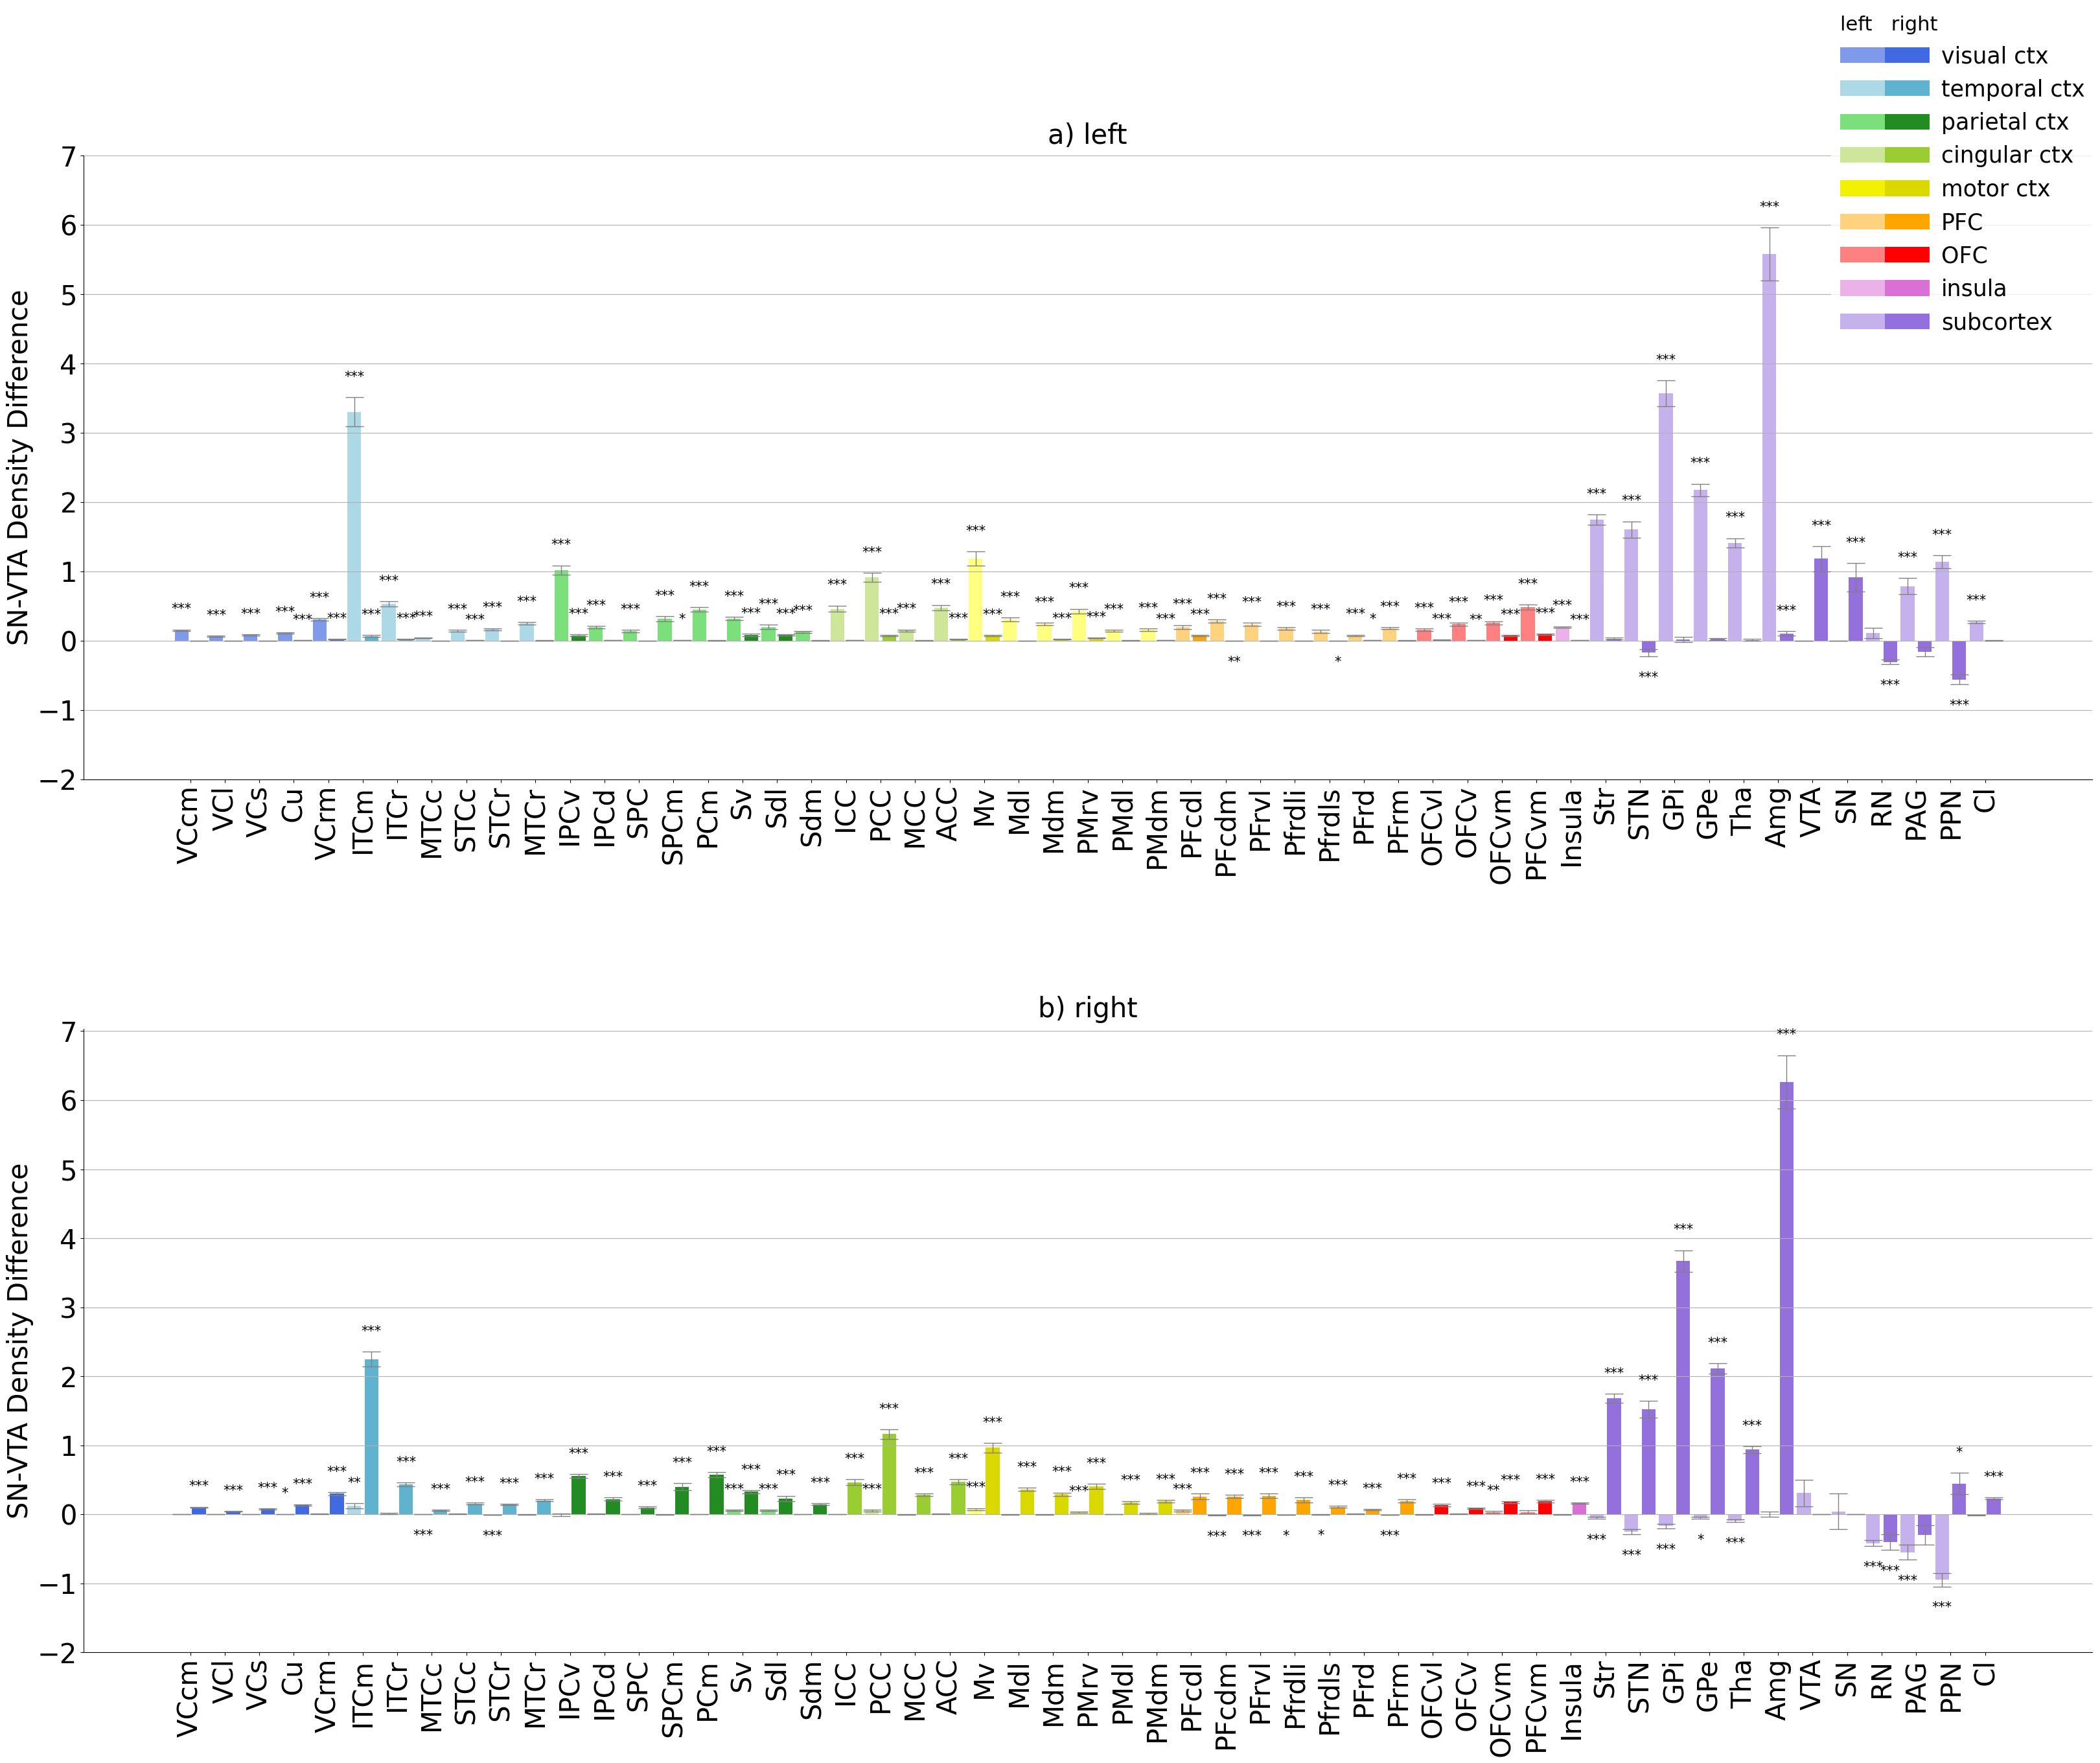

In [290]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Patch


df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_midbrain-connectome-diff.csv')
out_dir = '/home/atrutti1/Desktop/DWI_midbrain/plots/manuscript'

stats_df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_left-ROIs_stats.csv')

os.makedirs(out_dir,exist_ok=True)
df.set_index('structure')
structures = df['structure']
structures = structures.unique()
structures = structures.tolist()
#set ipsilateral midbrain ROIs to zero
# if hem == 'left':
df['VTA-l'] = 0 
df['SN-l'] = 0
# elif hem == 'right':


df = df.drop('subject', axis =1)
# 

df = df.loc[df['structure'] == 'left']
df = df.drop('structure', axis =1)

#     df.head()
df_mean = df.mean()
df_sem = df.sem()

######### somehow this does not work anymore #############

# compute df's for broader brain region
data = pd.DataFrame(df_mean)
std_dat = pd.DataFrame(df_sem)

#occipital cortex
occ_dat = data[:10]
occ_dat_r = data[1:10:2]
occ_dat_l = data[0:10:2]
occ_std_dat_r = std_dat[1:10:2]
occ_std_dat_l = std_dat[0:10:2]
#temporal cortex
temp_dat = data[10:22]
temp_dat_r = temp_dat[1:12:2]
temp_dat_l = temp_dat[0:12:2]
temp_std_dat = std_dat[10:22]
temp_std_dat_r = temp_std_dat[1:12:2]
temp_std_dat_l = temp_std_dat[0:12:2]
#parietal cortex
par_dat = data[22:38]
par_dat_r = par_dat[1::2]
par_dat_l = par_dat[0::2]
par_std_dat = std_dat[22:38]
par_std_dat_r = par_std_dat[1::2]
par_std_dat_l = par_std_dat[0::2]
#cingular cortex
cin_dat = data[38:46]
cin_dat_r = cin_dat[1::2]
cin_dat_l = cin_dat[0::2]
cin_std_dat = std_dat[38:46]
cin_std_dat_r = cin_std_dat[1::2]
cin_std_dat_l = cin_std_dat[0::2]
#frontal cortex
f_dat = data[46:72]
#motor cortex
m_dat = f_dat[0:12]
m_dat_r = m_dat[1::2]
m_dat_l = m_dat[0::2]
m_std_dat = std_dat[46:58]
m_std_dat_r = m_std_dat[1::2]
m_std_dat_l = m_std_dat[0::2]
#prefrontal cortex
pfc_dat = f_dat[12:]
pfc_dat_r = pfc_dat[1::2]
pfc_dat_l = pfc_dat[0::2]
pfc_std_dat = std_dat[58:72]
pfc_std_dat_r = pfc_std_dat[1::2]
pfc_std_dat_l = pfc_std_dat[0::2]
#orbito-frontal cortex
of_dat = data[72:80]
of_dat_r = of_dat[1::2]
of_dat_l = of_dat[0::2]
of_std_dat = std_dat[72:80]
of_std_dat_r = of_std_dat[1::2]
of_std_dat_l = of_std_dat[0::2]
#insular cortex
ins_dat = data[80:82]
ins_dat_r = ins_dat[1::2]
ins_dat_l = ins_dat[0::2]
ins_std_dat = std_dat[80:82]
ins_std_dat_r = ins_std_dat[1::2]
ins_std_dat_l = ins_std_dat[0::2]
# subcortex
bg_dat = data[82:106]
bg_dat_r = bg_dat[1::2]
bg_dat_l = bg_dat[0::2]
bg_std_dat = std_dat[82:106]
bg_std_dat_r = bg_std_dat[1::2]
bg_std_dat_l = bg_std_dat[0::2]

#     # Build the plot
plt.rcParams['figure.figsize'] = [40, 30]
nodes = list(df)
x_pos = np.arange(len(nodes)) -0.5#number of structures
fig, [ax, ax2] = plt.subplots(nrows=2, ncols=1, frameon= False)

plt.subplots_adjust(hspace=0.4)

m1 = ax.bar(x_pos[0:10:2], occ_dat_l.squeeze(), yerr=occ_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=10,  color= rgbs_b2[3], label = 'left occipital cortex')
m2 = ax.bar(x_pos[1:10:2], occ_dat_r.squeeze(), yerr=occ_std_dat_r.squeeze(), align='center', ecolor='grey', capsize=10,  color=rgbs_b2[2], label = 'right occipital cortex')
m3 = ax.bar(x_pos[10:22:2], temp_dat_l.squeeze(), yerr=temp_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=10, color=rgbs_lb[3],label = 'left temporal cortex')
m4 = ax.bar(x_pos[11:22:2], temp_dat_r.squeeze(), yerr=temp_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=10, color=rgbs_lb[2], label = 'right temporal cortex')
m5 = ax.bar(x_pos[22:38:2], par_dat_l.squeeze(), yerr=par_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=10, color= rgbs_fgreen[4],label = 'left parietal cortex')#lighten_color('navy', 0.4))
m6 = ax.bar(x_pos[23:38:2], par_dat_r.squeeze(), yerr=par_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=10, color=rgbs_fgreen[2],label = 'right parietal cortex')
m7 = ax.bar(x_pos[38:46:2], cin_dat_l.squeeze(), yerr=cin_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=10, color= rgbs_yg[3],label = 'left cingular cortex')#lighten_color('navy', 0.4))
m8 = ax.bar(x_pos[39:46:2], cin_dat_r.squeeze(), yerr=cin_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=10, color=rgbs_yg[2],label = 'right cingular cortex')
m9 = ax.bar(x_pos[46:58:2], m_dat_l.squeeze(), yerr=m_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=10, color= rgbs_y[4],label = 'left motor cortex')#lighten_color('navy', 0.4))
m10 = ax.bar(x_pos[47:58:2], m_dat_r.squeeze(), yerr=m_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=10, color=rgbs_y[2],label = 'right motor cortex')
m11 = ax.bar(x_pos[58:72:2], pfc_dat_l.squeeze(), yerr=pfc_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=10, color= rgbs_or[3],label = 'left prefrontal cortex')#lighten_color('navy', 0.4))
m12 = ax.bar(x_pos[59:72:2], pfc_dat_r.squeeze(), yerr=pfc_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=10, color=rgbs_or[2],label = 'right prefrontal cortex')
m13 = ax.bar(x_pos[72:80:2], of_dat_l.squeeze(), yerr=of_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=10, color= rgbs_r[3],label = 'left orbito-frontal cortex')#lighten_color('navy', 0.4))
m14 = ax.bar(x_pos[73:80:2], of_dat_r.squeeze(), yerr=of_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=10, color=rgbs_r[2],label = 'right orbito-frontal cortex')
m15 =  ax.bar(x_pos[80:82:2], ins_dat_l.squeeze(), yerr=ins_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=10, color= rgbs_m[3],label = 'left insular cortex')#lighten_color('navy', 0.4))
m16 =  ax.bar(x_pos[81:82:2], ins_dat_r.squeeze(), yerr=ins_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=10, color=rgbs_m[2],label = 'right insular cortex')
m17 =  ax.bar(x_pos[82:106:2], bg_dat_l.squeeze(), yerr=bg_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=10, color= rgbs_p[3],label = 'left subcortex')#lighten_color('navy', 0.4))
m19 =  ax.bar(x_pos[83:106:2], bg_dat_r.squeeze(), yerr=bg_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=10, color=rgbs_p[2],label = 'right subcortex')

node_labels = ['VCcm', 'VCl', 'VCs', 'Cu', 'VCrm', 'ITCm', 'ITCr', 'MTCc', 'STCc', 'STCr', 'MTCr', 'IPCv',
               'IPCd', 'SPC', 'SPCm', 'PCm', 'Sv', 'Sdl', 'Sdm', 'ICC', 'PCC', 'MCC', 'ACC', 'Mv', 'Mdl', 
               'Mdm', 'PMrv', 'PMdl', 'PMdm', 'PFcdl', 'PFcdm', 'PFrvl', 'Pfrdli', 'Pfrdls', 'PFrd', 'PFrm', 
               'OFCvl', 'OFCv', 'OFCvm', 'PFCvm', 'Insula',
               'Str','STN','GPi','GPe','Tha','Amg','VTA','SN','RN','PAG','PPN','Cl']



x_pos_array = x_pos[0:105:2]+0.5

ax.set_xticks(x_pos_array)
ax.set_yticks([-2,-1,0,1,2,3,4,5,6, 7])
plt.yticks(fontsize=25)
ax.set_ylabel('SN-VTA Density Difference', fontsize=30)
plt.xticks(fontsize=30, rotation=90)
ax.set_xticklabels(node_labels, rotation=90, fontsize=30)
# ax.set_title('Difference in SN-VTA streamline densities - '+hem+' hemisphere' , fontsize=40)
ax.yaxis.grid(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='y', which='major', labelsize=30)
ax.set_title('a) left' , fontsize=30, y = 1.01)



#add legend
occ1 = Patch(facecolor=rgbs_b2[3]) #, edgecolor='black'
occ2 = Patch(facecolor=rgbs_b2[2])
temp1 = Patch(facecolor=rgbs_lb[3])
temp2 = Patch(facecolor=rgbs_lb[2])
par1 = Patch(facecolor=rgbs_fgreen[4])
par2 = Patch(facecolor=rgbs_fgreen[2]) 
cing1 = Patch(facecolor=rgbs_yg[3])
cing2 = Patch(facecolor=rgbs_yg[2])
mo1 = Patch(facecolor=rgbs_y[3])
mo2 = Patch(facecolor=rgbs_y[2])
pfc1 = Patch(facecolor=rgbs_or[3])
pfc2 = Patch(facecolor=rgbs_or[2])
ofc1 = Patch(facecolor=rgbs_r[3])
ofc2 = Patch(facecolor=rgbs_r[2])
ins1 = Patch(facecolor=rgbs_m[3])
ins2 = Patch(facecolor=rgbs_m[2])
sub1 = Patch(facecolor=rgbs_p[3])
sub2 = Patch(facecolor=rgbs_p[2])

#add significance indicators
df2 = stats_df
df2 = df2[:106]

column_names = list(df.columns.values)[:106]

for i, j in enumerate(column_names):
    sig_symbol = df2.loc[df2['node'] == j, 'significance'].values
    if len(sig_symbol) > 0 and pd.notna(sig_symbol[0]):
        sig_symbol = sig_symbol[0]
    else:
        sig_symbol = ''

    if df_mean[j] >= 0:
        text_height = df_mean[j]+ df_sem[j]+0.2
    else:          
        text_height = df_mean[j]-(df_sem[j]+0.4)

    ax.text(x_pos[i], text_height, sig_symbol, ha='center', va='bottom', c='k', fontsize =15)
    
    
    
 ##################################################################################################   
# 
##### right
    
df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_midbrain-connectome-diff.csv')
# out_dir = '/home/atrutti1/Desktop/DWI_midbrain/plots/Difference_scores'

stats_df2 = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_right-ROIs_stats.csv')

os.makedirs(out_dir,exist_ok=True)
df.set_index('structure')
structures = df['structure']
structures = structures.unique()
structures = structures.tolist()
    
df['VTA-r'] = 0 
df['SN-r'] = 0


df = df.loc[df['structure'] == 'right']
df = df.drop('structure', axis =1)

df = df.drop('subject', axis =1)
df_mean = df.mean()
df_sem = df.sem()


# compute df's for broader brain region
data = pd.DataFrame(df_mean)
std_dat = pd.DataFrame(df_sem)




#occipital cortex
occ_dat = data[:10]
occ_dat_r = data[1:10:2]
occ_dat_l = data[0:10:2]
occ_std_dat_r = std_dat[1:10:2]
occ_std_dat_l = std_dat[0:10:2]
#temporal cortex
temp_dat = data[10:22]
temp_dat_r = temp_dat[1:12:2]
temp_dat_l = temp_dat[0:12:2]
temp_std_dat = std_dat[10:22]
temp_std_dat_r = temp_std_dat[1:12:2]
temp_std_dat_l = temp_std_dat[0:12:2]
#parietal cortex
par_dat = data[22:38]
par_dat_r = par_dat[1::2]
par_dat_l = par_dat[0::2]
par_std_dat = std_dat[22:38]
par_std_dat_r = par_std_dat[1::2]
par_std_dat_l = par_std_dat[0::2]
#cingular cortex
cin_dat = data[38:46]
cin_dat_r = cin_dat[1::2]
cin_dat_l = cin_dat[0::2]
cin_std_dat = std_dat[38:46]
cin_std_dat_r = cin_std_dat[1::2]
cin_std_dat_l = cin_std_dat[0::2]
#frontal cortex
f_dat = data[46:72]
#motor cortex
m_dat = f_dat[0:12]
m_dat_r = m_dat[1::2]
m_dat_l = m_dat[0::2]
m_std_dat = std_dat[46:58]
m_std_dat_r = m_std_dat[1::2]
m_std_dat_l = m_std_dat[0::2]
#prefrontal cortex
pfc_dat = f_dat[12:]
pfc_dat_r = pfc_dat[1::2]
pfc_dat_l = pfc_dat[0::2]
pfc_std_dat = std_dat[58:72]
pfc_std_dat_r = pfc_std_dat[1::2]
pfc_std_dat_l = pfc_std_dat[0::2]
#orbito-frontal cortex
of_dat = data[72:80]
of_dat_r = of_dat[1::2]
of_dat_l = of_dat[0::2]
of_std_dat = std_dat[72:80]
of_std_dat_r = of_std_dat[1::2]
of_std_dat_l = of_std_dat[0::2]
#insular cortex
ins_dat = data[80:82]
ins_dat_r = ins_dat[1::2]
ins_dat_l = ins_dat[0::2]
ins_std_dat = std_dat[80:82]
ins_std_dat_r = ins_std_dat[1::2]
ins_std_dat_l = ins_std_dat[0::2]
# subcortex
bg_dat = data[82:106]
bg_dat_r = bg_dat[1::2]
bg_dat_l = bg_dat[0::2]
bg_std_dat = std_dat[82:106]
bg_std_dat_r = bg_std_dat[1::2]
bg_std_dat_l = bg_std_dat[0::2]

#     # Build the plot

nodes = list(df)
x_pos = np.arange(len(nodes))#number of structures
m1 = ax2.bar(x_pos[0:10:2], occ_dat_l.squeeze(), yerr=occ_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=10,  color= rgbs_b2[3], label = 'left occipital cortex')
m2 = ax2.bar(x_pos[1:10:2], occ_dat_r.squeeze(), yerr=occ_std_dat_r.squeeze(), align='center', ecolor='grey', capsize=10,  color=rgbs_b2[2], label = 'right occipital cortex')
m3 = ax2.bar(x_pos[10:22:2], temp_dat_l.squeeze(), yerr=temp_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=10, color=rgbs_lb[3],label = 'left temporal cortex')
m4 = ax2.bar(x_pos[11:22:2], temp_dat_r.squeeze(), yerr=temp_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=10, color=rgbs_lb[2], label = 'right temporal cortex')
m5 = ax2.bar(x_pos[22:38:2], par_dat_l.squeeze(), yerr=par_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=10, color= rgbs_fgreen[4],label = 'left parietal cortex')#lighten_color('navy', 0.4))
m6 = ax2.bar(x_pos[23:38:2], par_dat_r.squeeze(), yerr=par_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=10, color=rgbs_fgreen[2],label = 'right parietal cortex')
m7 = ax2.bar(x_pos[38:46:2], cin_dat_l.squeeze(), yerr=cin_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=10, color= rgbs_yg[3],label = 'left cingular cortex')#lighten_color('navy', 0.4))
m8 = ax2.bar(x_pos[39:46:2], cin_dat_r.squeeze(), yerr=cin_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=10, color=rgbs_yg[2],label = 'right cingular cortex')
m9 = ax2.bar(x_pos[46:58:2], m_dat_l.squeeze(), yerr=m_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=10, color= rgbs_y[4],label = 'left motor cortex')#lighten_color('navy', 0.4))
m10 = ax2.bar(x_pos[47:58:2], m_dat_r.squeeze(), yerr=m_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=10, color=rgbs_y[2],label = 'right motor cortex')
m11 = ax2.bar(x_pos[58:72:2], pfc_dat_l.squeeze(), yerr=pfc_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=10, color= rgbs_or[3],label = 'left prefrontal cortex')#lighten_color('navy', 0.4))
m12 = ax2.bar(x_pos[59:72:2], pfc_dat_r.squeeze(), yerr=pfc_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=10, color=rgbs_or[2],label = 'right prefrontal cortex')
m13 = ax2.bar(x_pos[72:80:2], of_dat_l.squeeze(), yerr=of_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=10, color= rgbs_r[3],label = 'left orbito-frontal cortex')#lighten_color('navy', 0.4))
m14 = ax2.bar(x_pos[73:80:2], of_dat_r.squeeze(), yerr=of_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=10, color=rgbs_r[2],label = 'right orbito-frontal cortex')
m15 =  ax2.bar(x_pos[80:82:2], ins_dat_l.squeeze(), yerr=ins_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=10, color= rgbs_m[3],label = 'left insular cortex')#lighten_color('navy', 0.4))
m16 =  ax2.bar(x_pos[81:82:2], ins_dat_r.squeeze(), yerr=ins_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=10, color=rgbs_m[2],label = 'right insular cortex')
m17 =  ax2.bar(x_pos[82:106:2], bg_dat_l.squeeze(), yerr=bg_std_dat_l.squeeze(), align='center',  ecolor='grey', capsize=10, color= rgbs_p[3],label = 'left subcortex')#lighten_color('navy', 0.4))
m19 =  ax2.bar(x_pos[83:106:2], bg_dat_r.squeeze(), yerr=bg_std_dat_r.squeeze(), align='center',  ecolor='grey', capsize=10, color=rgbs_p[2],label = 'right subcortex')


node_labels = ['VCcm', 'VCl', 'VCs', 'Cu', 'VCrm', 'ITCm', 'ITCr', 'MTCc', 'STCc', 'STCr', 'MTCr', 'IPCv',
               'IPCd', 'SPC', 'SPCm', 'PCm', 'Sv', 'Sdl', 'Sdm', 'ICC', 'PCC', 'MCC', 'ACC', 'Mv', 'Mdl', 
               'Mdm', 'PMrv', 'PMdl', 'PMdm', 'PFcdl', 'PFcdm', 'PFrvl', 'Pfrdli', 'Pfrdls', 'PFrd', 'PFrm', 
               'OFCvl', 'OFCv', 'OFCvm', 'PFCvm', 'Insula',
               'Str','STN','GPi','GPe','Tha','Amg','VTA','SN','RN','PAG','PPN','Cl']



x_pos_array = x_pos[0:106:2]+0.5
# x_pos_array = np.append(x_pos_array, 108)# [108, 109.5, 111, 112.5])
ax2.set_xticks(x_pos_array)
ax2.set_yticks([-2,-1,0,1,2,3,4,5,6, 7])
plt.yticks(fontsize=25)
ax2.set_ylabel('SN-VTA Density Difference', fontsize=30)
plt.xticks(fontsize=15, rotation=90)
ax2.set_xticklabels(node_labels, rotation=90, fontsize=30)
# ax2.set_title('Difference in SN-VTA streamline densities - '+hem+' hemisphere' , fontsize=40)
ax2.yaxis.grid(True)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.tick_params(axis='y', which='major', labelsize=30)
ax2.set_title('b) right' , fontsize=30, y = 1.01)

ax2.legend(handles=[occ1,temp1,par1,cing1,mo1,pfc1,ofc1,ins1,sub1,
                   occ2,temp2,par2,cing2,mo2,pfc2,ofc2,ins2,sub2 ],
      labels=[ '','', '','','','','','', '',
              'visual ctx','temporal ctx', 'parietal ctx', 
              'cingular ctx', 'motor ctx', 'PFC', 
              'OFC', 'insula', 'subcortex'],
      ncol=2, handletextpad=0.5, handlelength=2, columnspacing=-0.5, frameon = True, edgecolor = 'white',
      loc=[0.87,2.1], fontsize=25, title='left   right', alignment = 'left', title_fontsize = 22) #loc='upper left'

df2 = stats_df2
df2 = df2[:106]
#     print(df2.head())

# df2['significance'] = np.nan
#     print(df2.head())

column_names = list(df.columns.values)[:106]
# alpha_bonf = 0.05/(len(np.arange(2,111))-2)    #2, 111 = N 109 --> as we're not interested in the ventricles
#     print(column_names)


for i, j in enumerate(column_names):
#     print(i , j)
#     df2.loc[(df2['node']== j) & (df2['p-value'] >=alpha_bonf) | (df2['p-value'].isnull()), 'significance'] = ''
#     df2.loc[(df2['node']== j) & (df2['p-value'] < alpha_bonf), 'significance'] = '*'
#     df2.loc[(df2['node']== j) & (df2['p-value'] < 0.0001), 'significance'] = '**'
#     df2.loc[(df2['node']== j) & (df2['p-value'] < 0.00001), 'significance'] = '***'

    sig_symbol = df2.loc[df2['node'] == j, 'significance'].values
    if len(sig_symbol) > 0 and pd.notna(sig_symbol[0]):
        sig_symbol = sig_symbol[0]
    else:
        sig_symbol = ''

    if df_mean[j] >= 0:
        text_height = df_mean[j]+ df_sem[j]+0.2
    else:          
        text_height = df_mean[j]-(df_sem[j]+0.4)

    plt.text(x_pos[i], text_height, sig_symbol, ha='center', va='bottom', c='k', fontsize =15)
    
    


plt.savefig(''+out_dir+'/Difference-scores_individual-nodes-ms.png')
plt.show()


      
# if __name__ == '__main__':
#     pool = Pool(1) 
#     pool.map(plot_sign_difference_by_hem, hem) 
#     pool.close() 
    


# Radar Charts

### all regions

In [ ]:
import plotly.graph_objects as go
out_dir = '/home/atrutti1/Desktop/DWI_midbrain/plots/manuscript'
df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_midbrain-connectome-largerRegions.csv')
# out_dir = '/home/atrutti1/Desktop/DWI_midbrain/plots/Difference_scores'


df.set_index('structure')
structures = df['structure']
structures = structures.unique()
structures = structures.tolist()

order= [
    
        'right-subctx',
        'right-insular',  
        'right-ofc',
        'right-pfc', 
        'right-motor',
        'right-cingular',
        'right-parietal',
        'right-temporal',
        'right-occipital',
        
    
         'left-occipital',
        'left-temporal',
              'left-parietal', 
              'left-cingular', 
              'left-motor',
              'left-pfc', 
              'left-ofc',
            'left-insular', 
              'left-subctx', 
       ]
# print(order)
df_vta = df.loc[df['structure'] == 'VTA-l']
df_vta = df_vta.drop('structure', axis =1)

df_vta = df_vta.drop('subject', axis =1)
vta_mean = df_vta.mean()
# print(vta_mean)
# vta_mean1 = vta_mean[0:18:2]
# vta_mean2= vta_mean[1:18:2]
# vta_mean = pd.concat([vta_mean2,vta_mean1])

vta_mean=vta_mean.reindex(order)
# print(vta_mean)


df_sn = df.loc[df['structure'] == 'SN-l']
df_sn = df_sn.drop('structure', axis =1)
df_sn = df_sn.drop('subject', axis =1)
sn_mean = df_sn.mean()
# sn_mean = df_sn.mean()
# sn_mean1 = sn_mean[0:18:2]
# sn_mean2= sn_mean[1:18:2]
# sn_mean = pd.concat([sn_mean2,sn_mean1])
sn_mean=sn_mean.reindex(order)



# print(sn_mean)

categories = [
              'R visual ctx ',
              'R temporal ctx',
              'R parietal ctx', 
              'R cingular ctx',
              'R motor ctx',
              'R prefrontal ctx',
              'R orbito-frontal ctx',
              'R insular ctx',
              'R subcortex',
    
            'L subcortex',
            'L insular ctx', 
            'L orbito-frontal ctx',
            'L prefrontal ctx',
            'L motor ctx',
            'L cingular ctx',
            'L parietal ctx',
            'L temporal ctx',
            'L visual ctx'
              ]

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=sn_mean,
      theta=categories,
      fill='toself',
      name='left SN'
))
fig.add_trace(go.Scatterpolar(
      r=vta_mean,
      theta=categories,
      fill='toself',
      name='left VTA'
))


fig.update_layout(polar=dict(
    radialaxis=dict(visible=True, range=[0, 3]),
    angularaxis=dict(
        direction="clockwise",       # Set the direction to clockwise
        rotation=80,                 # Rotate the plot by 90 degrees
        tickmode='array',
#         tickvals=[i * 360 / len(categories) for i in range(len(categories))],
        ticktext=categories
    )),
                  showlegend=True
)

# fig.update_layout(
#     polar=dict(
#         radialaxis=dict(range=[0, 3]),  # Adjust the range as needed
#         angularaxis=dict(
#             direction="clockwise",       # Set the direction to clockwise
#             rotation=90,                 # Rotate the plot by 90 degrees
#             tickmode='array',
#             tickvals=[i * 360 / len(categories) for i in range(len(categories))],
#             ticktext=categories
#         )
#     )
# )
# fig.write_image(''+out_dir+'/all-regions_spider-plot.png')
fig.show()

In [38]:
import plotly.graph_objects as go

df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_midbrain-connectome-largerRegions.csv')
# out_dir = '/home/atrutti1/Desktop/DWI_midbrain/plots/Difference_scores'


df.set_index('structure')
structures = df['structure']
structures = structures.unique()
structures = structures.tolist()

order= [
    'right-occipital',
    'right-temporal',
    'right-parietal',
    'right-cingular',
    'right-motor',
    'right-pfc',
    'right-ofc',
    'right-insular',
        'right-subctx',
    
    'left-subctx' ,
    'left-insular',
    'left-ofc',
    'left-pfc',
    'left-motor',
    'left-cingular',
    'left-parietal', 
    'left-temporal',
    'left-occipital'
       ]
# print(order)
df_vta = df.loc[df['structure'] == 'VTA-l']
df_vta = df_vta.drop('structure', axis =1)

df_vta = df_vta.drop('subject', axis =1)
vta_mean = df_vta.mean()
# print(vta_mean)
# vta_mean1 = vta_mean[0:18:2]
# vta_mean2= vta_mean[1:18:2]
# vta_mean = pd.concat([vta_mean2,vta_mean1])

vta_mean=vta_mean.reindex(order)
# print(vta_mean)


df_sn = df.loc[df['structure'] == 'SN-l']
df_sn = df_sn.drop('structure', axis =1)
df_sn = df_sn.drop('subject', axis =1)
sn_mean = df_sn.mean()
# sn_mean = df_sn.mean()
# sn_mean1 = sn_mean[0:18:2]
# sn_mean2= sn_mean[1:18:2]
# sn_mean = pd.concat([sn_mean2,sn_mean1])
sn_mean=sn_mean.reindex(order)
print(sn_mean)



# print(sn_mean)

categories = [
              'R visual ctx ',
              'R temporal ctx',
              'R parietal ctx', 
              'R cingular ctx',
              'R motor ctx',
              'R prefrontal ctx',
              'R orbito-frontal ctx',
              'R insular ctx',
              'R subcortex',
    
            'L subcortex',
            'L insular ctx', 
            'L orbito-frontal ctx',
            'L prefrontal ctx',
            'L motor ctx',
            'L cingular ctx',
            'L parietal ctx',
            'L temporal ctx',
            'L visual ctx'
              ]


fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=sn_mean,
      theta=categories,
      fill='toself',
      name='left SN'
))
fig.add_trace(go.Scatterpolar(
      r=vta_mean,
      theta=categories,
      fill='toself',
      name='left VTA'
))


fig.update_layout(polar=dict(
    radialaxis=dict(visible=True, range=[0, 3]),
    angularaxis=dict(
        direction="clockwise",       # Set the direction to clockwise
        rotation=80,                 # Rotate the plot by 90 degrees
        tickmode='array',
#         tickvals=[i * 360 / len(categories) for i in range(len(categories))],
        ticktext=categories
    )),
                  showlegend=True
)

# fig.update_layout(
#     polar=dict(
#         radialaxis=dict(range=[0, 3]),  # Adjust the range as needed
#         angularaxis=dict(
#             direction="clockwise",       # Set the direction to clockwise
#             rotation=90,                 # Rotate the plot by 90 degrees
#             tickmode='array',
#             tickvals=[i * 360 / len(categories) for i in range(len(categories))],
#             ticktext=categories
#         )
#     )
# )

fig.show()

right-occipital    0.015881
right-temporal     0.049211
right-parietal     0.061739
right-cingular     0.061758
right-motor        0.058155
right-pfc          0.035328
right-ofc          0.117278
right-insular      0.013414
right-subctx       1.085846
left-subctx        2.677473
left-insular       0.255136
left-ofc           0.431394
left-pfc           0.271687
left-motor         0.549143
left-cingular      0.646458
left-parietal      0.436500
left-temporal      0.880910
left-occipital     0.173261
dtype: float64


### adjusted for final MS

In [291]:
import plotly.graph_objects as go
out_dir = '/home/atrutti1/Desktop/DWI_midbrain/plots/manuscript'
df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_midbrain-connectome-largerRegions.csv')
# out_dir = '/home/atrutti1/Desktop/DWI_midbrain/plots/Difference_scores'


df.set_index('structure')
structures = df['structure']
structures = structures.unique()
structures = structures.tolist()

order= [
    'right-occipital',
    'right-temporal',
    'right-parietal',
    'right-cingular',
    'right-motor',
    'right-pfc',
    'right-ofc',
    'right-insular',
        'right-subctx',
    
    'left-subctx' ,
    'left-insular',
    'left-ofc',
    'left-pfc',
    'left-motor',
    'left-cingular',
    'left-parietal', 
    'left-temporal',
    'left-occipital'
       ]
# print(order)
df_vta = df.loc[df['structure'] == 'VTA-r']
df_vta = df_vta.drop('structure', axis =1)

df_vta = df_vta.drop('subject', axis =1)
vta_mean = df_vta.mean()
# print(vta_mean)
# vta_mean1 = vta_mean[0:18:2]
# vta_mean2= vta_mean[1:18:2]
# vta_mean = pd.concat([vta_mean2,vta_mean1])

vta_mean=vta_mean.reindex(order)
# print(vta_mean)


df_sn = df.loc[df['structure'] == 'SN-r']
df_sn = df_sn.drop('structure', axis =1)
df_sn = df_sn.drop('subject', axis =1)
sn_mean = df_sn.mean()
# sn_mean = df_sn.mean()
# sn_mean1 = sn_mean[0:18:2]
# sn_mean2= sn_mean[1:18:2]
# sn_mean = pd.concat([sn_mean2,sn_mean1])
sn_mean=sn_mean.reindex(order)
print(sn_mean)



# print(sn_mean)

categories = [
              'R visual ctx ',
              'R temporal ctx',
              'R parietal ctx', 
              'R cingular ctx',
              'R motor ctx',
              'R prefrontal ctx',
              'R orbito-frontal ctx',
              'R insular ctx',
              'R subcortex',
    
            'L subcortex',
            'L insular ctx', 
            'L orbito-frontal ctx',
            'L prefrontal ctx',
            'L motor ctx',
            'L cingular ctx',
            'L parietal ctx',
            'L temporal ctx',
            'L visual ctx'
              ]

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=sn_mean,
      theta=categories,
      fill='toself',
      name='right SN'
))
fig.add_trace(go.Scatterpolar(
      r=vta_mean,
      theta=categories,
      fill='toself',
      name='right VTA'
))


fig.update_layout(polar=dict(
    radialaxis=dict(visible=True, range=[0, 3]),
    angularaxis=dict(
        direction="clockwise",       # Set the direction to clockwise
        rotation=80,                 # Rotate the plot by 90 degrees
        tickmode='array',
#         tickvals=[i * 360 / len(categories) for i in range(len(categories))],
        ticktext=categories
    )),
                  showlegend=True
)

# fig.update_layout(
#     polar=dict(
#         radialaxis=dict(range=[0, 3]),  # Adjust the range as needed
#         angularaxis=dict(
#             direction="clockwise",       # Set the direction to clockwise
#             rotation=90,                 # Rotate the plot by 90 degrees
#             tickmode='array',
#             tickvals=[i * 360 / len(categories) for i in range(len(categories))],
#             ticktext=categories
#         )
#     )
# )
# fig.write_image(''+out_dir+'/all-regions_spider-plot.png')
fig.show()

right-occipital    0.164660
right-temporal     0.637672
right-parietal     0.439926
right-cingular     0.796476
right-motor        0.546099
right-pfc          0.287317
right-ofc          0.274417
right-insular      0.215671
right-subctx       3.041771
left-subctx        1.263921
left-insular       0.017408
left-ofc           0.135262
left-pfc           0.040557
left-motor         0.078824
left-cingular      0.057184
left-parietal      0.067018
left-temporal      0.096665
left-occipital     0.013436
dtype: float64


In [115]:
import plotly.graph_objects as go

df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_midbrain-connectome-largerRegions.csv')
# out_dir = '/home/atrutti1/Desktop/DWI_midbrain/plots/Difference_scores'


df.set_index('structure')
structures = df['structure']
structures = structures.unique()
structures = structures.tolist()

order= [
    'right-occipital',
    'right-temporal',
    'right-parietal',
    'right-cingular',
    'right-motor',
    'right-pfc',
    'right-ofc',
    'right-insular',
        'right-subctx',
    
    'left-subctx' ,
    'left-insular',
    'left-ofc',
    'left-pfc',
    'left-motor',
    'left-cingular',
    'left-parietal', 
    'left-temporal',
    'left-occipital'
       ]
# print(order)
df_vta = df.loc[df['structure'] == 'VTA-l']
df_vta = df_vta.drop('structure', axis =1)

df_vta = df_vta.drop('subject', axis =1)
vta_mean = df_vta.mean()
# print(vta_mean)
# vta_mean1 = vta_mean[0:18:2]
# vta_mean2= vta_mean[1:18:2]
# vta_mean = pd.concat([vta_mean2,vta_mean1])

vta_mean=vta_mean.reindex(order)
# print(vta_mean)


df_sn = df.loc[df['structure'] == 'SN-l']
df_sn = df_sn.drop('structure', axis =1)
df_sn = df_sn.drop('subject', axis =1)
sn_mean = df_sn.mean()
# sn_mean = df_sn.mean()
# sn_mean1 = sn_mean[0:18:2]
# sn_mean2= sn_mean[1:18:2]
# sn_mean = pd.concat([sn_mean2,sn_mean1])
sn_mean=sn_mean.reindex(order)
print(sn_mean)



categories = [
    'Visual -r',
    'Temporal -r',
    'Parietal -r',
    'Cingular -r',
    'Motor -r',
    'PFC -r',
    'OFC -r',
    'Insular -r',
    'Subcortex -r',
    'Subcortex -l',
    'Insular -l',
    'OFC -l',
    'PFC -l',
    'Motor -l',
    'Cingular -l',
    'Parietal -l',
    'Temporal -l',
    'Visual -l'
]


fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=sn_mean,
      theta=categories,
      fill='toself',
      name='left SN'
))
fig.add_trace(go.Scatterpolar(
      r=vta_mean,
      theta=categories,
      fill='toself',
      name='left VTA'
))


fig.update_layout(polar=dict(
    radialaxis=dict(visible=True, range=[0, 3]),
    angularaxis=dict(
        direction="clockwise",       # Set the direction to clockwise
        rotation=80,                 # Rotate the plot by 90 degrees
        tickmode='array',
#         tickvals=[i * 360 / len(categories) for i in range(len(categories))],
        ticktext=categories,
         tickfont=dict(size=18)
    )),
                  showlegend=True
)
fig.update_layout(legend=dict(font=dict(size=18))  # Adjust the size as needed
)

# fig.update_layout(
#     polar=dict(
#         radialaxis=dict(range=[0, 3]),  # Adjust the range as needed
#         angularaxis=dict(
#             direction="clockwise",       # Set the direction to clockwise
#             rotation=90,                 # Rotate the plot by 90 degrees
#             tickmode='array',
#             tickvals=[i * 360 / len(categories) for i in range(len(categories))],
#             ticktext=categories
#         )
#     )
# )

fig.show()

right-occipital    0.015881
right-temporal     0.049211
right-parietal     0.061739
right-cingular     0.061758
right-motor        0.058155
right-pfc          0.035328
right-ofc          0.117278
right-insular      0.013414
right-subctx       1.085846
left-subctx        2.677473
left-insular       0.255136
left-ofc           0.431394
left-pfc           0.271687
left-motor         0.549143
left-cingular      0.646458
left-parietal      0.436500
left-temporal      0.880910
left-occipital     0.173261
dtype: float64


In [292]:
import plotly.graph_objects as go
out_dir = '/home/atrutti1/Desktop/DWI_midbrain/plots/manuscript'
df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_midbrain-connectome-largerRegions.csv')
# out_dir = '/home/atrutti1/Desktop/DWI_midbrain/plots/Difference_scores'


df.set_index('structure')
structures = df['structure']
structures = structures.unique()
structures = structures.tolist()

order= [
    'right-occipital',
    'right-temporal',
    'right-parietal',
    'right-cingular',
    'right-motor',
    'right-pfc',
    'right-ofc',
    'right-insular',
        'right-subctx',
    
    'left-subctx' ,
    'left-insular',
    'left-ofc',
    'left-pfc',
    'left-motor',
    'left-cingular',
    'left-parietal', 
    'left-temporal',
    'left-occipital'
       ]
# print(order)
df_vta = df.loc[df['structure'] == 'VTA-r']
df_vta = df_vta.drop('structure', axis =1)

df_vta = df_vta.drop('subject', axis =1)
vta_mean = df_vta.mean()
# print(vta_mean)
# vta_mean1 = vta_mean[0:18:2]
# vta_mean2= vta_mean[1:18:2]
# vta_mean = pd.concat([vta_mean2,vta_mean1])

vta_mean=vta_mean.reindex(order)
# print(vta_mean)


df_sn = df.loc[df['structure'] == 'SN-r']
df_sn = df_sn.drop('structure', axis =1)
df_sn = df_sn.drop('subject', axis =1)
sn_mean = df_sn.mean()
# sn_mean = df_sn.mean()
# sn_mean1 = sn_mean[0:18:2]
# sn_mean2= sn_mean[1:18:2]
# sn_mean = pd.concat([sn_mean2,sn_mean1])
sn_mean=sn_mean.reindex(order)
print(sn_mean)



# print(sn_mean)

sn_color= 'green'
vta_color= 'orange'


categories = [
    'Visual -r',
    'Temporal -r',
    'Parietal -r',
    'Cingular -r',
    'Motor -r',
    'PFC -r',
    'OFC -r',
    'Insular -r',
    'Subcortex -r',
    'Subcortex -l',
    'Insular -l',
    'OFC -l',
    'PFC -l',
    'Motor -l',
    'Cingular -l',
    'Parietal -l',
    'Temporal -l',
    'Visual -l'
]


fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=sn_mean,
      theta=categories,
      fill='toself',
      name='right SN',
      fillcolor=sn_color  

))
fig.add_trace(go.Scatterpolar(
      r=vta_mean,
      theta=categories,
      fill='toself',
      name='right VTA',
      fillcolor=vta_color 

))


fig.update_layout(polar=dict(
    radialaxis=dict(visible=True, range=[0, 3]),
    angularaxis=dict(
        direction="clockwise",       # Set the direction to clockwise
        rotation=80,                 # Rotate the plot by 90 degrees
        tickmode='array',
#         tickvals=[i * 360 / len(categories) for i in range(len(categories))],
        ticktext=categories,
         tickfont=dict(size=18)
    )),
                  showlegend=True
)
fig.update_layout(legend=dict(font=dict(size=18)))  # Adjust the size as needed

# fig.update_layout(
#     polar=dict(
#         radialaxis=dict(range=[0, 3]),  # Adjust the range as needed
#         angularaxis=dict(
#             direction="clockwise",       # Set the direction to clockwise
#             rotation=90,                 # Rotate the plot by 90 degrees
#             tickmode='array',
#             tickvals=[i * 360 / len(categories) for i in range(len(categories))],
#             ticktext=categories
#         )
#     )
# )
# fig.write_image(''+out_dir+'/all-regions_spider-plot.png')
fig.show()

right-occipital    0.164660
right-temporal     0.637672
right-parietal     0.439926
right-cingular     0.796476
right-motor        0.546099
right-pfc          0.287317
right-ofc          0.274417
right-insular      0.215671
right-subctx       3.041771
left-subctx        1.263921
left-insular       0.017408
left-ofc           0.135262
left-pfc           0.040557
left-motor         0.078824
left-cingular      0.057184
left-parietal      0.067018
left-temporal      0.096665
left-occipital     0.013436
dtype: float64


In [293]:
import plotly.graph_objects as go

df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_midbrain-connectome-largerRegions.csv')
# out_dir = '/home/atrutti1/Desktop/DWI_midbrain/plots/Difference_scores'


df.set_index('structure')
structures = df['structure']
structures = structures.unique()
structures = structures.tolist()
order= [
    'right-occipital',
    'right-temporal',
    'right-parietal',
    'right-cingular',
    'right-motor',
    'right-pfc',
    'right-ofc',
    'right-insular',

        'left-insular',
    'left-ofc',
    'left-pfc',
    'left-motor',
     'left-cingular',
    'left-parietal', 
    'left-temporal',
    'left-occipital'

       ]
# print(order)
df_vta = df.loc[df['structure'] == 'VTA-l']
df_vta = df_vta.drop('structure', axis =1)

df_vta = df_vta.drop('subject', axis =1)
vta_mean = df_vta.mean()
# print(vta_mean)
# vta_mean1 = vta_mean[0:18:2]
# vta_mean2= vta_mean[1:18:2]
# vta_mean = pd.concat([vta_mean2,vta_mean1])

vta_mean=vta_mean.reindex(order)
# print(vta_mean)


df_sn = df.loc[df['structure'] == 'SN-l']
df_sn = df_sn.drop('structure', axis =1)
df_sn = df_sn.drop('subject', axis =1)
sn_mean = df_sn.mean()
# sn_mean = df_sn.mean()
# sn_mean1 = sn_mean[0:18:2]
# sn_mean2= sn_mean[1:18:2]
# sn_mean = pd.concat([sn_mean2,sn_mean1])
sn_mean=sn_mean.reindex(order)
print(sn_mean)



# print(sn_mean)

categories = [
    'Visual -r',
    'Temporal -r',
    'Parietal -r',
    'Cingular -r',
    'Motor -r',
    'PFC -r',
    'OFC -r',
    'Insular -r',
#     'Subcortex -r',
#     'Subcortex -l',
    'Insular -l',
    'OFC -l',
    'PFC -l',
    'Motor -l',
    'Cingular -l',
    'Parietal -l',
    'Temporal -l',
    'Visual -l'
]
fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=sn_mean,
      theta=categories,
      fill='toself',
      name='left SN'
))
fig.add_trace(go.Scatterpolar(
      r=vta_mean,
      theta=categories,
      fill='toself',
      name='left VTA'
))


fig.update_layout(polar=dict(
    radialaxis=dict(visible=True, range=[0, 1]),
    angularaxis=dict(
        direction="clockwise",       # Set the direction to clockwise
        rotation=80,                 # Rotate the plot by 90 degrees
        tickmode='array',
#         tickvals=[i * 360 / len(categories) for i in range(len(categories))],
        ticktext=categories,
         tickfont=dict(size=18)
    )),
                  showlegend=True
)
fig.update_layout(legend=dict(font=dict(size=18)))  


# fig.update_layout(
#     polar=dict(
#         radialaxis=dict(range=[0, 3]),  # Adjust the range as needed
#         angularaxis=dict(
#             direction="clockwise",       # Set the direction to clockwise
#             rotation=90,                 # Rotate the plot by 90 degrees
#             tickmode='array',
#             tickvals=[i * 360 / len(categories) for i in range(len(categories))],
#             ticktext=categories
#         )
#     )
# )

fig.show()

right-occipital    0.015958
right-temporal     0.049544
right-parietal     0.065074
right-cingular     0.061878
right-motor        0.058461
right-pfc          0.035598
right-ofc          0.121961
right-insular      0.013449
left-insular       0.257297
left-ofc           0.438182
left-pfc           0.273032
left-motor         0.551092
left-cingular      0.648099
left-parietal      0.459925
left-temporal      0.884509
left-occipital     0.174045
dtype: float64


In [294]:
import plotly.graph_objects as go

df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_midbrain-connectome-largerRegions.csv')
# out_dir = '/home/atrutti1/Desktop/DWI_midbrain/plots/Difference_scores'


df.set_index('structure')
structures = df['structure']
structures = structures.unique()
structures = structures.tolist()
order= [
    'right-occipital',
    'right-temporal',
    'right-parietal',
    'right-cingular',
    'right-motor',
    'right-pfc',
    'right-ofc',
    'right-insular',

        'left-insular',
    'left-ofc',
    'left-pfc',
    'left-motor',
     'left-cingular',
    'left-parietal', 
    'left-temporal',
    'left-occipital'

       ]
# print(order)
df_vta = df.loc[df['structure'] == 'VTA-r']
df_vta = df_vta.drop('structure', axis =1)

df_vta = df_vta.drop('subject', axis =1)
vta_mean = df_vta.mean()
# print(vta_mean)
# vta_mean1 = vta_mean[0:18:2]
# vta_mean2= vta_mean[1:18:2]
# vta_mean = pd.concat([vta_mean2,vta_mean1])

vta_mean=vta_mean.reindex(order)
# print(vta_mean)


df_sn = df.loc[df['structure'] == 'SN-r']
df_sn = df_sn.drop('structure', axis =1)
df_sn = df_sn.drop('subject', axis =1)
sn_mean = df_sn.mean()
# sn_mean = df_sn.mean()
# sn_mean1 = sn_mean[0:18:2]
# sn_mean2= sn_mean[1:18:2]
# sn_mean = pd.concat([sn_mean2,sn_mean1])
sn_mean=sn_mean.reindex(order)
print(sn_mean)


sn_color= 'lightblue'
vta_color= 'orange'

categories = [
    'Visual -r',
    'Temporal -r',
    'Parietal -r',
    'Cingular -r',
    'Motor -r',
    'PFC -r',
    'OFC -r',
    'Insular -r',
#     'Subcortex -r',
#     'Subcortex -l',
    'Insular -l',
    'OFC -l',
    'PFC -l',
    'Motor -l',
    'Cingular -l',
    'Parietal -l',
    'Temporal -l',
    'Visual -l'
]

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=sn_mean,
      theta=categories,
      fill='toself',
      name='right SN',
      fillcolor=sn_color  

))
fig.add_trace(go.Scatterpolar(
      r=vta_mean,
      theta=categories,
      fill='toself',
      name='right VTA',
      fillcolor=vta_color 

))


fig.update_layout(polar=dict(
    radialaxis=dict(visible=True, range=[0, 1]),
    angularaxis=dict(
        direction="clockwise",       # Set the direction to clockwise
        rotation=80,                 # Rotate the plot by 90 degrees
        tickmode='array',
#         tickvals=[i * 360 / len(categories) for i in range(len(categories))],
        ticktext=categories,
 tickfont=dict(size=18)
    )),
                  showlegend=True
)
fig.update_layout(legend=dict(font=dict(size=18)))  
# fig.update_layout(
#     polar=dict(
#         radialaxis=dict(range=[0, 3]),  # Adjust the range as needed
#         angularaxis=dict(
#             direction="clockwise",       # Set the direction to clockwise
#             rotation=90,                 # Rotate the plot by 90 degrees
#             tickmode='array',
#             tickvals=[i * 360 / len(categories) for i in range(len(categories))],
#             ticktext=categories
#         )
#     )
# )

fig.show()

right-occipital    0.164660
right-temporal     0.637672
right-parietal     0.439926
right-cingular     0.796476
right-motor        0.546099
right-pfc          0.287317
right-ofc          0.274417
right-insular      0.215671
left-insular       0.017408
left-ofc           0.135262
left-pfc           0.040557
left-motor         0.078824
left-cingular      0.057184
left-parietal      0.067018
left-temporal      0.096665
left-occipital     0.013436
dtype: float64


# figures for manuscript

## figure 1

#### ipsilateral streamlines t#o lobes

In [305]:
# all ipsilateral together

### left midbrain - ipsilateral streamlines to frontal cortex and insular


import plotly.graph_objects as go

df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_midbrain-connectome-largerRegions.csv')
out_dir = '/home/atrutti1/Desktop/DWI_midbrain/plots'
os.makedirs(out_dir,exist_ok=True)
df.set_index('structure')

# structures = df['structure']
# structures = structures.unique()
# structures = structures.tolist()


categories = [
    'Visual',
    'Temporal',
    'Parietal',
    'Cingular',
    'Motor',
    'PFC',
    'OFC',
    'Insular',
    'Subcortex'
]
df = df.drop('subject', axis =1)
# # # 

df1 = df.loc[df['structure'] == 'VTA-r']
df1 = df1.drop('structure', axis =1)

df_mean1 = df1.mean()
# df_std = df.std()

#compute df's for broader brain region
data = pd.DataFrame(df_mean1)
# std_dat = pd.DataFrame(df_std)
data = data[1::2]
data['node'] = categories
data = data.set_index('node')
data3 = data.squeeze()
# print(data3.head())


df_l = df.loc[df['structure'] == 'VTA-l']
df_l = df_l.drop('structure', axis =1)

df_mean_l = df_l.mean()
# df_std = df.std()

#compute df's for broader brain region
data_l = pd.DataFrame(df_mean_l)
data_l = data_l[::2]
data_l['node'] = categories
data_l = data_l.set_index('node')
data = data_l.squeeze()
# print(data.head())



df2 = df.loc[df['structure'] == 'SN-r']
df2 = df2.drop('structure', axis =1)

df_mean2 = df2.mean()
# df_std = df.std()

#compute df's for broader brain region
data2 = pd.DataFrame(df_mean2)
data2 = data2[1::2]
data2['node'] = categories
data2 = data2.set_index('node')
data4 = data2.squeeze()
# std_dat = pd.DataFrame(df_std)
# print(data2)
# print(data2[:109:2])

df3 = df.loc[df['structure'] == 'SN-l']
df3 = df3.drop('structure', axis =1)

df_mean3 = df3.mean()
# df_std = df.std()

#compute df's for broader brain region
data2 = pd.DataFrame(df_mean3)
data2 = data2[::2]
data2['node'] = categories
data2 = data2.set_index('node')
data2 = data2.squeeze()
  
fig = go.Figure()
line_style = 'dot'

fig.add_trace(go.Scatterpolar(
      r=data2,
      theta=categories,
      fill='toself',
      name='left SN',
      connectgaps = True,
      line=dict(dash=line_style,color='blue'),
      mode='lines'
#       line=dict(color='blue')

#       cliponaxis = True
    
))

fig.add_trace(go.Scatterpolar(
      r=data4,
      theta=categories,
      fill='toself',
      name='right SN',
      line=dict(dash=line_style, color='green'),
      mode='lines'
#     fillcolor='lightblue'

))
line_color = 'red'
fig.add_trace(go.Scatterpolar(
      r=data,
      theta=categories,
      fill='toself',
      name='left VTA',
      line=dict(color='red'),
      mode='lines'
#       fillcolor= 'white',
#     line=dict(color=line_color)
    
))
line_color= 'orange'
fig.add_trace(go.Scatterpolar(
      r=data3,
      theta=categories,
      fill='toself',
      name='right VTA',
      line=dict(color='orange'),
       
      mode='lines',

#     fillcolor='white',
#     line=dict(color=line_color),
        opacity = 0.8
))


fig.update_layout(polar=dict(
    radialaxis=dict(visible=True, range=[0,3.5]),
    angularaxis=dict(
        direction="clockwise",       # Set the direction to clockwise
        rotation=90,                 # Rotate the plot by 90 degrees
        tickmode='array',
#         tickvals=[i * 360 / len(categories) for i in range(len(categories))],
        ticktext=categories,
 tickfont=dict(size=18)
    )),
                  showlegend=True
)
fig.update_layout(legend=dict(font=dict(size=18)))  
# Show the plot
fig.show()

In [304]:
# all ipsilateral together

### left midbrain - ipsilateral streamlines to frontal cortex and insular


import plotly.graph_objects as go

df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_midbrain-connectome-largerRegions.csv')
out_dir = '/home/atrutti1/Desktop/DWI_midbrain/plots'
os.makedirs(out_dir,exist_ok=True)
df.set_index('structure')

# structures = df['structure']
# structures = structures.unique()
# structures = structures.tolist()


categories = [
    'Visual',
    'Temporal',
    'Parietal',
    'Cingular',
    'Motor',
    'PFC',
    'OFC',
    'Insular',
    'Subcortex'
]
df = df.drop('subject', axis =1)
# # # 

df1 = df.loc[df['structure'] == 'VTA-r']
df1 = df1.drop('structure', axis =1)

df_mean1 = df1.mean()
# df_std = df.std()

#compute df's for broader brain region
data = pd.DataFrame(df_mean1)
# std_dat = pd.DataFrame(df_std)
data = data[::2]
data['node'] = categories
data = data.set_index('node')
data3 = data.squeeze()
# print(data3.head())


df_l = df.loc[df['structure'] == 'VTA-l']
df_l = df_l.drop('structure', axis =1)

df_mean_l = df_l.mean()
# df_std = df.std()

#compute df's for broader brain region
data_l = pd.DataFrame(df_mean_l)
data_l = data_l[1::2]
data_l['node'] = categories
data_l = data_l.set_index('node')
data = data_l.squeeze()
# print(data.head())



df2 = df.loc[df['structure'] == 'SN-r']
df2 = df2.drop('structure', axis =1)

df_mean2 = df2.mean()
# df_std = df.std()

#compute df's for broader brain region
data2 = pd.DataFrame(df_mean2)
data2 = data2[::2]
data2['node'] = categories
data2 = data2.set_index('node')
data4 = data2.squeeze()
# std_dat = pd.DataFrame(df_std)
# print(data2)
# print(data2[:109:2])

df3 = df.loc[df['structure'] == 'SN-l']
df3 = df3.drop('structure', axis =1)

df_mean3 = df3.mean()
# df_std = df.std()

#compute df's for broader brain region
data2 = pd.DataFrame(df_mean3)
data2 = data2[1::2]
data2['node'] = categories
data2 = data2.set_index('node')
data2 = data2.squeeze()
  
fig = go.Figure()
line_style = 'dot'

fig.add_trace(go.Scatterpolar(
      r=data2,
      theta=categories,
      fill='toself',
      name='left SN',
      connectgaps = True,
      line=dict(dash=line_style,color='blue'),
      mode='lines'
#       line=dict(color='blue')

#       cliponaxis = True
    
))

fig.add_trace(go.Scatterpolar(
      r=data4,
      theta=categories,
      fill='toself',
      name='right SN',
      line=dict(dash=line_style, color='green'),
      mode='lines'
#     fillcolor='lightblue'

))
line_color = 'red'
fig.add_trace(go.Scatterpolar(
      r=data,
      theta=categories,
      fill='toself',
      name='left VTA',
      line=dict(color='red'),
      mode='lines'
#       fillcolor= 'white',
#     line=dict(color=line_color)
    
))
line_color= 'orange'
fig.add_trace(go.Scatterpolar(
      r=data3,
      theta=categories,
      fill='toself',
      name='right VTA',
      line=dict(color='orange'),
       
      mode='lines',

#     fillcolor='white',
#     line=dict(color=line_color),
        opacity = 0.8
))


fig.update_layout(polar=dict(
    radialaxis=dict(visible=True, range=[0,1.5]),
    angularaxis=dict(
        direction="clockwise",       # Set the direction to clockwise
        rotation=90,                 # Rotate the plot by 90 degrees
        tickmode='array',
#         tickvals=[i * 360 / len(categories) for i in range(len(categories))],
        ticktext=categories,
 tickfont=dict(size=18)
    )),
                  showlegend=True
)
fig.update_layout(legend=dict(font=dict(size=18)))  
# Show the plot
fig.show()

### ipsilateral to cortex only

In [303]:

import plotly.graph_objects as go

df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_midbrain-connectome-largerRegions.csv')
out_dir = '/home/atrutti1/Desktop/DWI_midbrain/plots'
os.makedirs(out_dir,exist_ok=True)
df.set_index('structure')

# structures = df['structure']
# structures = structures.unique()
# structures = structures.tolist()


categories = [
    'Visual',
    'Temporal',
    'Parietal',
    'Cingular',
    'Motor',
    'PFC',
    'OFC',
    'Insular',
#     'Subcortex'
]
df = df.drop('subject', axis =1)
# # # 

df1 = df.loc[df['structure'] == 'VTA-r']
df1 = df1.drop('structure', axis =1)

df_mean1 = df1.mean()
# df_std = df.std()

#compute df's for broader brain region
data = pd.DataFrame(df_mean1)
# std_dat = pd.DataFrame(df_std)
data = data[1:16:2]
data['node'] = categories
data = data.set_index('node')
data3 = data.squeeze()
# print(data3.head())


df_l = df.loc[df['structure'] == 'VTA-l']
df_l = df_l.drop('structure', axis =1)

df_mean_l = df_l.mean()
# df_std = df.std()

#compute df's for broader brain region
data_l = pd.DataFrame(df_mean_l)
data_l = data_l[:16:2]
data_l['node'] = categories
data_l = data_l.set_index('node')
data = data_l.squeeze()
# print(data.head())



df2 = df.loc[df['structure'] == 'SN-r']
df2 = df2.drop('structure', axis =1)

df_mean2 = df2.mean()
# df_std = df.std()

#compute df's for broader brain region
data2 = pd.DataFrame(df_mean2)
data2 = data2[1:16:2]
data2['node'] = categories
data2 = data2.set_index('node')
data4 = data2.squeeze()
# std_dat = pd.DataFrame(df_std)
# print(data2)
# print(data2[:109:2])

df3 = df.loc[df['structure'] == 'SN-l']
df3 = df3.drop('structure', axis =1)

df_mean3 = df3.mean()
# df_std = df.std()

#compute df's for broader brain region
data2 = pd.DataFrame(df_mean3)
data2 = data2[0:16:2]
data2['node'] = categories
data2 = data2.set_index('node')
data2 = data2.squeeze()
  
fig = go.Figure()
line_style = 'dot'

fig.add_trace(go.Scatterpolar(
      r=data2,
      theta=categories,
      fill='toself',
      name='left SN',
      connectgaps = True,
      line=dict(dash=line_style,color='blue'),
      mode='lines'
#       line=dict(color='blue')

#       cliponaxis = True
    
))

fig.add_trace(go.Scatterpolar(
      r=data4,
      theta=categories,
      fill='toself',
      name='right SN',
      line=dict(dash=line_style, color='green'),
      mode='lines'
#     fillcolor='lightblue'

))
line_color = 'red'
fig.add_trace(go.Scatterpolar(
      r=data,
      theta=categories,
      fill='toself',
      name='left VTA',
      line=dict(color='red'),
      mode='lines'
#       fillcolor= 'white',
#     line=dict(color=line_color)
    
))
line_color= 'orange'
fig.add_trace(go.Scatterpolar(
      r=data3,
      theta=categories,
      fill='toself',
      name='right VTA',
      line=dict(color='orange'),
       
      mode='lines',

#     fillcolor='white',
#     line=dict(color=line_color),
        opacity = 0.8
))


fig.update_layout(polar=dict(
    radialaxis=dict(visible=True, range=[0,1]),
    angularaxis=dict(
        direction="clockwise",       # Set the direction to clockwise
        rotation=90,                 # Rotate the plot by 90 degrees
        tickmode='array',
#         tickvals=[i * 360 / len(categories) for i in range(len(categories))],
        ticktext=categories,
 tickfont=dict(size=18)
    )),
                  showlegend=True
)
fig.update_layout(legend=dict(font=dict(size=18)))  
# Show the plot
fig.show()

In [302]:
# all ipsilateral together

### left midbrain - ipsilateral streamlines to frontal cortex and insular


import plotly.graph_objects as go

df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_midbrain-connectome-largerRegions.csv')
out_dir = '/home/atrutti1/Desktop/DWI_midbrain/plots'
os.makedirs(out_dir,exist_ok=True)
df.set_index('structure')

# structures = df['structure']
# structures = structures.unique()
# structures = structures.tolist()


categories = [
    'Visual',
    'Temporal',
    'Parietal',
    'Cingular',
    'Motor',
    'PFC',
    'OFC',
    'Insular',
#     'Subcortex'
]
df = df.drop('subject', axis =1)
# # # 

df1 = df.loc[df['structure'] == 'VTA-r']
df1 = df1.drop('structure', axis =1)

df_mean1 = df1.mean()
# df_std = df.std()

#compute df's for broader brain region
data = pd.DataFrame(df_mean1)
# std_dat = pd.DataFrame(df_std)
data = data[:16:2]
data['node'] = categories
data = data.set_index('node')
data3 = data.squeeze()
# print(data3.head())


df_l = df.loc[df['structure'] == 'VTA-l']
df_l = df_l.drop('structure', axis =1)

df_mean_l = df_l.mean()
# df_std = df.std()

#compute df's for broader brain region
data_l = pd.DataFrame(df_mean_l)
data_l = data_l[1:16:2]
data_l['node'] = categories
data_l = data_l.set_index('node')
data = data_l.squeeze()
# print(data.head())



df2 = df.loc[df['structure'] == 'SN-r']
df2 = df2.drop('structure', axis =1)

df_mean2 = df2.mean()
# df_std = df.std()

#compute df's for broader brain region
data2 = pd.DataFrame(df_mean2)
data2 = data2[:16:2]
data2['node'] = categories
data2 = data2.set_index('node')
data4 = data2.squeeze()
# std_dat = pd.DataFrame(df_std)
# print(data2)
# print(data2[:109:2])

df3 = df.loc[df['structure'] == 'SN-l']
df3 = df3.drop('structure', axis =1)

df_mean3 = df3.mean()
# df_std = df.std()

#compute df's for broader brain region
data2 = pd.DataFrame(df_mean3)
data2 = data2[1:16:2]
data2['node'] = categories
data2 = data2.set_index('node')
data2 = data2.squeeze()
  
fig = go.Figure()
line_style = 'dot'

fig.add_trace(go.Scatterpolar(
      r=data2,
      theta=categories,
      fill='toself',
      name='left SN',
      connectgaps = True,
      line=dict(dash=line_style,color='blue'),
      mode='lines'
#       line=dict(color='blue')

#       cliponaxis = True
    
))

fig.add_trace(go.Scatterpolar(
      r=data4,
      theta=categories,
      fill='toself',
      name='right SN',
      line=dict(dash=line_style, color='green'),
      mode='lines'
#     fillcolor='lightblue'

))
line_color = 'red'
fig.add_trace(go.Scatterpolar(
      r=data,
      theta=categories,
      fill='toself',
      name='left VTA',
      line=dict(color='red'),
      mode='lines'
#       fillcolor= 'white',
#     line=dict(color=line_color)
    
))
line_color= 'orange'
fig.add_trace(go.Scatterpolar(
      r=data3,
      theta=categories,
      fill='toself',
      name='right VTA',
      line=dict(color='orange'),
       
      mode='lines',

#     fillcolor='white',
#     line=dict(color=line_color),
        opacity = 0.8
))


fig.update_layout(polar=dict(
    radialaxis=dict(visible=True, range=[0,.2]),
    angularaxis=dict(
        direction="clockwise",       # Set the direction to clockwise
        rotation=90,                 # Rotate the plot by 90 degrees
        tickmode='array',
#         tickvals=[i * 360 / len(categories) for i in range(len(categories))],
        ticktext=categories,
 tickfont=dict(size=18)
    )),
                  showlegend=True
)
fig.update_layout(legend=dict(font=dict(size=18)))  
# Show the plot
fig.show()

### ipsilateral streamlines to frontal cortex and insular

In [306]:
# all ipsilateral together

### left midbrain - ipsilateral streamlines to frontal cortex and insular


import plotly.graph_objects as go

df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_midbrain-connectome.csv')
out_dir = '/home/atrutti1/Desktop/DWI_midbrain/plots'
os.makedirs(out_dir,exist_ok=True)
df.set_index('structure')






categories = ['ICC', 'PCC', 'MCC', 'ACC', 'Mv', 'Mdl', 
                   'Mdm', 'PMrv', 'PMdl', 'PMdm', 'PFcdl', 'PFcdm', 'PFrvl', 'Pfrdli', 'Pfrdls', 'PFrd', 'PFrm', 
                   'OFCvl', 'OFCv', 'OFCvm', 'PFCvm', 'Insula']

df = df.drop('subject', axis =1)
# # # 

df1 = df.loc[df['structure'] == 'VTA-r']
df1 = df1.drop('structure', axis =1)

df_mean1 = df1.mean()
# df_std = df.std()

#compute df's for broader brain region
data = pd.DataFrame(df_mean1)
# std_dat = pd.DataFrame(df_std)
data = data[39:82:2]
data['node'] = categories
data = data.set_index('node')
data3 = data.squeeze()
# print(data3.head())


df_l = df.loc[df['structure'] == 'VTA-l']
df_l = df_l.drop('structure', axis =1)

df_mean_l = df_l.mean()
# df_std = df.std()

#compute df's for broader brain region
data_l = pd.DataFrame(df_mean_l)
data_l = data_l[38:82:2]
data_l['node'] = categories
data_l = data_l.set_index('node')
data = data_l.squeeze()
# print(data.head())



df2 = df.loc[df['structure'] == 'SN-r']
df2 = df2.drop('structure', axis =1)

df_mean2 = df2.mean()
# df_std = df.std()

#compute df's for broader brain region
data2 = pd.DataFrame(df_mean2)
data2 = data2[39:82:2]
data2['node'] = categories
data2 = data2.set_index('node')
data4 = data2.squeeze()
# std_dat = pd.DataFrame(df_std)
# print(data2)
# print(data2[:109:2])

df3 = df.loc[df['structure'] == 'SN-l']
df3 = df3.drop('structure', axis =1)

df_mean3 = df3.mean()
# df_std = df.std()

#compute df's for broader brain region
data2 = pd.DataFrame(df_mean3)
data2 = data2[38:82:2]
data2['node'] = categories
data2 = data2.set_index('node')
data2 = data2.squeeze()
  
fig = go.Figure()
line_style = 'dot'



fig.add_trace(go.Scatterpolar(
      r=data2,
      theta=categories,
      fill='toself',
      name='left SN',
      connectgaps = True,
      line=dict(dash=line_style,color='blue')
#       line=dict(color='blue')

#       cliponaxis = True
    
))

fig.add_trace(go.Scatterpolar(
      r=data4,
      theta=categories,
      fill='toself',
      name='right SN',
      line=dict(dash=line_style, color='green')
#     fillcolor='lightblue'

))
line_color = 'red'
fig.add_trace(go.Scatterpolar(
      r=data,
      theta=categories,
      fill='toself',
      name='left VTA',
      line=dict(color='red')
#       fillcolor= 'white',
#     line=dict(color=line_color)
    
))
line_color= 'orange'
fig.add_trace(go.Scatterpolar(
      r=data3,
      theta=categories,
      fill='toself',
      name='right VTA',
      line=dict(color='orange'),
#     fillcolor='white',
#     line=dict(color=line_color),
        opacity = 0.8
))



fig.update_layout(polar=dict(
    radialaxis=dict(visible=True, range=[0, 1.7]),
    angularaxis=dict(
        direction="clockwise",       # Set the direction to clockwise
        rotation=90,                 # Rotate the plot by 90 degrees
        tickmode='array',
#         tickvals=[i * 360 / len(categories) for i in range(len(categories))],
        ticktext=categories,
 tickfont=dict(size=18)
    )),
                  showlegend=True
)
fig.update_layout(legend=dict(font=dict(size=18)))  
# Show the plot
fig.show()

### contralateral streamlines to frontal cortex and insular


In [307]:
# all ipsilateral together

### contralateral streamlines to frontal cortex and insular


import plotly.graph_objects as go

df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_midbrain-connectome.csv')
out_dir = '/home/atrutti1/Desktop/DWI_midbrain/plots'
os.makedirs(out_dir,exist_ok=True)
df.set_index('structure')

# structures = df['structure']
# structures = structures.unique()
# structures = structures.tolist()




categories = ['ICC', 'PCC', 'MCC', 'ACC', 'Mv', 'Mdl', 
                   'Mdm', 'PMrv', 'PMdl', 'PMdm', 'PFcdl', 'PFcdm', 'PFrvl', 'Pfrdli', 'Pfrdls', 'PFrd', 'PFrm', 
                   'OFCvl', 'OFCv', 'OFCvm', 'PFCvm', 'Insula']

df = df.drop('subject', axis =1)
# # # 

df1 = df.loc[df['structure'] == 'VTA-r']
df1 = df1.drop('structure', axis =1)

df_mean1 = df1.mean()
# df_std = df.std()

#compute df's for broader brain region
data3 = pd.DataFrame(df_mean1)
# std_dat = pd.DataFrame(df_std)
data3 = data3[38:82:2]
data3['node'] = categories
data3 = data3.set_index('node')
data3 = data3.squeeze()
print(data3.head())


df1 = df.loc[df['structure'] == 'VTA-l']
df1 = df1.drop('structure', axis =1)

df_mean_l = df_l.mean()
# df_std = df.std()

#compute df's for broader brain region
data = pd.DataFrame(df_mean_l)
data = data[39:82:2]
data['node'] = categories
data = data.set_index('node')
data = data.squeeze()
# print(data.head())



df2 = df.loc[df['structure'] == 'SN-r']
df2 = df2.drop('structure', axis =1)

df_mean2 = df2.mean()
# df_std = df.std()

#compute df's for broader brain region
data2 = pd.DataFrame(df_mean2)
data2 = data2[38:82:2]
data2['node'] = categories
data2 = data2.set_index('node')
data4 = data2.squeeze()
# std_dat = pd.DataFrame(df_std)
# print(data2)
# print(data2[:109:2])

df3 = df.loc[df['structure'] == 'SN-l']
df3 = df3.drop('structure', axis =1)

df_mean3 = df3.mean()
# df_std = df.std()

#compute df's for broader brain region
data2 = pd.DataFrame(df_mean3)
data2 = data2[39:82:2]
data2['node'] = categories
data2 = data2.set_index('node')
data2 = data2.squeeze()

  
fig = go.Figure()
line_style = 'dot'



fig.add_trace(go.Scatterpolar(
      r=data2,
      theta=categories,
      fill='toself',
      name='left SN',
      connectgaps = True,
      line=dict(dash=line_style,color='blue')
#       line=dict(color='blue')

#       cliponaxis = True
    
))

fig.add_trace(go.Scatterpolar(
      r=data4,
      theta=categories,
      fill='toself',
      name='right SN',
      line=dict(dash=line_style, color='green')
#     fillcolor='lightblue'

))
line_color = 'red'
fig.add_trace(go.Scatterpolar(
      r=data,
      theta=categories,
      fill='toself',
      name='left VTA',
      line=dict(color='red')
#       fillcolor= 'white',
#     line=dict(color=line_color)
    
))
line_color= 'orange'
fig.add_trace(go.Scatterpolar(
      r=data3,
      theta=categories,
      fill='toself',
      name='right VTA',
      line=dict(color='orange'),
#     fillcolor='white',
#     line=dict(color=line_color),
        opacity = 0.8
))


fig.update_layout(polar=dict(
    radialaxis=dict(visible=True, range=[0, .3]),
    angularaxis=dict(
        direction="clockwise",       # Set the direction to clockwise
        rotation=90,                 # Rotate the plot by 90 degrees
        tickmode='array',
#         tickvals=[i * 360 / len(categories) for i in range(len(categories))],
        ticktext=categories,
 tickfont=dict(size=18)
    )),
                  showlegend=True
)
fig.update_layout(legend=dict(font=dict(size=18)))  
# Show the plot
fig.show()

node
ICC    0.032106
PCC    0.092671
MCC    0.010477
ACC    0.033411
Mv     0.140020
Name: 0, dtype: float64


### ipsilateral streamlines to other cortical regions

In [308]:
### ipsilateral streamlines to other cortical regions


# import plotly.graph_objects as go

df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_midbrain-connectome.csv')
out_dir = '/home/atrutti1/Desktop/DWI_midbrain/plots'
os.makedirs(out_dir,exist_ok=True)
df.set_index('structure')

# structures = df['structure']
# structures = structures.unique()
# structures = structures.tolist()



categories = ['VCcm', 'VCl', 'VCs', 'Cu', 'VCrm', 'ITCm', 'ITCr', 'MTCc', 'STCc', 'STCr', 'MTCr', 'IPCv',
                   'IPCd', 'SPC', 'SPCm', 'PCm', 'Sv', 'Sdl', 'Sdm' ]


df = df.drop('subject', axis =1)
# # # 

df1 = df.loc[df['structure'] == 'VTA-l']
df1 = df1.drop('structure', axis =1)

df_mean1 = df1.mean()
# df_std = df.std()

#compute df's for broader brain region
data = pd.DataFrame(df_mean1)
# std_dat = pd.DataFrame(df_std)
data = data[:38:2]
data['node'] = categories
data = data.set_index('node')
data = data.squeeze()
print(data.head())




df2 = df.loc[df['structure'] == 'SN-l']
df2 = df2.drop('structure', axis =1)

df_mean2 = df2.mean()
# df_std = df.std()

#compute df's for broader brain region
data2 = pd.DataFrame(df_mean2)
data2 = data2[:38:2]
data2['node'] = categories
data2 = data2.set_index('node')
data2 = data2.squeeze()
# std_dat = pd.DataFrame(df_std)
# print(data2)
# print(data2[:109:2])
df3 = df.loc[df['structure'] == 'VTA-r']
df3 = df3.drop('structure', axis =1)

df_mean1 = df3.mean()
# df_std = df.std()

#compute df's for broader brain region
data3 = pd.DataFrame(df_mean1)
# std_dat = pd.DataFrame(df_std)
data3 = data3[1:38:2]
data3['node'] = categories
data3 = data3.set_index('node')
data3 = data3.squeeze()
# print(data3.head())

df4 = df.loc[df['structure'] == 'SN-r']
df4 = df4.drop('structure', axis =1)

df_mean1 = df4.mean()
# df_std = df.std()

#compute df's for broader brain region
data4 = pd.DataFrame(df_mean1)
# std_dat = pd.DataFrame(df_std)
data4 = data4[1:38:2]
data4['node'] = categories
data4 = data4.set_index('node')
data4 = data4.squeeze()
# print(data.head())
# 


fig = go.Figure()
line_style = 'dot'



fig.add_trace(go.Scatterpolar(
      r=data2,
      theta=categories,
      fill='toself',
      name='left SN',
      connectgaps = True,
      line=dict(dash=line_style,color='blue'),
      mode='lines'
#       line=dict(color='blue')

#       cliponaxis = True
    
))

fig.add_trace(go.Scatterpolar(
      r=data4,
      theta=categories,
      fill='toself',
      name='right SN',
      line=dict(dash=line_style, color='green'),
      mode='lines'
#     fillcolor='lightblue'

))
line_color = 'red'
fig.add_trace(go.Scatterpolar(
      r=data,
      theta=categories,
      fill='toself',
      name='left VTA',
      line=dict(color='red'),
      mode='lines'
#       fillcolor= 'white',
#     line=dict(color=line_color)
    
))
line_color= 'orange'
fig.add_trace(go.Scatterpolar(
      r=data3,
      theta=categories,
      fill='toself',
      name='right VTA',
      line=dict(color='orange'),
       
      mode='lines',

#     fillcolor='white',
#     line=dict(color=line_color),
        opacity = 0.8
))


fig.update_layout(polar=dict(
    radialaxis=dict(visible=True, range=[0, 4]),
    angularaxis=dict(
        direction="clockwise",       # Set the direction to clockwise
        rotation=90,     
        tickmode='array',
#         tickvals=[i * 360 / len(categories) for i in range(len(categories))],
        ticktext=categories,
 tickfont=dict(size=18)
    )),
                  showlegend=True
)
fig.update_layout(legend=dict(font=dict(size=18)))  
# Show the plot
fig.show()

node
VCcm    0.031230
VCl     0.015662
VCs     0.017857
Cu      0.023798
VCrm    0.074586
Name: 0, dtype: float64


### contralateral streamlines to other cortical nodes


In [309]:
### contralateral streamlines to other cortical nodes


import plotly.graph_objects as go

df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_midbrain-connectome.csv')
out_dir = '/home/atrutti1/Desktop/DWI_midbrain/plots'
os.makedirs(out_dir,exist_ok=True)
df.set_index('structure')

# structures = df['structure']
# structures = structures.unique()
# structures = structures.tolist()


categories = ['VCcm', 'VCl', 'VCs', 'Cu', 'VCrm', 'ITCm', 'ITCr', 'MTCc', 'STCc', 'STCr', 'MTCr', 'IPCv',
                   'IPCd', 'SPC', 'SPCm', 'PCm', 'Sv', 'Sdl', 'Sdm' ]

df = df.drop('subject', axis =1)
# # # 

df1 = df.loc[df['structure'] == 'VTA-l']
df1 = df1.drop('structure', axis =1)

df_mean1 = df1.mean()
# df_std = df.std()

#compute df's for broader brain region
data = pd.DataFrame(df_mean1)
# std_dat = pd.DataFrame(df_std)
data = data[1:38:2]
print(data.head())
data['node'] = categories
data = data.set_index('node')
data = data.squeeze()
print(data.head())

df3 = df.loc[df['structure'] == 'VTA-r']
df3 = df3.drop('structure', axis =1)

df_mean3 = df3.mean()
# df_std = df.std()

#compute df's for broader brain region
data3 = pd.DataFrame(df_mean3)
# std_dat = pd.DataFrame(df_std)
data3 = data3[:38:2]
# print(data3.head())
# fx_dat =data.loc[['fx']]
# # newdf =data1.append(data.iloc[108])
# data3 = pd.concat([data3, fx_dat], ignore_index=False)

data3['node'] = categories
data3 = data3.set_index('node')
data3 = data3.squeeze()
# print(data.head())




df2 = df.loc[df['structure'] == 'SN-l']
df2 = df2.drop('structure', axis =1)

df_mean2 = df2.mean()
# df_std = df.std()

#compute df's for broader brain region
data2 = pd.DataFrame(df_mean2)
data2 = data2[1:38:2]

data2['node'] = categories
data2 = data2.set_index('node')
data2 = data2.squeeze()
# std_dat = pd.DataFrame(df_std)
# print(data2)
# print(data2[:109:2])

df4 = df.loc[df['structure'] == 'SN-r']
df4 = df4.drop('structure', axis =1)

df_mean4 = df4.mean()
# df_std = df.std()

#compute df's for broader brain region
data4 = pd.DataFrame(df_mean4)
data4 = data4[1:38:2]
# fx_dat =data.loc[['fx']]
# # newdf =data1.append(data.iloc[108])
# data4 = pd.concat([data4, fx_dat], ignore_index=False)

data4['node'] = categories
data4 = data4.set_index('node')
data4 = data4.squeeze()
# std_dat = pd.DataFrame(df_std)
# print(data2)
# print(data2[:109:2])




  
fig = go.Figure()
line_style = 'dot'



fig.add_trace(go.Scatterpolar(
      r=data2,
      theta=categories,
      fill='toself',
      name='left SN',
      connectgaps = True,
          mode='lines',
      line=dict(dash=line_style,color='blue')
#       line=dict(color='blue')

#       cliponaxis = True
    
))

fig.add_trace(go.Scatterpolar(
      r=data4,
      theta=categories,
      fill='toself',
      name='right SN',
          mode='lines',
      line=dict(dash=line_style, color='darkgreen')
#     fillcolor='lightblue'

))
line_color = 'red'
fig.add_trace(go.Scatterpolar(
      r=data,
      theta=categories,
      fill='toself',
      name='left VTA',
          mode='lines',
      line=dict(color='red')
#       fillcolor= 'white',
#     line=dict(color=line_color)
    
))
line_color= 'orange'
fig.add_trace(go.Scatterpolar(
      r=data3,
      theta=categories,
      fill='toself',
      name='right VTA',
      mode='lines',
      line=dict(color='orange'),
#     fillcolor='white',
#     line=dict(color=line_color),
        opacity = 0.8
))

fig.update_layout(polar=dict(
    radialaxis=dict(visible=True, range=[0, 3]),
    angularaxis=dict(
        direction="clockwise",       # Set the direction to clockwise
        rotation=90,                 # Rotate the plot by 90 degrees
        tickmode='array',
#         tickvals=[i * 360 / len(categories) for i in range(len(categories))],
        ticktext=categories,
     tickfont=dict(size=18)
    )),
                  showlegend=True
)
fig.update_layout(legend=dict(font=dict(size=18)))  
# Show the plot
fig.show()

               0
VCcm-r  0.005262
VCl-r   0.001307
VCs-r   0.002049
Cu-r    0.008131
VCrm-r  0.033606
node
VCcm    0.005262
VCl     0.001307
VCs     0.002049
Cu      0.008131
VCrm    0.033606
Name: 0, dtype: float64


###  midbrain - ipsilateral streamlines to subcortex


In [316]:
###  midbrain - ipsilateral streamlines to subcortex


import plotly.graph_objects as go

df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_midbrain-connectome.csv')
out_dir = '/home/atrutti1/Desktop/DWI_midbrain/plots'
os.makedirs(out_dir,exist_ok=True)
df.set_index('structure')

# structures = df['structure']
# structures = structures.unique()
# structures = structures.tolist()




categories =      ['Str','STN','GPi','GPe','Tha','Amg', 'VTA','SN','RN','PAG','PPN','Cl']

df = df.drop('subject', axis =1)
# # # 

df1 = df.loc[df['structure'] == 'VTA-l']
df1 = df1.drop('structure', axis =1)

df_mean1 = df1.mean()
# df_std = df.std()

#compute df's for broader brain region
data = pd.DataFrame(df_mean1)
# std_dat = pd.DataFrame(df_std)
data = data[82:106:2]
print(data.head())
data['node'] = categories
data = data.set_index('node')
data = data.squeeze()
print(data.head())

df3 = df.loc[df['structure'] == 'VTA-r']
df3 = df3.drop('structure', axis =1)

df_mean3 = df3.mean()
# df_std = df.std()

#compute df's for broader brain region
data3 = pd.DataFrame(df_mean3)
# std_dat = pd.DataFrame(df_std)
data3 = data3[83:109:2]
# # print(data3.head())
# fx_dat =data.loc[['fx']]
# # newdf =data1.append(data.iloc[108])
# data3 = pd.concat([data3, fx_dat], ignore_index=False)

# data3['node'] = categories
# data3 = data3.set_index('node')
data3 = data3.squeeze()
# print(data.head())




df2 = df.loc[df['structure'] == 'SN-l']
df2 = df2.drop('structure', axis =1)

df_mean2 = df2.mean()
# df_std = df.std()

#compute df's for broader brain region
data2 = pd.DataFrame(df_mean2)
data2 = data2[82:106:2]

data2['node'] = categories
data2 = data2.set_index('node')
data2 = data2.squeeze()
# std_dat = pd.DataFrame(df_std)
# print(data2)
# print(data2[:109:2])

df4 = df.loc[df['structure'] == 'SN-r']
df4 = df4.drop('structure', axis =1)

df_mean4 = df4.mean()
# df_std = df.std()

#compute df's for broader brain region
data4 = pd.DataFrame(df_mean4)
data4 = data4[83:106:2]
# fx_dat =data.loc[['fx']]
# # newdf =data1.append(data.iloc[108])
# data4 = pd.concat([data4, fx_dat], ignore_index=False)

# data4['node'] = categories
# data4 = data4.set_index('node')
data4 = data4.squeeze()
# std_dat = pd.DataFrame(df_std)
# print(data2)
# print(data2[:109:2])




              

fig = go.Figure()
line_style = 'dot'



fig.add_trace(go.Scatterpolar(
      r=data2,
      theta=categories,
      fill='toself',
      name='left SN',
      connectgaps = True,
      mode='lines',
      line=dict(dash=line_style,color='blue')
#       line=dict(color='blue')

#       cliponaxis = True
    
))

fig.add_trace(go.Scatterpolar(
      r=data4,
      theta=categories,
      fill='toself',
      name='right SN',
      mode='lines',
      line=dict(dash=line_style, color='darkgreen')
#     fillcolor='lightblue'

))
line_color = 'red'
fig.add_trace(go.Scatterpolar(
      r=data,
      theta=categories,
      fill='toself',
      name='left VTA',
      mode='lines',
      line=dict(color='red')
#       fillcolor= 'white',
#     line=dict(color=line_color)
    
))
line_color= 'orange'
fig.add_trace(go.Scatterpolar(
      r=data3,
      theta=categories,
      fill='toself',
      name='right VTA',
      mode='lines',
      line=dict(color='orange'),
#     fillcolor='white',
#     line=dict(color=line_color),
        opacity = 0.8
))

fig.update_layout(polar=dict(
    radialaxis=dict(visible=True, range=[0, 8]),
    angularaxis=dict(
        direction="clockwise",       # Set the direction to clockwise
        rotation=90,                 # Rotate the plot by 90 degrees
        tickmode='array',
#         tickvals=[i * 360 / len(categories) for i in range(len(categories))],
        ticktext=categories,
     tickfont=dict(size=18)
    )),
                  showlegend=True
)
fig.update_layout(legend=dict(font=dict(size=18)))  
# Show the plot
fig.show()

              0
Str-l  0.718189
STN-l  1.397888
GPi-l  1.606688
GPe-l  0.866036
Tha-l  0.921091
node
Str    0.718189
STN    1.397888
GPi    1.606688
GPe    0.866036
Tha    0.921091
Name: 0, dtype: float64


In [321]:
### contralateral streamlines to subcortex


import plotly.graph_objects as go

df = pd.read_csv('/home/atrutti1/Desktop/DWI_midbrain/dataframes/N46_midbrain-connectome.csv')
out_dir = '/home/atrutti1/Desktop/DWI_midbrain/plots'
os.makedirs(out_dir,exist_ok=True)
df.set_index('structure')



categories =      ['Str','STN','GPi','GPe','Tha','Amg', 'VTA','SN','RN','PAG','PPN','Cl']

df = df.drop('subject', axis =1)
# # # 

df1 = df.loc[df['structure'] == 'VTA-l']
df1 = df1.drop('structure', axis =1)

df_mean1 = df1.mean()
# df_std = df.std()

#compute df's for broader brain region
data = pd.DataFrame(df_mean1)
# std_dat = pd.DataFrame(df_std)
data1 = data[83:106:2]
# print(data.head())
# fx_dat =data.loc[['fx']]
# data = pd.concat([data1, fx_dat], ignore_index=False)

# newdf =data1.append(data.iloc[108])
data1['node'] = categories
data1 = data1.set_index('node')
data1 = data1.squeeze()
# print(data.head())

df3 = df.loc[df['structure'] == 'VTA-r']
df3 = df3.drop('structure', axis =1)

df_mean3 = df3.mean()
# df_std = df.std()

#compute df's for broader brain region
data3 = pd.DataFrame(df_mean3)
# std_dat = pd.DataFrame(df_std)
data3 = data3[82:106:2]
# print(data3.head())
# fx_dat =data.loc[['fx']]
# newdf =data1.append(data.iloc[108])
# data3 = pd.concat([data3, fx_dat], ignore_index=False)

data3['node'] = categories
data3 = data3.set_index('node')
data3 = data3.squeeze()
# print(data.head())




df2 = df.loc[df['structure'] == 'SN-l']
df2 = df2.drop('structure', axis =1)

df_mean2 = df2.mean()
# df_std = df.std()

#compute df's for broader brain region
data2 = pd.DataFrame(df_mean2)
data2 = data2[83:106:2]
# fx_dat =data1.loc[['fx']]
# data2 = pd.concat([data2, fx_dat], ignore_index=False)

# # newdf =data1.append(data.iloc[108])
data2['node'] = categories
data2 = data2.set_index('node')
data2 = data2.squeeze()
# std_dat = pd.DataFrame(df_std)
# print(data2)
# print(data2[:109:2])

df4 = df.loc[df['structure'] == 'SN-r']
df4 = df4.drop('structure', axis =1)

df_mean4 = df4.mean()
# df_std = df.std()

#compute df's for broader brain region
data4 = pd.DataFrame(df_mean4)
data4 = data4[82:106:2]
# fx_dat =data1.loc[['fx']]
# # newdf =data1.append(data.iloc[108])
# data4 = pd.concat([data4, fx_dat], ignore_index=False)

data4['node'] = categories
data4 = data4.set_index('node')
data4 = data4.squeeze()
# std_dat = pd.DataFrame(df_std)
# print(data2)
# print(data2[:109:2])




              

fig = go.Figure()
line_style = 'dot'



fig.add_trace(go.Scatterpolar(
      r=data2,
      theta=categories,
      fill='toself',
      name='left SN',
      mode='lines',
      connectgaps = True,
      line=dict(dash=line_style,color='blue')
#       line=dict(color='blue')

#       cliponaxis = True
    
))

fig.add_trace(go.Scatterpolar(
      r=data4,
      theta=categories,
      fill='toself',
      name='right SN',
      mode='lines',
      line=dict(dash=line_style, color='darkgreen')
#     fillcolor='lightblue'

))
line_color = 'red'
fig.add_trace(go.Scatterpolar(
      r=data1,
      theta=categories,
      fill='toself',
      name='left VTA',
      mode='lines',
      line=dict(color='red')
#       fillcolor= 'white',
#     line=dict(color=line_color)
    
))
line_color= 'orange'
fig.add_trace(go.Scatterpolar(
      r=data3,
      theta=categories,
      fill='toself',
      name='right VTA',
      mode='lines',
      line=dict(color='orange'),
#     fillcolor='white',
#     line=dict(color=line_color),
        opacity = 0.8
))

fig.update_layout(polar=dict(
    radialaxis=dict(visible=True, range=[0, 5]),
    angularaxis=dict(
        direction="clockwise",       # Set the direction to clockwise
        rotation=90,                 # Rotate the plot by 90 degrees
        tickmode='array',
#         tickvals=[i * 360 / len(categories) for i in range(len(categories))],
        ticktext=categories,
     tickfont=dict(size=18)
    )),
                  showlegend=True
)
fig.update_layout(legend=dict(font=dict(size=18)))  
# Show the plot
fig.show()

/tmp/ipykernel_3312042/163688371.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

